In [1]:
# Normal Imports
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import col,struct,when, lit
from pyspark.sql import Row

print("imported")
# Agg

from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set, sum, avg, max, countDistinct, count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance, var_samp, var_pop

from pyspark.sql.functions import col,avg,sum,min,max,row_number

from pyspark.sql.functions import *
from pyspark.sql.window import Window

from pyspark.sql.types import MapType, StructType, StructField, StringType, IntegerType
from pyspark.sql.types import *
from pyspark.sql.functions import from_json

print("imported")
# spark context
conf = SparkConf().setAppName("Spark").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf = conf)
sc.setLogLevel("ERROR")


# spark session
spark = SparkSession.builder.master("local[1]").appName('SparkByExamples.com').getOrCreate()

# Usage of config()
# spark = SparkSession.builder \
#       .master("local[1]") \
#       .appName("LearnSpark") \
#       .config("spark.some.config.option", "config-value") \
#       .getOrCreate()

print("imported All")

Location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Datasets/"
print(Location)

image_location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Notebook images"


imported
imported


24/05/14 20:15:52 WARN Utils: Your hostname, DINESHs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.100 instead (on interface en0)
24/05/14 20:15:52 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/14 20:15:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


imported All


In [2]:
Location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Datasets/"
print(Location)

image_location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Notebook images"

/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Datasets/


In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7110963608590708737/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7110963608590708737%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

#Write_a_spark_code_to_evaluate_dept_wise_10th_highest_salary_and
        #top_6_salary using_pyspark_dataframe?

df = spark.read.format("csv").option("header", "true").option("inferSchema", "true")\
                                .load(Location + "HRDataset_v14.csv")
# df.printSchema()

df = df.select( "Employee_Name", "EmpID", "DeptID", "Salary")
df.show()
df.printSchema()

+--------------------+-----+------+------+
|       Employee_Name|EmpID|DeptID|Salary|
+--------------------+-----+------+------+
| Adinolfi, Wilson  K|10026|     5| 62506|
|Ait Sidi, Karthik...|10084|     3|104437|
|   Akinkuolie, Sarah|10196|     5| 64955|
|        Alagbe,Trina|10088|     5| 64991|
|    Anderson, Carol |10069|     5| 50825|
|   Anderson, Linda  |10002|     5| 57568|
|     Andreola, Colby|10194|     4| 95660|
|         Athwal, Sam|10062|     5| 59365|
|    Bachiochi, Linda|10114|     5| 47837|
|  Bacong, Alejandro |10250|     3| 50178|
|Baczenski, Rachael  |10252|     5| 54670|
|     Barbara, Thomas|10242|     5| 47211|
|    Barbossa, Hector|10012|     3| 92328|
|Barone, Francesco  A|10265|     5| 58709|
|       Barton, Nader|10066|     5| 52505|
|       Bates, Norman|10061|     5| 57834|
|    Beak, Kimberly  |10023|     5| 70131|
| Beatrice, Courtney |10055|     5| 59026|
|       Becker, Renee|10245|     3|110000|
|       Becker, Scott|10277|     5| 53250|
+----------

In [4]:
window_spec = Window.partitionBy("deptid").orderBy("salary")

employeeRank = df.withColumn("rank", row_number().over(window_spec))
employeeRank.show()

+--------------------+-----+------+------+----+
|       Employee_Name|EmpID|DeptID|Salary|rank|
+--------------------+-----+------+------+----+
|     Howard, Estelle|10182|     1| 49920|   1|
|         Singh, Nan |10039|     1| 51920|   2|
|    Smith, Leigh Ann|10153|     1| 55000|   3|
|          Brown, Mia|10238|     1| 63000|   4|
|    Steans, Tyrone  |10147|     1| 63003|   5|
|LaRotonda, William  |10038|     1| 64520|   6|
|         Quinn, Sean|10131|     1| 83363|   7|
| LeBlanc, Brandon  R|10134|     1| 93046|   8|
|   Foster-Baker, Amy|10080|     1| 99351|   9|
|   Boutwell, Bonalyn|10081|     1|106367|  10|
|         King, Janet|10089|     2|250000|   1|
|  Bacong, Alejandro |10250|     3| 50178|   1|
|     Shepard, Anita |10179|     3| 50750|   2|
|   Lindsay, Leonara |10008|     3| 51777|   3|
|       Morway, Tanya|10151|     3| 52599|   4|
|          Fett, Boba|10309|     3| 53366|   5|
|     Gonzalez, Maria|10101|     3| 61242|   6|
|         Galia, Lisa|10273|     3| 6570

In [7]:
# Filter for 10th highest salary
tenth_highest_salary = employeeRank.filter(col("rank") == 10)
tenth_highest_salary.show()

+-----------------+-----+------+------+----+
|    Employee_Name|EmpID|DeptID|Salary|rank|
+-----------------+-----+------+------+----+
|Boutwell, Bonalyn|10081|     1|106367|  10|
|     Dolan, Linda|10133|     3| 70621|  10|
| Patronick, Lucas|10005|     4|108987|  10|
| Purinton, Janine|10262|     5| 46430|  10|
|    Delarge, Alex|10306|     6| 61568|  10|
+-----------------+-----+------+------+----+



In [8]:
# Filter for top 6 salaries
top_six_salaries = employeeRank.filter(col("rank").between(1, 6))
top_six_salaries.show()

+--------------------+-----+------+------+----+
|       Employee_Name|EmpID|DeptID|Salary|rank|
+--------------------+-----+------+------+----+
|     Howard, Estelle|10182|     1| 49920|   1|
|         Singh, Nan |10039|     1| 51920|   2|
|    Smith, Leigh Ann|10153|     1| 55000|   3|
|          Brown, Mia|10238|     1| 63000|   4|
|    Steans, Tyrone  |10147|     1| 63003|   5|
|LaRotonda, William  |10038|     1| 64520|   6|
|         King, Janet|10089|     2|250000|   1|
|  Bacong, Alejandro |10250|     3| 50178|   1|
|     Shepard, Anita |10179|     3| 50750|   2|
|   Lindsay, Leonara |10008|     3| 51777|   3|
|       Morway, Tanya|10151|     3| 52599|   4|
|          Fett, Boba|10309|     3| 53366|   5|
|     Gonzalez, Maria|10101|     3| 61242|   6|
|          Cady, Max |10150|     4| 77692|   1|
|        Saada, Adell|10126|     4| 86214|   2|
|       Szabo, Andrew|10024|     4| 92989|   3|
|    Carabbio, Judith|10085|     4| 93396|   4|
|     Andreola, Colby|10194|     4| 9566

###### https://www.linkedin.com/feed/update/urn:li:activity:7106478906605535232/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7106478906605535232%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


# How to choose number of executors required for our cluster ?

😇 My Data Engineer Interview Question🌟
========================================
Let's Begin ...... 🏄‍♂️

Q) : How to choose number of executors required for our cluster ?

👉 To answer this question we need cluster size.
Let's consider it is a "20 Node Cluster"

Each Node -
30 Cores
128GB RAM

➡ For good throughput let's assign 5 CORES per EXECUTOR
--executor-cores = 5

➡Should leave 1 core for Background activity (Hadoop/Yarn daemons) Number of cores available = 30 -1 = 29

➡Total available of cores in cluster = 29*20 =580

➡ Number of executors in cluster
= total cores per cluster / no.of cores per executors
= 580/5 = 116

➡Should leave 1 executor for Yarn (Application Manager)
Now available executors in cluster = 116 - 1 = 115

➡Number of executors per node = 116/20 = 6 (approx)

➡Memory per executor = 128GB /6 = 21 GB
7% of 21 GB approximately 1.5 GB will be allocated to heap overhead.

➡Now actual --executor-memory = 21GB - 2GB = 19 GB per executor.

So, recommended
💁‍♂️ 116 Executors (19 GB Memory, 5 cores) for "20 Node Cluster".


![alternatvie text](https://media.licdn.com/dms/image/D5622AQECB7ldyRe0wg/feedshare-shrink_800/0/1694290459006?e=1706745600&v=beta&t=OzBdu0ffSmkRpcglXyfRJW9dZXPsM0P5LI_LYSohkac)

<img src="https://media.licdn.com/dms/image/D5622AQECB7ldyRe0wg/feedshare-shrink_800/0/1694290459006?e=1706745600&v=beta&t=OzBdu0ffSmkRpcglXyfRJW9dZXPsM0P5LI_LYSohkac" alt="Alternative text" />

or

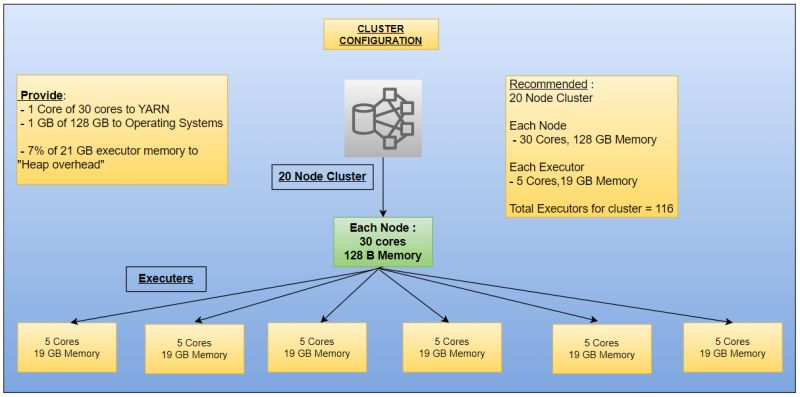



###### https://www.linkedin.com/posts/mahaboob-pathan_snowflake-snowsql-sql-activity-7132574458640228352-AqzH

Here are different syntax variations which can be used with the COUNT() function on Snowflake.

1️⃣ COUNT(*) ➡️ will return a total count of rows in the table

2️⃣ COUNT(<col_name>) ➡️ will return a count of rows with a non-NULL value in that column

3️⃣ COUNT(DISTINCT <col_name>) ➡️ will return a count of distinct rows in that column (excluding non-NULL value)

4️⃣ COUNT(<col_A, col_B>) ➡️ only counts the rows that have non-NULL values in either the A or B column

5️⃣ COUNT(DISTINCT <col_A, col_B>) ➡️ only counts the distinct rows that have non-NULL values in either the A or B column

6️⃣ COUNT(<alias>.*) ➡️ will return the count of all the rows containing non-NULL columns

7️⃣ COUNT(DISTINCT <alias>.*) ➡️ will return the count of all the distinct rows containing non-NULL columns.



In [12]:
# https://www.linkedin.com/posts/mahaboob-pathan_namastesql-sqlquery-sqlchallenges-activity-7113771061086744576-xfnO

schema_ = ["id", "student"]

data = [(1, 'A'),
(2, 'D'),
(3, 'E'),
(4, 'G'),
(5, 'J')]

df = spark.createDataFrame(data, schema= schema_)
df.show()

+---+-------+
| id|student|
+---+-------+
|  1|      A|
|  2|      D|
|  3|      E|
|  4|      G|
|  5|      J|
+---+-------+



In [65]:
# without using lead or lag

max_el = lead_lag.selectExpr("max(id)").collect()[0][0]
print(max_el)

finaldf = df.withColumn("res", 
        when(col('id') % 2 == 0, col("id")-1)\
        .when(col("id")%2 != 0, when(col('id') == max_el , col("id"))\
              .otherwise(col("id")+1)))

finaldf.select("res", "student").orderBy("res").show()

5
+---+-------+
|res|student|
+---+-------+
|  1|      D|
|  2|      A|
|  3|      G|
|  4|      E|
|  5|      J|
+---+-------+



In [66]:
# with using lead and lag functions

lead_fun = Window.orderBy(asc("id"))

lead_lag = df.withColumn("lead", lead("student").over(lead_fun))\
        .withColumn("lag", lag("student").over(lead_fun))
lead_lag.show()

+---+-------+----+----+
| id|student|lead| lag|
+---+-------+----+----+
|  1|      A|   D|null|
|  2|      D|   E|   A|
|  3|      E|   G|   D|
|  4|      G|   J|   E|
|  5|      J|null|   G|
+---+-------+----+----+



In [67]:
lead_lag.withColumn("res", 
        when(col('id') % 2 == 0, col("lag"))\
        .when(col("id")%2 != 0, when(col('lead') == "null", col("student"))\
              .otherwise(col("lead")))\
                   ).show()

max_el = lead_lag.selectExpr("max(id)").collect()[0][0]
print(max_el)

lead_lag.withColumn("res", 
        when(col('id') % 2 == 0, col("lag"))\
        .when(col("id")%2 != 0, when(col('id') == max_el , col("student"))\
              .otherwise(col("lead")))\
                   ).show()

+---+-------+----+----+----+
| id|student|lead| lag| res|
+---+-------+----+----+----+
|  1|      A|   D|null|   D|
|  2|      D|   E|   A|   A|
|  3|      E|   G|   D|   G|
|  4|      G|   J|   E|   E|
|  5|      J|null|   G|null|
+---+-------+----+----+----+

5
+---+-------+----+----+---+
| id|student|lead| lag|res|
+---+-------+----+----+---+
|  1|      A|   D|null|  D|
|  2|      D|   E|   A|  A|
|  3|      E|   G|   D|  G|
|  4|      G|   J|   E|  E|
|  5|      J|null|   G|  J|
+---+-------+----+----+---+



In [15]:
# using sql

df.createOrReplaceTempView("seats_tbl")
spark.sql("select \
            case when mod(ID,2) = 0 then ID-1 \
                  when mod(ID,2) <> 0 and ID <> (select Max(ID) \
                from seats_tbl) then ID+1 else ID end as ID, \
                  STUDENT from seats_tbl order by 1;"
         ).show()

+---+-------+
| ID|STUDENT|
+---+-------+
|  1|      D|
|  2|      A|
|  3|      G|
|  4|      E|
|  5|      J|
+---+-------+



In [99]:
# https://www.linkedin.com/posts/mahaboob-pathan_namastesql-sqlquery-sqlchallenges-activity-7113004314930933760-gXk8

# Write a query to get 𝒕𝒉𝒆 𝒏𝒐 𝒐𝒇 𝒖𝒏𝒊𝒒𝒖𝒆 𝒏𝒂𝒎𝒆𝒔, 𝒏𝒐 𝒐𝒇 𝒕𝒓𝒂𝒏𝒔𝒂𝒄𝒕𝒊𝒐𝒏𝒔, 𝒂𝒏𝒅 𝒕𝒉𝒆 𝒅𝒊𝒇𝒇𝒆𝒓𝒆𝒏𝒄𝒆 𝒃𝒆𝒕𝒘𝒆𝒆𝒏 𝒕𝒉𝒆 𝒇𝒊𝒓𝒔𝒕 & 
# 𝒍𝒂𝒔𝒕 𝒕𝒓𝒂𝒏𝒔𝒂𝒄𝒕𝒊𝒐𝒏 𝒐𝒄𝒄𝒖𝒓𝒆𝒅 𝒐𝒏 02-01-2023.


schema_= ["name", "trans_id", "date_time"]

data = [
('D', 8888, '2023-01-01 08:22:13.053'),
('A', 55, '2023-01-02 16:12:18.023'),
('D', 22, '2023-01-03 14:02:13.053'),
('R', 77, '2023-01-04 20:22:33.053'),
('H', 33, '2023-01-02 19:30:10.015'),
('H', 789, '2023-01-02 10:22:13.053'),
('I', 654, '2023-01-03 00:12:13.023'),
('P', 4489, '2023-01-04 00:22:15.013'),
('A', 2145, '2023-01-02 15:22:13.053')]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+----+--------+--------------------+
|name|trans_id|           date_time|
+----+--------+--------------------+
|   D|    8888|2023-01-01 08:22:...|
|   A|      55|2023-01-02 16:12:...|
|   D|      22|2023-01-03 14:02:...|
|   R|      77|2023-01-04 20:22:...|
|   H|      33|2023-01-02 19:30:...|
|   H|     789|2023-01-02 10:22:...|
|   I|     654|2023-01-03 00:12:...|
|   P|    4489|2023-01-04 00:22:...|
|   A|    2145|2023-01-02 15:22:...|
+----+--------+--------------------+



In [100]:
df11 = df.withColumn("date", to_date(col("date_time")))
df.show()

df12 = df11.filter(col("date") == "2023-01-02").drop("date")
df.show()

+----+--------+--------------------+
|name|trans_id|           date_time|
+----+--------+--------------------+
|   D|    8888|2023-01-01 08:22:...|
|   A|      55|2023-01-02 16:12:...|
|   D|      22|2023-01-03 14:02:...|
|   R|      77|2023-01-04 20:22:...|
|   H|      33|2023-01-02 19:30:...|
|   H|     789|2023-01-02 10:22:...|
|   I|     654|2023-01-03 00:12:...|
|   P|    4489|2023-01-04 00:22:...|
|   A|    2145|2023-01-02 15:22:...|
+----+--------+--------------------+

+----+--------+--------------------+
|name|trans_id|           date_time|
+----+--------+--------------------+
|   D|    8888|2023-01-01 08:22:...|
|   A|      55|2023-01-02 16:12:...|
|   D|      22|2023-01-03 14:02:...|
|   R|      77|2023-01-04 20:22:...|
|   H|      33|2023-01-02 19:30:...|
|   H|     789|2023-01-02 10:22:...|
|   I|     654|2023-01-03 00:12:...|
|   P|    4489|2023-01-04 00:22:...|
|   A|    2145|2023-01-02 15:22:...|
+----+--------+--------------------+



In [101]:
df1 = df12.orderBy("date_time")
df1.show(truncate=False)

+----+--------+-----------------------+
|name|trans_id|date_time              |
+----+--------+-----------------------+
|H   |789     |2023-01-02 10:22:13.053|
|A   |2145    |2023-01-02 15:22:13.053|
|A   |55      |2023-01-02 16:12:18.023|
|H   |33      |2023-01-02 19:30:10.015|
+----+--------+-----------------------+



In [102]:
df2 = df1.withColumn("minutes", ((hour("date_time")*60) + minute("date_time") + (second("date_time")/60)).cast("Integer"))
df2.show()

+----+--------+--------------------+-------+
|name|trans_id|           date_time|minutes|
+----+--------+--------------------+-------+
|   H|     789|2023-01-02 10:22:...|    622|
|   A|    2145|2023-01-02 15:22:...|    922|
|   A|      55|2023-01-02 16:12:...|    972|
|   H|      33|2023-01-02 19:30:...|   1170|
+----+--------+--------------------+-------+



In [103]:
df3 = df2.selectExpr("count(distinct name) as unique_names", "count(distinct trans_id) as no_of_transactions", "max(minutes) - min(minutes) as mins_diff")
df3.show()

+------------+------------------+---------+
|unique_names|no_of_transactions|mins_diff|
+------------+------------------+---------+
|           2|                 4|      548|
+------------+------------------+---------+



In [104]:
# using SQL

df.createOrReplaceTempView("time_diff")
sql_data = spark.sql("select count(distinct name) as unique_names,count(trans_id) as no_of_transactions,\
                datediff(minute,min(date_time),max(date_time)) as mins_diff\
                from time_diff where date(date_time)='2023-01-02';")

sql_data.show()

+------------+------------------+---------+
|unique_names|no_of_transactions|mins_diff|
+------------+------------------+---------+
|           2|                 4|      547|
+------------+------------------+---------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7114235881678417920/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7114235881678417920%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

Topic: Normalization vs. Denormalization

In the SQL world, we often find ourselves at the crossroads of data optimization. 

🚦 Let's demystify two key strategies: Normalization and Denormalization! 📊

<hr>

🧩 Normalization 🧩
Normalization is like tidying up your data. It's about breaking down complex tables into smaller, related tables to minimize data redundancy. 

Think of it as Marie Kondo-ing your database. 🧹✨

<hr>

Pros:
Reduces data duplication 📉
Ensures data integrity 🔐
Simplifies updates and maintenance 🛠️

Cons:
May require more complex queries 😓
Can lead to increased JOIN operations ⚙️

<hr>

🔥 Denormalization 🔥
Denormalization is like packing your suitcase efficiently. It involves adding redundancy to your data to improve query performance. It's like prepping for a quick getaway! 🧳💨

<hr>

Pros:
Speeds up query retrieval ⚡
Simplifies complex queries 🤓
Reduces JOIN operations 🚀

Cons:
Increases data storage 📦
Risks data inconsistency 🤯
May require more effort to maintain 🧹

<img src="https://media.licdn.com/dms/image/D4D22AQF0V035D1KSSQ/feedshare-shrink_2048_1536/0/1696166009252?e=1707350400&v=beta&t=giafRUhlKYecte5YnvK2vhPk9_pUJ7zTYKFPrFMYrIo" alt="Alternative text" />


###### https://www.linkedin.com/feed/update/urn:li:activity:7114530651709554688/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7114530651709554688%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

Handling late-arriving Data using PySpark:

**Streaming Pipeline - Handling Late-Arriving Data:**

In a streaming pipeline, handling late data often involves setting watermarks and windowing to accommodate data with delayed arrival.

```python
from pyspark.sql import SparkSession
from pyspark.sql.functions import window, from_json
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, TimestampType

# Initialize Spark session
spark = SparkSession.builder.appName("LateDataStreaming").getOrCreate()

# Define a schema for the streaming data
schema = StructType([
  StructField("id", IntegerType()),
  StructField("value", StringType()),
  StructField("timestamp", TimestampType())
])

# Read data from a streaming source
streaming_df = (spark.readStream
  .format("kafka")
  .option("kafka.bootstrap.servers", "localhost:9092")
  .option("subscribe", "my_topic")
  .load()
  .selectExpr("CAST(value AS STRING) as value")
  .select(from_json("value", schema).alias("data"))
  .select("data.*")
  .withWatermark("timestamp", "30 seconds") # Set a watermark for late data handling
)

# Perform windowed aggregation on the streaming data
result = streaming_df.groupBy(window("timestamp", "10 minutes"), "id").count()

# Start the streaming query
query = (result.writeStream
  .outputMode("complete")
  .format("console")
  .start())

query.awaitTermination()
```

Here, we set a watermark to specify that data arriving more than 30 seconds late should be considered late and excluded from processing.

**Batch Pipeline - Handling Late-Arriving Data:**

In a batch-processing pipeline, handling late data typically involves comparing timestamps and joining data from different sources. Here's a batch processing example using PySpark's DataFrame API:

```python
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("LateDataBatch").getOrCreate()

# Load current and late-arriving data from different sources
current_data = spark.read.csv("current_data.csv", header=True)
late_arriving_data = spark.read.csv("late_data.csv", header=True)

# Cast timestamp columns to TimestampType
current_data = current_data.withColumn("timestamp", current_data["timestamp"].cast("timestamp"))
late_arriving_data = late_arriving_data.withColumn("timestamp", late_arriving_data["timestamp"].cast("timestamp"))

# Handle late data by joining and selecting the latest version
from pyspark.sql.functions import col

joined_data = (current_data
  .union(late_arriving_data) # Combine current and late-arriving data
  .groupBy("id")
  .agg(
    col("id"),
    col("value"),
    col("timestamp"),
    col("source"),
    col("processing_date"),
    col("source").alias("latest_source")
  )
  .orderBy("timestamp", ascending=False)
  .dropDuplicates(["id"])
  .select("id", "value", "timestamp", "latest_source")
)

# Show the final data
joined_data.show()
```

###### https://www.linkedin.com/feed/update/urn:li:activity:7110481458405785600/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7110481458405785600%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

𝐇𝐨𝐰 𝐒𝐩𝐚𝐫𝐤 𝐝𝐞𝐜𝐢𝐝𝐞𝐬 𝐨𝐧 𝐭𝐡𝐞 𝐉𝐨𝐢𝐧 𝐒𝐭𝐫𝐚𝐭𝐞𝐠𝐲?

Spark uses a cost-based optimizer to choose the most efficient join strategy based on the size of the datasets, the type of join, the join condition, the distribution of the data, and the availability of resources.

The three most common join strategies in Spark are:
1. Broadcast join
2. Shuffle hash join
3. Sort merge join

Read the blog to learn more about how Apache Spark decides on the join strategy and how to use join hints effectively: https://lnkd.in/g3EvZZfC

<img src="https://media.licdn.com/dms/image/D5622AQEXURa3p83uJg/feedshare-shrink_800/0/1695270885416?e=1707350400&v=beta&t=6kdv6dlKTVKxsttL7y0hx6eXZdJX40szMd7Q8y7AsVY">

###### https://www.linkedin.com/feed/update/urn:li:activity:7114818781520048128/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7114818781520048128%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

Different output modes in PySpark structured streaming, along with justifications for their use cases:

**1. Output Mode: `append`**
  - Justification: Use this mode when you want to capture and store only the new rows added to the result table. This is suitable for scenarios where you are processing data that consists of unique records, and you are interested in preserving only the new data.

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("AppendOutputModeExample").getOrCreate()

# Sample streaming source (replace with your actual source)
stream_data = spark.readStream.format("CSV").load("path_to_source")

# Transformation and aggregation operations (e.g., grouping, filtering)
result_df = stream_data.groupBy("key").count()

query = result_df.writeStream.outputMode("append").format("console").start()
query.awaitTermination()
```

**2. Output Mode: `complete`**
  - Justification: Use this mode when you want to write the entire result table to the output every time there is a trigger. This is suitable for scenarios where you need the complete result set, including all historic and new data.

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("CompleteOutputModeExample").getOrCreate()

# Sample streaming source (replace with your actual source)
stream_data = spark.readStream.format("CSV").load("path_to_source")

# Transformation and aggregation operations (e.g., grouping, filtering)
result_df = stream_data.groupBy("key").count()

query = result_df.writeStream.outputMode("complete").format("console").start()
query.awaitTermination()
```

**3. Output Mode: `update`**
  - Justification: Use this mode when you want to capture and store only the rows that have been updated in the result table. It's suitable for scenarios where you want to track changes to existing records in the result table.

```python
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("UpdateOutputModeExample").getOrCreate()

# Sample streaming source (replace with your actual source)
stream_data = spark.readStream.format("CSV").load("path_to_source")

# Transformation and aggregation operations (e.g., grouping, filtering)
result_df = stream_data.groupBy("key").count()

query = result_df.writeStream.outputMode("update").format("console").start()
query.awaitTermination()
```

In each of the examples above, the `format("console")` is used to print the results to the console for demonstration purposes. You can replace it with other output formats such as "parquet," "delta," or "memory" for further processing or storage. The choice of output mode depends on your specific use case and what kind of data you want to capture and store as part of your streaming application.


Resources to Prepare:
1. DataLemur (Really good questions from product based companies but edge cases not covered). [https://datalemur.com/]
2. LeetCode (the classic). [https://leetcode.com/]
3. 8 week SQL challenge. [https://lnkd.in/g9KxBFem]

In [112]:
# https://www.linkedin.com/feed/update/urn:li:activity:7115546144084037633/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115546144084037633%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# write a code in python for finding the first non repeating character in string.

# Method 1

def first_non_repeating_char(str):
    char_order = []
    char_dict = {}
    
    for c in str:
        if c in char_dict:
            char_dict[c] += 1
        else:
            char_dict[c] = 1
            
        char_order.append(c)
        
    for c in char_order:
        if char_dict[c] == 1:
            return c
        
    return None


# Test cases
str1 = "abcabcbbd"
print(first_non_repeating_char(str1))

str1 = "aabbcc"
print(first_non_repeating_char(str1))

str1 = "abc"
print(first_non_repeating_char(str1))


d
None
a


In [113]:
# Method 2

def first_non_repeating_char(str):
 for letter in str:
  if str.count(letter)==1:
   return letter


# Test cases
str1 = "abcabcbbd"
print(first_non_repeating_char(str1))
str.

str1 = "aabbcc"
print(first_non_repeating_char(str1))

str1 = "abc"
print(first_non_repeating_char(str1))


d
None
a


In [18]:
# https://www.linkedin.com/feed/update/urn:li:activity:7115588607486156801/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115588607486156801%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Find the users who purchased 2 or more products on different dates.

schema_ = ["userId", "productId", "quantity", "purchaseDate"]
data = [(827, 2452, 45, "04-09-2022 00:00:00"),
(333, 1122, 9, "06-02-2022 01:00:00"),
(333, 1122, 10, "06-02-2022 02:00:00"),
(536, 3223, 6, "01-11-2022 12:33:44"),
(827, 3585, 35, "02-20-2022 14:05:26"),
(536, 3223, 5, "03-02-2022 09:33:28"),
(536, 1435, 10, "03-02-2022 08:40:00")]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+------+---------+--------+-------------------+
|userId|productId|quantity|       purchaseDate|
+------+---------+--------+-------------------+
|   827|     2452|      45|04-09-2022 00:00:00|
|   333|     1122|       9|06-02-2022 01:00:00|
|   333|     1122|      10|06-02-2022 02:00:00|
|   536|     3223|       6|01-11-2022 12:33:44|
|   827|     3585|      35|02-20-2022 14:05:26|
|   536|     3223|       5|03-02-2022 09:33:28|
|   536|     1435|      10|03-02-2022 08:40:00|
+------+---------+--------+-------------------+



In [29]:
groupData = df.groupBy("userId", "productId").agg(count_distinct(col("purchaseDate")).alias("count"))
groupData.show()

filterdata = groupData.filter(col("count") > 1).select("userId")
filterdata.show()

+------+---------+-----+
|userId|productId|count|
+------+---------+-----+
|   827|     2452|    1|
|   333|     1122|    2|
|   536|     1435|    1|
|   827|     3585|    1|
|   536|     3223|    2|
+------+---------+-----+

+------+
|userId|
+------+
|   333|
|   536|
+------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7108623025624809472/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7108623025624809472%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%2

Question : use of StructType and StructField classes in PySpark

1. StructType: Defining Data Structure
StructType acts as a blueprint for creating structured data. It allows us to define a schema by specifying a sequence of StructField objects. Each StructField represents a column with a name, data type, and an optional flag indicating nullability.

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

spark = SparkSession.builder.appName("StructTypeDemo").getOrCreate()

# Define schema using StructType and StructFields
schema = StructType([
 StructField("id", IntegerType(), False),
 StructField("name", StringType(), True),
 StructField("age", IntegerType(), True)
])

##### Create an empty DataFrame with defined schema
df = spark.createDataFrame([], schema)


2. StructField: Column Specification
StructField helps us specify the characteristics of each column. Here's how we can use it to define a custom data structure.

from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

##### Create a Spark session
spark = SparkSession.builder.appName("StructFieldDemo").getOrCreate()

##### Define a single StructField representing a person's name
name_field = StructField("name", StringType(), True)

##### Create a schema with the defined StructField
schema = StructType([name_field])

##### Create an empty DataFrame with the defined schema
df = spark.createDataFrame([], schema)

df.show()



In [31]:
# https://www.linkedin.com/feed/update/urn:li:activity:7115644296111783936/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115644296111783936%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data = [("Product A: $19.99!",),
  ("Special Offer on Product B - $29.95",),
  ("Product C (Limited Stock)",)]

df = spark.createDataFrame(data, ["description"])
df.show(truncate=False)

+-----------------------------------+
|description                        |
+-----------------------------------+
|Product A: $19.99!                 |
|Special Offer on Product B - $29.95|
|Product C (Limited Stock)          |
+-----------------------------------+



In [32]:
# Clean and preprocess the descriptions using regex_replace
cleaned_df = df.withColumn("cleaned_description",
       regexp_replace(col("description"), r'[^a-zA-Z0-9\s]', ''))
cleaned_df.show(truncate=False)

+-----------------------------------+--------------------------------+
|description                        |cleaned_description             |
+-----------------------------------+--------------------------------+
|Product A: $19.99!                 |Product A 1999                  |
|Special Offer on Product B - $29.95|Special Offer on Product B  2995|
|Product C (Limited Stock)          |Product C Limited Stock         |
+-----------------------------------+--------------------------------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7115697833059491840/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115697833059491840%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

## STREAMING DATA PIPELINE USING PYSPARK:
Here, we use Spark's structured streaming mechanism to load data in real-time by pulling data from a cloud/delta lake source and applying the necessary transformation, CRUD logic with a merge operation.

#### import required libraries
```
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, current_date, current_timestamp
from delta.tables import DeltaTable
```

#### Initialize a Spark session
spark = SparkSession.builder.appName("StreamingLoad").getOrCreate()

#### Define the source and target directories as Delta tables
```
source_path = "hdfs://path/to/source"
target_path = "hdfs://path/to/target"
checkpoint_path = "hdfs://path/to/checkpoint" # Define a checkpoint directory
```

#### Load the existing data as a Delta table
```
existing_data = DeltaTable.forPath(spark, target_path)
```

#### Define the watermark date (e.g., 1 day before the current date)
```
watermark_date = current_date() - timedelta(days=1)
```

#### Function to process and merge streaming data
```
def process_streaming_data(existing_data, batch_df):
  existing_data.alias("existing").merge(
    batch_df.alias("new"), 
    (f"existing.date_column = new.date_column and new.date_column >= '{watermark_date}'")
  ).whenMatchedUpdateAll().whenNotMatchedInsertAll().whenNotMatchedDelete().execute()
```

#### Define a streaming query to continuously read and process new data
```
streaming_query = spark.readStream \
  .format("parquet") \
  .schema(existing_data.toDF().schema) \
  .option("path", source_path) \
  .load() \
  .filter(col("date_column") > watermark_date) \
  .writeStream \
  .outputMode("update") \
  .foreachBatch(lambda batch_df, batch_id: process_streaming_data(existing_data, batch_df)) \
  .option("checkpointLocation", checkpoint_path) # Specify checkpoint directory
  .start()
  ```

#### Await the termination of the streaming query
```
streaming_query.awaitTermination()
```

#### Stop the Spark session
```
spark.stop()
```

###### https://www.linkedin.com/feed/update/urn:li:activity:7115373323517145088/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115373323517145088%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

PYSPARK REST API INCREMENTAL DATA PIPELINE:
Please note that this is a complex task, and you might need to adapt it to your specific requirements.

Here's a step-by-step guide:

1. **Import Required Libraries**
```
from pyspark.sql import SparkSession
from delta import DeltaTable
import requests
```

2. **Initialize Spark Session**
```
spark = SparkSession.builder.appName("IncrementalDataLoad").getOrCreate()
```

3. **Define Your API Endpoint and Parameters**

```
api_url = "https://your.api.endpoint"
api_params = {
 "start_date": "2023-01-01", # Define your start date
 "end_date": "2023-01-31", # Define your end date
}
```

4. **Make API Request and Load Data**

```
response = requests.get(api_url, params=api_params)
if response.status_code == 200:
 api_data = response.json()
 df = spark.createDataFrame(api_data)
else:
 print("Failed to fetch data from the API.")
```

5. **Initialize Delta Lake Table**

```
delta_table = DeltaTable.forPath(spark, "your/delta/table/path")
```
6. **Check for Existing Data in Delta Table**

```
if delta_table is not None:
 existing_data = delta_table.toDF()
else:
 existing_data = spark.createDataFrame([])
```

7. **Schema Evolution and Merge Data**
Assuming that schema evolution can occur over time, you can use Delta Lake's schema evolution feature to handle changes in the schema.

```python

from delta import DeltaMergeBuilder

# Define the merge condition (e.g., using primary keys)

merge_condition = "source_data.id = existing_data.id"
```

#### Merge the data using schema evolution
```
delta_merge = DeltaMergeBuilder() \
 .on(matched=merge_condition) \
 .whenMatchedUpdateAll() \
 .whenNotMatchedInsertAll() \
 .execute(
  target=delta_table,
  source=df.alias("source_data"),
  condition=merge_condition
 )
 ```

8. **Optimize the Delta Table (Optional)**
You can run an optimization to improve query performance, especially if your table gets large over time.
```
delta_table.vacuum(0.001)
```

9. **Stop the Spark Session**
```
spark.stop()
```

10. **Schedule the Script**
You can schedule this script to run at regular intervals to fetch incremental data and update the Delta table.

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7115546153542172672/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115546153542172672%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

To create an incremental data pipeline with Delta Lake using PySpark, you'll need to follow these general steps:

1. **Initialize the SparkSession**:
  ```python
  from pyspark.sql import SparkSession

  spark = SparkSession.builder \
    .appName("Delta Lake Incremental Pipeline") \
    .getOrCreate()
  ```

2. **Load Existing Delta Table**:
  Load the existing Delta table if it already exists, or create a new one if it doesn't.
  ```python
  existing_data = spark.read.format("delta").table("existing_delta_table")
  ```

3. **Load New Data**:
  Load new data that you want to append to the existing Delta table.
  ```python
  new_data = spark.read.format("parquet").load("path_to_new_data")
  ```

4. **Identify Changes**:
  Identify the changes (updates or inserts) between the existing Delta table and the new data.
  ```python
  changes = new_data.subtract(existing_data)
  ```

5. **Apply Changes**:
  Apply the changes to the existing Delta table. You can use `union` or `merge` operations depending on your use case.
  
  For example, using `union` to append new data:
  ```python
  combined_data = existing_data.union(changes)
  combined_data.write.format("delta").mode("overwrite").save("path_to_existing_delta_table")
  ```

  Or using `merge` for more complex scenarios (like updating existing records):
  ```python
  from delta.tables import DeltaTable

  delta_table = DeltaTable.forPath(spark, "path_to_existing_delta_table")

  delta_table.alias("oldData") \
    .merge(
      source=changes.alias("newData"),
      condition="oldData.primary_key = newData.primary_key"
    ) \
    .whenMatchedUpdateAll() \
    .whenNotMatchedInsertAll() \
    .execute()
  ```

6. **Optimize Delta Table (Optional)**:
  Delta Lake allows for optimizations like Z-Ordering, optimizing layout, and vacuuming old files. These steps can help improve performance and reduce storage.
  
  ```python
  delta_table.vacuum()
  delta_table.optimize()
  ```

7. **Close SparkSession**:
  After finishing the pipeline, it's good practice to stop the SparkSession.
  ```python
  spark.stop()
  ```




In [36]:
# https://www.linkedin.com/feed/update/urn:li:activity:7108420432977940480/

data = [(1000, 'login', '2023-06-16 01:00:15.34'),
    (1000, 'login', '2023-06-16 02:00:15.34'),
    (1000, 'login', '2023-06-16 03:00:15.34'),
    (1000, 'logout', '2023-06-16 12:00:15.34'),
    (1001, 'login', '2023-06-16 01:00:15.34'),
    (1001, 'login', '2023-06-16 02:00:15.34'),
    (1001, 'login', '2023-06-16 03:00:15.34'),
    (1001, 'logout', '2023-06-16 12:00:15.34')]

df = spark.createDataFrame(data, ["employee_id","entry_details","time_stamp_detail"])
df.show()

+-----------+-------------+--------------------+
|employee_id|entry_details|   time_stamp_detail|
+-----------+-------------+--------------------+
|       1000|        login|2023-06-16 01:00:...|
|       1000|        login|2023-06-16 02:00:...|
|       1000|        login|2023-06-16 03:00:...|
|       1000|       logout|2023-06-16 12:00:...|
|       1001|        login|2023-06-16 01:00:...|
|       1001|        login|2023-06-16 02:00:...|
|       1001|        login|2023-06-16 03:00:...|
|       1001|       logout|2023-06-16 12:00:...|
+-----------+-------------+--------------------+



In [43]:
df1 = df.withColumn("date", to_date("time_stamp_detail"))
df1.show()

+-----------+-------------+--------------------+----------+
|employee_id|entry_details|   time_stamp_detail|      date|
+-----------+-------------+--------------------+----------+
|       1000|        login|2023-06-16 01:00:...|2023-06-16|
|       1000|        login|2023-06-16 02:00:...|2023-06-16|
|       1000|        login|2023-06-16 03:00:...|2023-06-16|
|       1000|       logout|2023-06-16 12:00:...|2023-06-16|
|       1001|        login|2023-06-16 01:00:...|2023-06-16|
|       1001|        login|2023-06-16 02:00:...|2023-06-16|
|       1001|        login|2023-06-16 03:00:...|2023-06-16|
|       1001|       logout|2023-06-16 12:00:...|2023-06-16|
+-----------+-------------+--------------------+----------+



In [44]:
df2 = df1.select(col("date"),months_between(current_date(),col("date")).alias("months_between"),\
         add_months(col("date"),5).alias("add_months"),\
         add_months(col("date"),-5).alias("sub_months"),\
         date_add(col("date"),3).alias("date_add"),\
         date_sub(col("date"),3).alias("date_sub"),\
         datediff(current_date(),col("date")).alias("datediff"),\
         dayofweek(col("date")).alias("dayofweek"),\
         dayofmonth(col("date")).alias("dayofmonth"),\
         dayofyear(col("date")).alias("dayofyear"))

df2.show(truncate=False)

+----------+--------------+----------+----------+----------+----------+--------+---------+----------+---------+
|date      |months_between|add_months|sub_months|date_add  |date_sub  |datediff|dayofweek|dayofmonth|dayofyear|
+----------+--------------+----------+----------+----------+----------+--------+---------+----------+---------+
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167      |
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167      |
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167      |
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167      |
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167      |
|2023-06-16|6.5483871     |2023-11-16|2023-01-16|2023-06-19|2023-06-13|200     |6        |16        |167

In [6]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116106222910550016/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116106222910550016%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ = ["ID", "COUNTRY", "STATE", "AMOUNT", "TRANS_DATE"]

data = [(121, 'US', 'approved', 1000, '2018-12-18'),
  (122, 'US', 'declined', 2000, '2018-12-19'),
  (123, 'US', 'approved', 2000, '2019-01-01'),
  (124, 'DE', 'approved', 2000, '2019-01-07')]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+---+-------+--------+------+----------+
| ID|COUNTRY|   STATE|AMOUNT|TRANS_DATE|
+---+-------+--------+------+----------+
|121|     US|approved|  1000|2018-12-18|
|122|     US|declined|  2000|2018-12-19|
|123|     US|approved|  2000|2019-01-01|
|124|     DE|approved|  2000|2019-01-07|
+---+-------+--------+------+----------+



In [20]:
df1 = df.withColumn("Year_month", date_format(col("TRANS_DATE"), "yyyy-MM"))
df1.show()

df2 = df1.withColumn("Approved", expr("case when state = 'approved' then 1 else 0 end"))\
            .withColumn("Declined", expr("case when state = 'declined' then 1 else 0 end"))\
            .withColumn("approved_amount", col("Approved") * col("AMOUNT"))
df2.show()

+---+-------+--------+------+----------+----------+
| ID|COUNTRY|   STATE|AMOUNT|TRANS_DATE|Year_month|
+---+-------+--------+------+----------+----------+
|121|     US|approved|  1000|2018-12-18|   2018-12|
|122|     US|declined|  2000|2018-12-19|   2018-12|
|123|     US|approved|  2000|2019-01-01|   2019-01|
|124|     DE|approved|  2000|2019-01-07|   2019-01|
+---+-------+--------+------+----------+----------+

+---+-------+--------+------+----------+----------+--------+--------+---------------+
| ID|COUNTRY|   STATE|AMOUNT|TRANS_DATE|Year_month|Approved|Declined|approved_amount|
+---+-------+--------+------+----------+----------+--------+--------+---------------+
|121|     US|approved|  1000|2018-12-18|   2018-12|       1|       0|           1000|
|122|     US|declined|  2000|2018-12-19|   2018-12|       0|       1|              0|
|123|     US|approved|  2000|2019-01-01|   2019-01|       1|       0|           2000|
|124|     DE|approved|  2000|2019-01-07|   2019-01|       1|       

In [21]:
df3 = df2.groupBy("Year_month", "Country").agg(count(col("year_month")).alias("trans_count"),
                                          sum(col("Approved")).alias("Approved_count"),
                                        sum(col("Declined")).alias("Declined_count"),
                                        sum(col("AMOUNT")).alias("trans_total_amount"),
                                        sum(col("approved_amount")).alias("approved_Total_amount"))
df3.show()

+----------+-------+-----------+--------------+--------------+------------------+---------------------+
|Year_month|Country|trans_count|Approved_count|Declined_count|trans_total_amount|approved_Total_amount|
+----------+-------+-----------+--------------+--------------+------------------+---------------------+
|   2018-12|     US|          2|             1|             1|              3000|                 1000|
|   2019-01|     US|          1|             1|             0|              2000|                 2000|
|   2019-01|     DE|          1|             1|             0|              2000|                 2000|
+----------+-------+-----------+--------------+--------------+------------------+---------------------+



In [23]:
# using SQL

# df.createOrReplaceTempView("transactions")
# spark.sql("select FORMAT(TRANS_DATE, 'yyyy-MM') AS YearMonth, \
#         country,\
#         COUNT(ID) as transaction_count, \
#         sum(case when state = 'approved' then 1 else 0 end) as approved_count,\
#         sum(case when state = 'declined' then 1 else 0 end) as declined_count,\
#         SUM(amount) as Transaction_total_amount,\
#         SUM(case when state = 'approved' then amount else 0 end) as Approved_total_amount\
#         from transactions\
#         group by FORMAT(TRANS_DATE, 'yyyy-MM'), country\
#         order by YearMonth").show()


###### https://www.linkedin.com/feed/update/urn:li:activity:7116006679380443136/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116006679380443136%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

## Topic : The 3 Modes for Handling Corrupt Data in PySpark! 🛡️💡

In the world of data, quality reigns supreme. To harness the true potential of your data, PySpark offers three essential modes for gracefully managing corrupt records. Let's dive in!

#### 1. Permissive Mode: 🛡️
```
When data gets messy, Permissive Mode is your knight in shining armor! 🚀
Set it to True, and PySpark will read corrupt records while storing them as null values in the DataFrame. 
This lenient approach salvages valid data, ensuring your analysis continues smoothly.
Ideal for scenarios where a few corrupted records won't stand in the way of your insights.

spark.read.option("mode", "permissive").csv("sample.csv")
```


#### 2. Drop Malformed Mode: 🗑️
```
For precision data handling, say hello to Drop Malformed Mode! 🚮
Enable it, and PySpark will drop rows with malformed records during data reading. 
Perfect for situations that demand strict data quality without any room for corruption.

spark.read.option("mode", "dropMalformed").json("sample.json")
```

#### 3. Fail Fast Mode: ❌
```
When errors are simply not an option, Fail Fast Mode becomes your trusty companion! 🚫
This mode is a must-have when you need to swiftly identify and rectify corrupt data right from the start of your data journey.

spark.read.option("mode", "FAILFAST").parquet("sample.parquet")
```

📌 Note: By default, PySpark's mode is set to permissive, but now you're equipped to choose the right mode for your specific data needs.
Data quality is the bedrock of insightful analysis. With these modes at your disposal, you're well on your way to extracting accurate and meaningful insights from your data! 📊🔍

<img src="https://media.licdn.com/dms/image/D5622AQE30Jy0PuD1yA/feedshare-shrink_800/0/1696140625893?e=1707350400&v=beta&t=bQbhBc0FqW64E15AIgnVF--V7AetX6rUMb-eMKA8yJs">

In [38]:
# https://www.linkedin.com/feed/update/urn:li:activity:7115897323930460160/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7115897323930460160%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# by explicitly going through each field and type casting by hand.

schema_ = StructType([
        StructField("productname", StringType(), True),\
        StructField("category", StringType(), True),\
        StructField("quantitysold", IntegerType(), True),\
        StructField("revenuegenrated", StringType(), True),\
        StructField("customerrating", DoubleType(), True),\
        StructField("customerReviews", IntegerType(), True),\
        StructField("socialmediamentions", IntegerType(), True),\
    StructField("reviewarrivalTiming", StringType(), True)
])


data = [("Product A", "CategoryA", 100, "$1000.0", 4.5, 50, 200, "04-09-2022 01:12:23"),
("Product B", "CategoryA", 150, "$1200.0", 4.8, 80, 300, "06-02-2022 02:20:12"),
("Product C", "CategoryB", 80, "$800.0", 4.2, 30, 150, "01-11-2022 12:33:44"),
("Product D", "CategoryB", 120, "$1500.0", 4.6, 60, 250, "02-20-2022 14:05:26"),
("Product E", "CategoryC", 70, "$700.0", 4.0, 20, 100, "03-02-2022 09:33:28"),
("Product F", "CategoryC", 90, "$900.0", 4.4, 40, 180, "03-02-2022 08:40:42")]

df = spark.createDataFrame(data, schema=schema_)
df.show()
df.printSchema()

+-----------+---------+------------+---------------+--------------+---------------+-------------------+-------------------+
|productname| category|quantitysold|revenuegenrated|customerrating|customerReviews|socialmediamentions|reviewarrivalTiming|
+-----------+---------+------------+---------------+--------------+---------------+-------------------+-------------------+
|  Product A|CategoryA|         100|        $1000.0|           4.5|             50|                200|04-09-2022 01:12:23|
|  Product B|CategoryA|         150|        $1200.0|           4.8|             80|                300|06-02-2022 02:20:12|
|  Product C|CategoryB|          80|         $800.0|           4.2|             30|                150|01-11-2022 12:33:44|
|  Product D|CategoryB|         120|        $1500.0|           4.6|             60|                250|02-20-2022 14:05:26|
|  Product E|CategoryC|          70|         $700.0|           4.0|             20|                100|03-02-2022 09:33:28|
|  Produ

In [45]:
# raw schema without explicitly going through each field and type casting by hand.

rawtext = sc.textFile(Location + "Product_Category.txt")
rawtext.foreach(print)

Product A,CategoryA,100,$1000.0,4.5,50,200,04/09/2022 01:12:23
Product B,CategoryA,150,$1200.0,4.8,80,300,06/02/2022 02:20:12
Product C,CategoryB,80,$800.0,4.2,30,150,01/11/2022 12:33:44
Product D,CategoryB,120,$1500.0,4.6,60,250,02/20/2022 14:05:26
Product E,CategoryC,70,$700.0,4.0,20,100,03/02/2022 09:33:28
Product F,CategoryC,90,$900.0,4.4,40,180,03/02/2022 08:40:42


In [46]:
splitData = rawtext.map(lambda x : x.split(","))
splitData.foreach(print)

['Product D', 'CategoryB', '120', '$1500.0', '4.6', '60', '250', '02/20/2022 14:05:26']
['Product E', 'CategoryC', '70', '$700.0', '4.0', '20', '100', '03/02/2022 09:33:28']
['Product F', 'CategoryC', '90', '$900.0', '4.4', '40', '180', '03/02/2022 08:40:42']
['Product A', 'CategoryA', '100', '$1000.0', '4.5', '50', '200', '04/09/2022 01:12:23']
['Product B', 'CategoryA', '150', '$1200.0', '4.8', '80', '300', '06/02/2022 02:20:12']
['Product C', 'CategoryB', '80', '$800.0', '4.2', '30', '150', '01/11/2022 12:33:44']


In [51]:
RowData = splitData.map(lambda x : Row(x[0], x[1], x[2], x[3], x[4], x[5], x[6], x[7]))
RowData.foreach(print)

schema_ = StructType([
        StructField("productname", StringType(), True),\
        StructField("category", StringType(), True),\
        StructField("quantitysold", StringType(), True),\
        StructField("revenuegenrated", StringType(), True),\
        StructField("customerrating", StringType(), True),\
        StructField("customerReviews", StringType(), True),\
        StructField("socialmediamentions", StringType(), True),\
    StructField("reviewarrivalTiming", StringType(), True)
])

RowDf = spark.createDataFrame(data=RowData, schema=schema_)
RowDf.show()

+-----------+---------+------------+---------------+--------------+---------------+-------------------+-------------------+
|productname| category|quantitysold|revenuegenrated|customerrating|customerReviews|socialmediamentions|reviewarrivalTiming|
+-----------+---------+------------+---------------+--------------+---------------+-------------------+-------------------+
|  Product A|CategoryA|         100|        $1000.0|           4.5|             50|                200|04/09/2022 01:12:23|
|  Product B|CategoryA|         150|        $1200.0|           4.8|             80|                300|06/02/2022 02:20:12|
|  Product C|CategoryB|          80|         $800.0|           4.2|             30|                150|01/11/2022 12:33:44|
|  Product D|CategoryB|         120|        $1500.0|           4.6|             60|                250|02/20/2022 14:05:26|
|  Product E|CategoryC|          70|         $700.0|           4.0|             20|                100|03/02/2022 09:33:28|
|  Produ

<Row('Product D', 'CategoryB', '120', '$1500.0', '4.6', '60', '250', '02/20/2022 14:05:26')>
<Row('Product E', 'CategoryC', '70', '$700.0', '4.0', '20', '100', '03/02/2022 09:33:28')>
<Row('Product F', 'CategoryC', '90', '$900.0', '4.4', '40', '180', '03/02/2022 08:40:42')>
<Row('Product A', 'CategoryA', '100', '$1000.0', '4.5', '50', '200', '04/09/2022 01:12:23')>
<Row('Product B', 'CategoryA', '150', '$1200.0', '4.8', '80', '300', '06/02/2022 02:20:12')>
<Row('Product C', 'CategoryB', '80', '$800.0', '4.2', '30', '150', '01/11/2022 12:33:44')>


In [52]:
df33 = RowDf.withColumn("quantitysold", col("quantitysold").cast("Integer"))
df33.printSchema()

root
 |-- productname: string (nullable = true)
 |-- category: string (nullable = true)
 |-- quantitysold: integer (nullable = true)
 |-- revenuegenrated: string (nullable = true)
 |-- customerrating: string (nullable = true)
 |-- customerReviews: string (nullable = true)
 |-- socialmediamentions: string (nullable = true)
 |-- reviewarrivalTiming: string (nullable = true)



In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117297691230957568/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117297691230957568%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ = ["employee_id","team_id"]

data = [(1,8),
(2,8),
(3,8),
(4,7),
(5,9),
(6,9)]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+-----------+-------+
|employee_id|team_id|
+-----------+-------+
|          1|      8|
|          2|      8|
|          3|      8|
|          4|      7|
|          5|      9|
|          6|      9|
+-----------+-------+



In [11]:
groupData = df.groupBy("team_id").agg(count("employee_id").alias("team_size"))
groupData.show()

FinalDf = df.join(groupData, on="team_id", how="inner")
# FinalDf.show()

FinalDf.select("employee_id", "team_size").show()

+-------+---------+
|team_id|team_size|
+-------+---------+
|      8|        3|
|      7|        1|
|      9|        2|
+-------+---------+

+-----------+---------+
|employee_id|team_size|
+-----------+---------+
|          1|        3|
|          2|        3|
|          3|        3|
|          4|        1|
|          5|        2|
|          6|        2|
+-----------+---------+



In [14]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117038244063510528/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117038244063510528%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Sample data with names containing special characters
data = [
  {"name": "R@hul K#mar"},
  {"name": "S@m!rtha P@tel"},
  {"name": "M!dhavi S#ngh"}
]

# Create DataFrame
df = spark.createDataFrame(data)

# Remove special characters from names using regex
df_cleaned = df.withColumn("cleaned_name", regexp_replace(col("name"), "[^a-zA-Z ]", ""))
df_cleaned.show(truncate=False)


+--------------+------------+
|name          |cleaned_name|
+--------------+------------+
|R@hul K#mar   |Rhul Kmar   |
|S@m!rtha P@tel|Smrtha Ptel |
|M!dhavi S#ngh |Mdhavi Sngh |
+--------------+------------+



In [21]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116973047328206848/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116973047328206848%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ = ["customerID", "dateList"]

data = [("customer1", ["2023-08-07", "2023-08-14", "2023-08-11", "2023-08-03", "2023-08-04", "2023-08-01", "2023-08-08", "2023-08-02", "2023-08-12", "2023-08-09", "2023-08-13", "2023-08-10"]),
("customer2", ["2023-08-07", "2023-08-14", "2023-08-03", "2023-08-08", "2023-08-02", "2023-08-12", "2023-08-09", "2023-08-06", "2023-08-13", "2023-08-10"]),
("customer3", ["2023-08-07", "2023-08-14", "2023-08-11", "2023-08-03", "2023-08-04", "2023-08-01", "2023-08-02", "2023-08-12", "2023-08-13", "2023-08-10"]),
("customer4", ["2023-08-07", "2023-08-11", "2023-08-03", "2023-08-04", "2023-08-01", "2023-08-05", "2023-08-02", "2023-08-09", "2023-08-06", "2023-08-13", "2023-08-10"]),
("customer5", ["2023-08-07", "2023-08-14", "2023-08-11", "2023-08-03", "2023-08-04", "2023-08-01", "2023-08-02", "2023-08-06", "2023-08-13"])]


df = spark.createDataFrame(data, schema=schema_)
df.show()
df.printSchema()

+----------+--------------------+
|customerID|            dateList|
+----------+--------------------+
| customer1|[2023-08-07, 2023...|
| customer2|[2023-08-07, 2023...|
| customer3|[2023-08-07, 2023...|
| customer4|[2023-08-07, 2023...|
| customer5|[2023-08-07, 2023...|
+----------+--------------------+

root
 |-- customerID: string (nullable = true)
 |-- dateList: array (nullable = true)
 |    |-- element: string (containsNull = true)



In [38]:
explodeDf = df.withColumn("dateList", explode(col("dateList")))
explodeDf.show()

expl = explodeDf.groupBy("customerID").agg(collect_set(col("dateList")).alias("DateList"), count(col("customerID")).alias("LongestStreak"))
expl.show()

+----------+----------+
|customerID|  dateList|
+----------+----------+
| customer1|2023-08-07|
| customer1|2023-08-14|
| customer1|2023-08-11|
| customer1|2023-08-03|
| customer1|2023-08-04|
| customer1|2023-08-01|
| customer1|2023-08-08|
| customer1|2023-08-02|
| customer1|2023-08-12|
| customer1|2023-08-09|
| customer1|2023-08-13|
| customer1|2023-08-10|
| customer2|2023-08-07|
| customer2|2023-08-14|
| customer2|2023-08-03|
| customer2|2023-08-08|
| customer2|2023-08-02|
| customer2|2023-08-12|
| customer2|2023-08-09|
| customer2|2023-08-06|
+----------+----------+
only showing top 20 rows

+----------+--------------------+-------------+
|customerID|            DateList|LongestStreak|
+----------+--------------------+-------------+
| customer1|[2023-08-09, 2023...|           12|
| customer2|[2023-08-09, 2023...|           10|
| customer3|[2023-08-01, 2023...|           10|
| customer4|[2023-08-09, 2023...|           11|
| customer5|[2023-08-01, 2023...|            9|
+----------+--

In [39]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116830873060069376/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116830873060069376%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Storagehouse Table:

schema1 = ["name" , "product_id" , "units" ]

data1 = [
("Room1" , 1 , 1 ),
("Room1" , 2 , 10),
("Room1" , 3 , 5 ),
("Room2" , 1 , 2 ),
("Room2" , 2 , 2 ),
("Room3" , 4 , 1 )]

# Products Table:

schema2 = ["product_id" , "product_name" , "Width" , "Length" , "Height" ]

data2 = [
(1 , "Mencollection" , 5 , 50 , 40) ,
(2 , "Girlscollection" , 5 , 5 , 5) ,
(3 , "Childcollection" , 2 , 10 , 10) ,
(4 , "Womencollection" , 4 , 10 , 20 )]

df1 = spark.createDataFrame(data1, schema1)
df1.show()

df2 = spark.createDataFrame(data2, schema2)
df2.show()

+-----+----------+-----+
| name|product_id|units|
+-----+----------+-----+
|Room1|         1|    1|
|Room1|         2|   10|
|Room1|         3|    5|
|Room2|         1|    2|
|Room2|         2|    2|
|Room3|         4|    1|
+-----+----------+-----+

+----------+---------------+-----+------+------+
|product_id|   product_name|Width|Length|Height|
+----------+---------------+-----+------+------+
|         1|  Mencollection|    5|    50|    40|
|         2|Girlscollection|    5|     5|     5|
|         3|Childcollection|    2|    10|    10|
|         4|Womencollection|    4|    10|    20|
+----------+---------------+-----+------+------+



In [40]:
joinData = df1.join(df2, on="product_id", how="inner")
joinData.show()

+----------+-----+-----+---------------+-----+------+------+
|product_id| name|units|   product_name|Width|Length|Height|
+----------+-----+-----+---------------+-----+------+------+
|         1|Room1|    1|  Mencollection|    5|    50|    40|
|         1|Room2|    2|  Mencollection|    5|    50|    40|
|         2|Room1|   10|Girlscollection|    5|     5|     5|
|         2|Room2|    2|Girlscollection|    5|     5|     5|
|         3|Room1|    5|Childcollection|    2|    10|    10|
|         4|Room3|    1|Womencollection|    4|    10|    20|
+----------+-----+-----+---------------+-----+------+------+



In [47]:
volumeData = joinData.withColumn("volume", col("Width") * col("Length") * col("Height") * col("units"))
volumeData.show()

grp = volumeData.groupBy("name").agg(sum("volume").alias("Total_Volume"))
grp.show()

+----------+-----+-----+---------------+-----+------+------+------+
|product_id| name|units|   product_name|Width|Length|Height|volume|
+----------+-----+-----+---------------+-----+------+------+------+
|         1|Room1|    1|  Mencollection|    5|    50|    40| 10000|
|         1|Room2|    2|  Mencollection|    5|    50|    40| 20000|
|         2|Room1|   10|Girlscollection|    5|     5|     5|  1250|
|         2|Room2|    2|Girlscollection|    5|     5|     5|   250|
|         3|Room1|    5|Childcollection|    2|    10|    10|  1000|
|         4|Room3|    1|Womencollection|    4|    10|    20|   800|
+----------+-----+-----+---------------+-----+------+------+------+

+-----+------------+
| name|Total_Volume|
+-----+------------+
|Room3|         800|
|Room2|       20250|
|Room1|       12250|
+-----+------------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7116565359666610176/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116565359666610176%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
Question 22 : Explain self join in SQL

A self-join in SQL is when a table is joined with itself. It's often used to retrieve related information from the same table. Here's an example:
Let's say you have a table called "Employees" with the following structure:

```
CREATE TABLE Employees (
  EmployeeID INT PRIMARY KEY,
  FirstName VARCHAR(50),
  LastName VARCHAR(50),
  ManagerID INT
);
```
In this table, each employee has an EmployeeID, FirstName, LastName, and a ManagerID that represents the ID of their manager, which is also an employee in the same table.
To perform a self-join to retrieve the names of employees and their managers, you can write a SQL query like this:
```
SELECT e1.FirstName AS EmployeeFirstName, e1.LastName AS EmployeeLastName,
    e2.FirstName AS ManagerFirstName, e2.LastName AS ManagerLastName
FROM Employees e1
LEFT JOIN Employees e2 ON e1.ManagerID = e2.EmployeeID;
```
In this query, we alias the "Employees" table as both e1 and e2 and use a LEFT JOIN to connect employees to their managers based on the ManagerID and EmployeeID columns.
```
The result? 
A clean and insightful report that provides Employee and Manager names side by side. 
📊 Self-joins are just one of the many SQL techniques that can help you make sense of complex data relationships. Stay curious and keep learning! 💡
```

###### https://www.linkedin.com/feed/update/urn:li:activity:7116608449236353024/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116608449236353024%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
```
𝗪𝗶𝗴𝗴𝗹𝗲 𝗦𝗼𝗿𝘁 rearranges elements in an array in the below pattern:
Odd element --> should be larger than both its adjacent elements.
Even element --> should be smaller than both its adjacent elements.
```
```
𝗥𝗲𝗮𝗹 #𝗪𝗼𝗿𝗹𝗱 𝘂𝘀𝗲𝗰𝗮𝘀𝗲 𝗼𝗳 𝗪𝗶𝗴𝗴𝗹𝗲 𝗦𝗼𝗿𝘁:
Given Product whose prices change twice a week.
Get the best to worst and worst to best performing weeks.
```
Scenario
```
Given below data:
📌sort the prices in "wiggle" pattern from highest to lowest
📌get the week of the year
```

In [55]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116608449236353024/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116608449236353024%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
data = [Row(54, 4.0, "2020-10-24", 63.69),
Row(73, 4.7, "2020-01-29", 62.21),
Row(77, 2.2, "2020-05-16", 73.90),
Row(68, 2.6, "2020-02-08", 77.25),
Row(67, 3.2, "2020-01-13", 83.35),
Row(66, 1.5, "2020-12-04", 92.34),
Row(41, 2.8, "2020-10-12", 51.01),
Row(86, 2.7, "2020-05-30", 69.58),
Row(97, 5.0, "2020-08-14", 57.71),
Row(33, 2.7, "2020-09-22", 83.54),
Row(44, 4.7, "2020-10-13", 85.70),
Row(96, 3.7, "2020-11-26", 95.03),
Row(98, 4.4, "2020-06-07", 85.11),
Row(72, 1.9, "2020-10-08", 61.84),
Row(37, 3.1, "2020-11-20", 70.28),
Row(27, 4.1, "2020-07-24", 60.59),
Row(67, 3.0, "2020-06-08", 57.12),
Row(34, 1.2, "2020-07-11", 76.86),
Row(17, 3.8, "2020-03-20", 75.33),
Row(45, 3.5, "2020-08-17", 98.38),
Row(66, 4.7, "2020-12-18", 54.45),
Row(37, 1.7, "2020-06-18", 61.04),
Row(88, 2.5, "2020-08-24", 65.07),
Row(31, 3.5, "2020-02-11", 51.85),
Row(64, 2.7, "2020-01-02", 63.11),
Row(26, 4.9, "2020-12-17", 96.99),
Row(82, 3.7, "2020-03-08", 77.37),
Row(72, 5.0, "2020-08-27", 79.58),
Row(56, 2.2, "2020-02-07", 76.18),
Row(57, 2.9, "2020-07-15", 76.38),
Row(19, 3.5, "2020-03-30", 84.51),
Row(98, 2.4, "2020-07-05", 57.23),
Row(79, 2.7, "2020-09-28", 85.21),
Row(58, 3.5, "2020-11-13", 93.67),
Row(52, 2.6, "2020-04-17", 77.32)]



rdd = spark.sparkContext.parallelize(data)

schema = StructType([StructField("stockQty", IntegerType(), nullable = True),
StructField("rating", DoubleType(), nullable = True),
StructField("priceDate", StringType(), nullable = True),
StructField("price", DoubleType(), nullable = True)])

df = spark.createDataFrame(rdd, schema)
df.show()

+--------+------+----------+-----+
|stockQty|rating| priceDate|price|
+--------+------+----------+-----+
|      54|   4.0|2020-10-24|63.69|
|      73|   4.7|2020-01-29|62.21|
|      77|   2.2|2020-05-16| 73.9|
|      68|   2.6|2020-02-08|77.25|
|      67|   3.2|2020-01-13|83.35|
|      66|   1.5|2020-12-04|92.34|
|      41|   2.8|2020-10-12|51.01|
|      86|   2.7|2020-05-30|69.58|
|      97|   5.0|2020-08-14|57.71|
|      33|   2.7|2020-09-22|83.54|
|      44|   4.7|2020-10-13| 85.7|
|      96|   3.7|2020-11-26|95.03|
|      98|   4.4|2020-06-07|85.11|
|      72|   1.9|2020-10-08|61.84|
|      37|   3.1|2020-11-20|70.28|
|      27|   4.1|2020-07-24|60.59|
|      67|   3.0|2020-06-08|57.12|
|      34|   1.2|2020-07-11|76.86|
|      17|   3.8|2020-03-20|75.33|
|      45|   3.5|2020-08-17|98.38|
+--------+------+----------+-----+
only showing top 20 rows



In [57]:
rankedDF = df.withColumn("week", weekofyear("priceDate"))\
            .withColumn("rank", row_number().over(Window.orderBy("price")))
# rankedDF.show()

totalRows = rankedDF.count()
print(totalRows)

alternatingRankDF = rankedDF.withColumn("alternating_rank", 
                            when(col("rank") <= totalRows/2, col("rank") * lit(2) - lit(1))\
                            .otherwise((lit(totalRows) - col("rank")) * 2))
alternatingRankDF.show()

sortedDF = alternatingRankDF.sort("alternating_rank")

sortedDF.select("stockQty", "rating", "priceDate","price","week").show()

35
+--------+------+----------+-----+----+----+----------------+
|stockQty|rating| priceDate|price|week|rank|alternating_rank|
+--------+------+----------+-----+----+----+----------------+
|      41|   2.8|2020-10-12|51.01|  42|   1|               1|
|      31|   3.5|2020-02-11|51.85|   7|   2|               3|
|      66|   4.7|2020-12-18|54.45|  51|   3|               5|
|      67|   3.0|2020-06-08|57.12|  24|   4|               7|
|      98|   2.4|2020-07-05|57.23|  27|   5|               9|
|      97|   5.0|2020-08-14|57.71|  33|   6|              11|
|      27|   4.1|2020-07-24|60.59|  30|   7|              13|
|      37|   1.7|2020-06-18|61.04|  25|   8|              15|
|      72|   1.9|2020-10-08|61.84|  41|   9|              17|
|      73|   4.7|2020-01-29|62.21|   5|  10|              19|
|      64|   2.7|2020-01-02|63.11|   1|  11|              21|
|      54|   4.0|2020-10-24|63.69|  43|  12|              23|
|      88|   2.5|2020-08-24|65.07|  35|  13|              25|
|    

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116565359335268352/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116565359335268352%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
# https://github.com/imadhaka/PyLeetProblems/blob/master/spark/PairedRows.py
    
# https://github.com/imadhaka/PyLeetProblems/tree/master

In [59]:
# https://www.linkedin.com/feed/update/urn:li:activity:7116565359335268352/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7116565359335268352%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ = ["ID", "Name"]

data = [(1, "Person1"),
(2, "Person2"),
(3, "Person3"),
(4, "Person4"),
(5, "Person5"),
(6, "Person6"),
(7, "Person7"),
(8, "Person8"),
(9, "Person9"),
(10, "Person10")]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+---+--------+
| ID|    Name|
+---+--------+
|  1| Person1|
|  2| Person2|
|  3| Person3|
|  4| Person4|
|  5| Person5|
|  6| Person6|
|  7| Person7|
|  8| Person8|
|  9| Person9|
| 10|Person10|
+---+--------+



In [83]:
df1 = df.alias('df1')
df2 = df.alias('df2')

In [84]:
resultDf = df1.join(df2, col('df1.ID') + 1 == col('df2.ID'), 'INNER') \
                        .filter(col('df1.ID') % 2 == 1)\
                        .select(concat_ws(' ', col('df1.ID'), col('df1.Name')).alias('r1'),
                                concat_ws(' ', col('df2.ID'), col('df2.Name')).alias('r2'))
resultDf.show()

resultDf = resultDf.select(concat_ws(' , ', col('r1'), col('r2')).alias('RESULT'))
resultDf.show(truncate=False)

+---------+-----------+
|       r1|         r2|
+---------+-----------+
|1 Person1|  2 Person2|
|3 Person3|  4 Person4|
|5 Person5|  6 Person6|
|7 Person7|  8 Person8|
|9 Person9|10 Person10|
+---------+-----------+

+-----------------------+
|RESULT                 |
+-----------------------+
|1 Person1 , 2 Person2  |
|3 Person3 , 4 Person4  |
|5 Person5 , 6 Person6  |
|7 Person7 , 8 Person8  |
|9 Person9 , 10 Person10|
+-----------------------+



In [87]:
df1 = df.alias('df1')
df2 = df.alias('df2').withColumnRenamed("ID","ID1").withColumnRenamed("Name","Name1")

joindata = df1.join(df2, df1.ID == df2.ID1-1, "inner")
joindata.show()

filterData = joindata.filter(col("ID1") % 2 == 0)
filterData.show()

+---+-------+---+--------+
| ID|   Name|ID1|   Name1|
+---+-------+---+--------+
|  1|Person1|  2| Person2|
|  2|Person2|  3| Person3|
|  3|Person3|  4| Person4|
|  4|Person4|  5| Person5|
|  5|Person5|  6| Person6|
|  6|Person6|  7| Person7|
|  7|Person7|  8| Person8|
|  8|Person8|  9| Person9|
|  9|Person9| 10|Person10|
+---+-------+---+--------+

+---+-------+---+--------+
| ID|   Name|ID1|   Name1|
+---+-------+---+--------+
|  1|Person1|  2| Person2|
|  3|Person3|  4| Person4|
|  5|Person5|  6| Person6|
|  7|Person7|  8| Person8|
|  9|Person9| 10|Person10|
+---+-------+---+--------+



In [94]:
concact1 = filterData.withColumn("r1", concat_ws(" ", col("ID"), col("Name")))\
        .withColumn("r2", concat_ws(" ", col("ID1"), col("Name1")))

concact1.show()

concact2 = concact1.withColumn("RESULT", concat_ws(" , ", col("r1"), col("r2")))
concact2.select("RESULT").show(truncate=False)

+---+-------+---+--------+---------+-----------+
| ID|   Name|ID1|   Name1|       r1|         r2|
+---+-------+---+--------+---------+-----------+
|  1|Person1|  2| Person2|1 Person1|  2 Person2|
|  3|Person3|  4| Person4|3 Person3|  4 Person4|
|  5|Person5|  6| Person6|5 Person5|  6 Person6|
|  7|Person7|  8| Person8|7 Person7|  8 Person8|
|  9|Person9| 10|Person10|9 Person9|10 Person10|
+---+-------+---+--------+---------+-----------+

+-----------------------+
|RESULT                 |
+-----------------------+
|1 Person1 , 2 Person2  |
|3 Person3 , 4 Person4  |
|5 Person5 , 6 Person6  |
|7 Person7 , 8 Person8  |
|9 Person9 , 10 Person10|
+-----------------------+



In [98]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117350533186695168/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117350533186695168%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 📌Question: find the largest sum contiguous subarray?

def maximumSubarraySum(arr):
    n = len(arr)
    maxSum = -1e8

    for i in range(0, n):
        currSum = 0
        for j in range(i, n):
            currSum = currSum + arr[j]
            if(currSum > maxSum):
                maxSum = currSum

    return maxSum

# Your code goes here
a = [1, 3, 8, -2, 6, -8, 5];
print(maximumSubarraySum(a));

# 🔸output: 16

16


In [100]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117377810200952832/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117377810200952832%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 🌴 Scenario: Distributing Data with PySpark🐍 NTILE Function

# Sample student data
data = [("A", 85),("B", 92),("C", 78),("D", 65),("E", 75),("F", 88),("G", 95)]

# Create DataFrame
columns = ["student_name", "exam_score"]
df = spark.createDataFrame(data, columns)

# Define the window specification
window_spec = Window.orderBy(col("exam_score"))

# Apply the PySpark NTILE function
df_with_ntile = df.withColumn("quartile", ntile(4).over(window_spec))
df_with_ntile.show()

+------------+----------+--------+
|student_name|exam_score|quartile|
+------------+----------+--------+
|           D|        65|       1|
|           E|        75|       1|
|           C|        78|       2|
|           A|        85|       2|
|           F|        88|       3|
|           B|        92|       3|
|           G|        95|       4|
+------------+----------+--------+



In [103]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117103379687821313/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117103379687821313%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 🏹 CHALLENGE : We have input_df -> emp_name, emp_id, year, month, base salary, bonus
# Output should be total salary bracket, count of employees in salary bracket

df = spark.createDataFrame([("Rajesh", 1001 ,"January", 2022, 100000, 0 ),
("Rajesh", 1001 ,"February",2022, 100000, 0 ),
("Rajesh", 1001 ,"March",2022, 100000, 0 ),
("Rajesh", 1001 ,"April",2022, 100000, 50000 ),
("Rajesh", 1001 ,"May",2022, 100000, 0 ),
("Rajesh", 1001 ,"June",2022, 100000, 0 ),
("Rajesh", 1001 ,"July",2022, 100000, 0 ),
("Rajesh", 1001 ,"August",2022, 100000, 50000 ),
("Rajesh", 1001 ,"September",2022, 100000, 0 ),
("Rajesh", 1001 ,"October",2022, 100000, 0 ),
("Rajesh", 1001 ,"November",2022, 100000, 0 ),
("Rajesh", 1001 ,"December",2022, 100000, 50000 )
], ["emp_name", "emp_id", "Month","Year", "Base_Salary", "Bonus"])

df.show()

+--------+------+---------+----+-----------+-----+
|emp_name|emp_id|    Month|Year|Base_Salary|Bonus|
+--------+------+---------+----+-----------+-----+
|  Rajesh|  1001|  January|2022|     100000|    0|
|  Rajesh|  1001| February|2022|     100000|    0|
|  Rajesh|  1001|    March|2022|     100000|    0|
|  Rajesh|  1001|    April|2022|     100000|50000|
|  Rajesh|  1001|      May|2022|     100000|    0|
|  Rajesh|  1001|     June|2022|     100000|    0|
|  Rajesh|  1001|     July|2022|     100000|    0|
|  Rajesh|  1001|   August|2022|     100000|50000|
|  Rajesh|  1001|September|2022|     100000|    0|
|  Rajesh|  1001|  October|2022|     100000|    0|
|  Rajesh|  1001| November|2022|     100000|    0|
|  Rajesh|  1001| December|2022|     100000|50000|
+--------+------+---------+----+-----------+-----+



In [107]:
df1 = df.withColumn("Monthly_Salary", df["Base_Salary"]+df["Bonus"])\
    .groupby("emp_name","Year").agg(sum(col("Monthly_Salary")).alias("Total_salary"))\
    .withColumn("Salary_Bracket", when(col("Total_salary")<500000,lit('Less Than 500000'))\
    .when(col("Total_salary")>1000000,lit('Greater Than 1000000'))
    .otherwise(lit('Between 500000 to 1000000')))
df1.show()

df1.createOrReplaceTempView("temp")

result = spark.sql("select Salary_Bracket, count(Salary_Bracket) as emp_count from temp group by Salary_Bracket ")

result.show(truncate=False)

+--------+----+------------+--------------------+
|emp_name|Year|Total_salary|      Salary_Bracket|
+--------+----+------------+--------------------+
|  Rajesh|2022|     1350000|Greater Than 1000000|
+--------+----+------------+--------------------+

+--------------------+---------+
|Salary_Bracket      |emp_count|
+--------------------+---------+
|Greater Than 1000000|1        |
+--------------------+---------+



In [111]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117667622749421568/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117667622749421568%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

cust = [(1,5),(2,6),(3,5),(3,6),(1,6)]

custDf = spark.createDataFrame(cust, ["customer_id","product_key"]).orderBy("customer_id")
custDf.show()

prod_df = spark.createDataFrame([(5,),(6,)], ["product_key"])
prod_df.show()

+-----------+-----------+
|customer_id|product_key|
+-----------+-----------+
|          1|          6|
|          1|          5|
|          2|          6|
|          3|          6|
|          3|          5|
+-----------+-----------+

+-----------+
|product_key|
+-----------+
|          5|
|          6|
+-----------+



In [114]:
# method 1

prod_distinct = prod_df.distinct().count()
print(prod_distinct)

cust_group = custDf.groupBy("customer_id").agg(countDistinct("product_key").alias("count"))
cust_group.show()

final_df = cust_group.filter(col("count") == prod_distinct)
final_df.select("customer_id").show()

2
+-----------+-----+
|customer_id|count|
+-----------+-----+
|          1|    2|
|          3|    2|
+-----------+-----+

+-----------+
|customer_id|
+-----------+
|          1|
|          3|
+-----------+



In [121]:
# method 2

prod_distinct = prod_df.distinct().count()
print(prod_distinct)

win=Window.partitionBy("customer_id")

result_df=custDf.withColumn("count",count(col("customer_id")).over(win))\
                .filter(col("count")==prod_distinct)\
                .select("customer_id")\
                .distinct()

result_df.show()

2
+-----------+
|customer_id|
+-----------+
|          1|
|          3|
+-----------+



In [122]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118105404118593538/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118105404118593538%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Sample sales data
data = [("Product A", "Category X", 100),
    ("Product B", "Category Y", 150),
    ("Product A", "Category X", 200),
    ("Product B", "Category Y", 250),
    ("Product A", "Category Z", 300)]

# Create DataFrame
columns = ["product", "category", "sales"]
df = spark.createDataFrame(data, columns)

# Use PySpark's aggregation functions
df_summary = df.groupBy("product", "category").agg(sum("sales").alias("total_sales"))
df_summary.show(truncate=False)

+---------+----------+-----------+
|product  |category  |total_sales|
+---------+----------+-----------+
|Product A|Category X|300        |
|Product B|Category Y|400        |
|Product A|Category Z|300        |
+---------+----------+-----------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7118305823767883776/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118305823767883776%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

### What is "Factless fact table" ?
```
A factless fact table is a type of fact table that does not contain any measures. 
It is essentially an intersection of dimensions (it contains nothing but dimensional keys). 
Factless fact tables are used to capture events and relationships between dimensions.
```
### There are two main types of factless fact tables:
```
🔹Event fact tables: These tables are used to capture events that occur, such as a customer placing an order or a student attending a class.
🔹Coverage fact tables: These tables are used to track whether or not something has happened, such as a customer visiting a website or a product being sold in a store.
```

#### Factless fact tables can be used to answer a variety of business questions, such as:
```
❓How many students attended each class in a semester?

❓Which products were not sold in any stores last month?

❓Which customers have not visited our website in the past six months?
```

Factless fact tables are often used in conjunction with regular fact tables to provide a more complete view of the data.

For example, a company might have a fact table that tracks sales transactions, as well as a factless fact table that tracks customer interactions with the company. This would allow the company to see which customers are most likely to make a purchase, and to target them with marketing campaigns.
```
Here are some examples of factless fact tables:

🔸A table that tracks which students attended each class on a given day.
🔸A table that tracks which customers visited each store on a given day.
🔸A table that tracks which products were on sale each day.
🔸A table that tracks which customers have not placed an order in the past six months.
🔸A table that tracks which products have not been sold in the past six months.
```
Factless fact tables can be a valuable tool for businesses of all sizes. By tracking events and relationships between dimensions, businesses can gain a better understanding of their customers, products, and operations.



In [124]:
# https://www.linkedin.com/feed/update/urn:li:activity:7117841840699052032/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7117841840699052032%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Write a Pyspark query to report the movies with an odd-numbered ID and a description that is not "boring".
# Return the result table in descending order by rating.

schema_ = ["id" , "movie" , "description" , "rating"]

data = [(1 , "War", "great 3D", 8.9),
(2 , "Science" , "fiction"  , 8.5),
(3 , "irish", "boring"   , 6.2 ) ,
(4 , "Ice song", "Fantacy"  , 8.6 ) ,
(5 , "House card" , "Interesting" , 9.1)]

df = spark.createDataFrame(data, schema=schema_)
df.show()

+---+----------+-----------+------+
| id|     movie|description|rating|
+---+----------+-----------+------+
|  1|       War|   great 3D|   8.9|
|  2|   Science|    fiction|   8.5|
|  3|     irish|     boring|   6.2|
|  4|  Ice song|    Fantacy|   8.6|
|  5|House card|Interesting|   9.1|
+---+----------+-----------+------+



In [126]:
finaldf = df.filter((col("id") % 2 != 0) & (col("description") != "boring"))
finaldf.orderBy(desc("rating")).show()

+---+----------+-----------+------+
| id|     movie|description|rating|
+---+----------+-----------+------+
|  5|House card|Interesting|   9.1|
|  1|       War|   great 3D|   8.9|
+---+----------+-----------+------+



In [15]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118075350764445697/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118075350764445697%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data_start = [
("PN1", "2022-01-01 10:20:00"),
("PN1", "2022-01-01 16:25:00"), 
("PN2", "2022-01-01 12:30:00"),
("PN3", "2022-01-02 10:00:00"),
("PN3", "2022-01-02 12:30:00"),
("PN3", "2022-01-03 09:20:00")]

data_end = [
("PN1", "2022-01-01 10:45:00"), 
("PN1", "2022-01-01 17:05:00"),
("PN2", "2022-01-01 12:55:00"),
("PN3", "2022-01-02 10:20:00"),
("PN3", "2022-01-02 12:50:00"),
("PN3", "2022-01-03 09:40:00")]


df_start = spark.createDataFrame(data_start, ["call", "start_time"])
df_start.show()

df_end = spark.createDataFrame(data_end, ["call", "end_time"])
df_end.show()    


+----+-------------------+
|call|         start_time|
+----+-------------------+
| PN1|2022-01-01 10:20:00|
| PN1|2022-01-01 16:25:00|
| PN2|2022-01-01 12:30:00|
| PN3|2022-01-02 10:00:00|
| PN3|2022-01-02 12:30:00|
| PN3|2022-01-03 09:20:00|
+----+-------------------+

+----+-------------------+
|call|           end_time|
+----+-------------------+
| PN1|2022-01-01 10:45:00|
| PN1|2022-01-01 17:05:00|
| PN2|2022-01-01 12:55:00|
| PN3|2022-01-02 10:20:00|
| PN3|2022-01-02 12:50:00|
| PN3|2022-01-03 09:40:00|
+----+-------------------+



In [16]:
#Convert timestamps to Unix timestamps
df_start = df_start.withColumn("start_unix", unix_timestamp("start_time", "yyyy-MM-dd HH:mm:ss"))
df_start.show()

df_end = df_end.withColumn("end_unix", unix_timestamp("end_time", "yyyy-MM-dd HH:mm:ss"))
df_end.show()

+----+-------------------+----------+
|call|         start_time|start_unix|
+----+-------------------+----------+
| PN1|2022-01-01 10:20:00|1641012600|
| PN1|2022-01-01 16:25:00|1641034500|
| PN2|2022-01-01 12:30:00|1641020400|
| PN3|2022-01-02 10:00:00|1641097800|
| PN3|2022-01-02 12:30:00|1641106800|
| PN3|2022-01-03 09:20:00|1641181800|
+----+-------------------+----------+

+----+-------------------+----------+
|call|           end_time|  end_unix|
+----+-------------------+----------+
| PN1|2022-01-01 10:45:00|1641014100|
| PN1|2022-01-01 17:05:00|1641036900|
| PN2|2022-01-01 12:55:00|1641021900|
| PN3|2022-01-02 10:20:00|1641099000|
| PN3|2022-01-02 12:50:00|1641108000|
| PN3|2022-01-03 09:40:00|1641183000|
+----+-------------------+----------+



In [20]:
window_spec_start = Window.partitionBy("call").orderBy("start_time")
window_spec_end = Window.partitionBy("call").orderBy("end_time")

df_start = df_start.withColumn("row_num", row_number().over(window_spec_start))
df_start.show()

df_end = df_end.withColumn("row_num", row_number().over(window_spec_end))
df_end.show()

+----+-------------------+----------+-------+
|call|         start_time|start_unix|row_num|
+----+-------------------+----------+-------+
| PN1|2022-01-01 10:20:00|1641012600|      1|
| PN1|2022-01-01 16:25:00|1641034500|      2|
| PN2|2022-01-01 12:30:00|1641020400|      1|
| PN3|2022-01-02 10:00:00|1641097800|      1|
| PN3|2022-01-02 12:30:00|1641106800|      2|
| PN3|2022-01-03 09:20:00|1641181800|      3|
+----+-------------------+----------+-------+

+----+-------------------+----------+-------+
|call|           end_time|  end_unix|row_num|
+----+-------------------+----------+-------+
| PN1|2022-01-01 10:45:00|1641014100|      1|
| PN1|2022-01-01 17:05:00|1641036900|      2|
| PN2|2022-01-01 12:55:00|1641021900|      1|
| PN3|2022-01-02 10:20:00|1641099000|      1|
| PN3|2022-01-02 12:50:00|1641108000|      2|
| PN3|2022-01-03 09:40:00|1641183000|      3|
+----+-------------------+----------+-------+



In [21]:
# Combine data based on the row number and call identifier

df_combined = df_start.join(df_end, on=["call", "row_num"]).drop("row_num")

#Calculate call duration in seconds
df_combined = df_combined.withColumn("duration_seconds", abs(df_combined["end_unix"] - df_combined["start_unix"]))
#Calculate call duration in minutes.
df_combined = df_combined.withColumn("duration_minutes", df_combined["duration_seconds"] / 60)
df_combined.show()

df_combined = df_combined.drop("start_unix", "end_unix", "duration_seconds")
df_combined.show()

+----+-------------------+----------+-------------------+----------+----------------+----------------+
|call|         start_time|start_unix|           end_time|  end_unix|duration_seconds|duration_minutes|
+----+-------------------+----------+-------------------+----------+----------------+----------------+
| PN1|2022-01-01 10:20:00|1641012600|2022-01-01 10:45:00|1641014100|            1500|            25.0|
| PN1|2022-01-01 16:25:00|1641034500|2022-01-01 17:05:00|1641036900|            2400|            40.0|
| PN2|2022-01-01 12:30:00|1641020400|2022-01-01 12:55:00|1641021900|            1500|            25.0|
| PN3|2022-01-02 10:00:00|1641097800|2022-01-02 10:20:00|1641099000|            1200|            20.0|
| PN3|2022-01-02 12:30:00|1641106800|2022-01-02 12:50:00|1641108000|            1200|            20.0|
| PN3|2022-01-03 09:20:00|1641181800|2022-01-03 09:40:00|1641183000|            1200|            20.0|
+----+-------------------+----------+-------------------+----------+-----

In [24]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118772247946797056/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118772247946797056%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 🌴 Scenario: Unveiling Percentile Insights with PySpark🐍 PERCENT_RANK Function

# Sample student data
data = [("A", 85),("B", 70),("C", 92),("D", 60),("E", 78)]

# Create DataFrame
columns = ["student_name", "test_score"]
df = spark.createDataFrame(data, columns)

# Define the window specification
window_spec = Window.orderBy(desc("test_score"))

# Apply the PySpark PERCENT_RANK function
df_with_percent_rank = df.withColumn("percent_rank", percent_rank().over(window_spec))
df_with_percent_rank.show(truncate=False)

+------------+----------+------------+
|student_name|test_score|percent_rank|
+------------+----------+------------+
|C           |92        |0.0         |
|A           |85        |0.25        |
|E           |78        |0.5         |
|B           |70        |0.75        |
|D           |60        |1.0         |
+------------+----------+------------+



In [27]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118472512916643840/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118472512916643840%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data1 = [(1,"i-11"), (1,"i-15"), (2,"i-15"), (3,"i-12"), (3,"i-15"), (1,"i-12"), (1,"i-13"), (1,"i-14")]

data2 = [("i-11",), ("i-12",), ("i-13",), ("i-14",), ("i-15",)]

purchaseDf = spark.createDataFrame(data1, schema=["customer" , "iphone-model"])
purchaseDf.show()

productDf = spark.createDataFrame(data2, schema=["iphone-model"])
productDf.show()

+--------+------------+
|customer|iphone-model|
+--------+------------+
|       1|        i-11|
|       1|        i-15|
|       2|        i-15|
|       3|        i-12|
|       3|        i-15|
|       1|        i-12|
|       1|        i-13|
|       1|        i-14|
+--------+------------+

+------------+
|iphone-model|
+------------+
|        i-11|
|        i-12|
|        i-13|
|        i-14|
|        i-15|
+------------+



In [28]:
# ❓Find customers who have bought only iphone 15

window_spec = Window.partitionBy("customer").orderBy("iphone-model")

row_data = purchaseDf.withColumn("row_number", row_number().over(window_spec))
row_data.show()

filterdata = row_data.filter((col("iphone-model") == "i-15") & (col("row_number") ==  1))
filterdata.show()


+--------+------------+----------+
|customer|iphone-model|row_number|
+--------+------------+----------+
|       1|        i-11|         1|
|       1|        i-12|         2|
|       1|        i-13|         3|
|       1|        i-14|         4|
|       1|        i-15|         5|
|       2|        i-15|         1|
|       3|        i-12|         1|
|       3|        i-15|         2|
+--------+------------+----------+

+--------+------------+----------+
|customer|iphone-model|row_number|
+--------+------------+----------+
|       2|        i-15|         1|
+--------+------------+----------+



In [30]:
# ❓Find customers who upgraded from 12 to 15 (he should have bought only these models)

filterdata = row_data.filter(((col("iphone-model") == "i-12") & (col("row_number") ==  1) |
                                (col("iphone-model") == "i-15") & (col("row_number") ==  2)))
filterdata.show()

+--------+------------+----------+
|customer|iphone-model|row_number|
+--------+------------+----------+
|       3|        i-12|         1|
|       3|        i-15|         2|
+--------+------------+----------+



In [31]:
# ❓Find customers who have bought all the model in Product Data.

prodDistnct = productDf.distinct().count()
print(prodDistnct)

allModel = purchaseDf.groupBy("customer").agg(countDistinct("iphone-model").alias("count"))
allModel.show()

allModel.filter(col('count') == prodDistnct).show()

5
+--------+-----+
|customer|count|
+--------+-----+
|       1|    5|
|       3|    2|
|       2|    1|
+--------+-----+

+--------+-----+
|customer|count|
+--------+-----+
|       1|    5|
+--------+-----+



In [33]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118426384892379136/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118426384892379136%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Question: Write a Query to get 3 or more Consecutive seats?

data = [(1,'N'),(2,'Y'),(3,'N'),(4,'Y'),(5,'Y'),(6,'Y'),
(7,'N'),(8,'Y'),(9,'Y'),(10,'Y'),(11,'Y'),(12,'N'),(13,'Y'),(14,'Y')]

df = spark.createDataFrame(data, ["Seat_no", "is_empty"])
# df.show()

win_spec = Window.orderBy("Seat_no")
df1 = df.withColumn('lag1', lag("is_empty", 1).over(win_spec))\
        .withColumn('lag2', lag("is_empty", 2).over(win_spec))\
        .withColumn('lead1', lead("is_empty", 1).over(win_spec))\
        .withColumn('lead2', lead("is_empty", 2).over(win_spec))

df1.show()

+-------+--------+----+----+-----+-----+
|Seat_no|is_empty|lag1|lag2|lead1|lead2|
+-------+--------+----+----+-----+-----+
|      1|       N|null|null|    Y|    N|
|      2|       Y|   N|null|    N|    Y|
|      3|       N|   Y|   N|    Y|    Y|
|      4|       Y|   N|   Y|    Y|    Y|
|      5|       Y|   Y|   N|    Y|    N|
|      6|       Y|   Y|   Y|    N|    Y|
|      7|       N|   Y|   Y|    Y|    Y|
|      8|       Y|   N|   Y|    Y|    Y|
|      9|       Y|   Y|   N|    Y|    Y|
|     10|       Y|   Y|   Y|    Y|    N|
|     11|       Y|   Y|   Y|    N|    Y|
|     12|       N|   Y|   Y|    Y|    Y|
|     13|       Y|   N|   Y|    Y| null|
|     14|       Y|   Y|   N| null| null|
+-------+--------+----+----+-----+-----+



In [34]:
filterData = df1.filter(
            (((col("is_empty") == "Y") & (col("lead1") == 'Y') & (col("lead2") == 'Y')) |
            ((col("is_empty") == "Y") & (col("lag1") == 'Y') & (col("lead1") == 'Y')) |
            ((col("is_empty") == "Y") & (col("lag1") == 'Y') & (col("lag2") == 'Y')))
        )

filterData.select("Seat_no", "is_empty").show()

+-------+--------+
|Seat_no|is_empty|
+-------+--------+
|      4|       Y|
|      5|       Y|
|      6|       Y|
|      8|       Y|
|      9|       Y|
|     10|       Y|
|     11|       Y|
+-------+--------+



In [38]:
# https://www.linkedin.com/feed/update/urn:li:activity:7118905100168777729/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118905100168777729%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ = ["emp_name", "emp_doj", "emp_increment_date", "salary"]

data = [
('A' , '06-09-2003' , '06-09-2022' , 100),
('B' , '06-09-2010' , '06-09-2023' , 200),
('C' , '06-09-2015' , '06-09-2022' , 250),
('D' , '06-09-2012' , '06-09-2023' , 400),
('E' , '06-09-2018' , '06-09-2022' , 90),
('B' , '06-09-2010' , '06-09-2022' , 280),
('F' , '06-09-2010' , '06-09-2022' , 120),
('G' , '06-09-2020' , '06-09-2023' , 80),
('K' , '06-09-2010' , '06-09-2023' , 40),
('E' , '06-09-2018' , '06-09-2023' , 110),
('Z' , '06-09-2021' , '06-09-2023' , 220),
('A' , '06-09-2003' , '06-09-2023' , 110),
('C' , '06-09-2015' , '06-09-2023' , 260),
('B' , '06-09-2010' , '06-09-2021' , 250),
('B' , '06-09-2010' , '06-09-2020' , 280)]

df = spark.createDataFrame(data, schema=schema_)
# df.show()

window_spec1 = Window.partitionBy("emp_name", "emp_doj").orderBy("salary", "emp_increment_date")
window_spec2 = Window.partitionBy("emp_name", "emp_doj").orderBy("emp_increment_date", "salary")

df1 = df.withColumn("salary_seq", dense_rank().over(window_spec1))\
        .withColumn("emp_increment_date_seq", dense_rank().over(window_spec2))

df1.show()

+--------+----------+------------------+------+----------+----------------------+
|emp_name|   emp_doj|emp_increment_date|salary|salary_seq|emp_increment_date_seq|
+--------+----------+------------------+------+----------+----------------------+
|       A|06-09-2003|        06-09-2022|   100|         1|                     1|
|       A|06-09-2003|        06-09-2023|   110|         2|                     2|
|       B|06-09-2010|        06-09-2020|   280|         3|                     1|
|       B|06-09-2010|        06-09-2021|   250|         2|                     2|
|       B|06-09-2010|        06-09-2022|   280|         4|                     3|
|       B|06-09-2010|        06-09-2023|   200|         1|                     4|
|       C|06-09-2015|        06-09-2022|   250|         1|                     1|
|       C|06-09-2015|        06-09-2023|   260|         2|                     2|
|       D|06-09-2012|        06-09-2023|   400|         1|                     1|
|       E|06-09-

In [41]:
df2 = df1.groupBy("emp_name").agg(count("*").alias("count"))\
                            .filter(col("count") == 2)\
                            .select("emp_name")
df2.show()

+--------+
|emp_name|
+--------+
|       A|
|       C|
|       E|
+--------+



In [42]:
# https://www.linkedin.com/feed/update/urn:li:activity:7119913279933603840/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7119913279933603840%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# ❓Find those employees who have same salary in the same department.

data = [(101, "sohan", "3000", 11), (102, "rohan", "4000", 12),
 (103, "mohan", "5000", 13), (104, "cat", "3000", 11),
 (105, "suresh", "4000", 12), (109, "mahesh", "7000", 12),(108, "kamal", "8000", 11)]


schema_ = ["emp_id", "name", "salary", "dept_id"]
df = spark.createDataFrame(data, schema_)
df.show()

+------+------+------+-------+
|emp_id|  name|salary|dept_id|
+------+------+------+-------+
|   101| sohan|  3000|     11|
|   102| rohan|  4000|     12|
|   103| mohan|  5000|     13|
|   104|   cat|  3000|     11|
|   105|suresh|  4000|     12|
|   109|mahesh|  7000|     12|
|   108| kamal|  8000|     11|
+------+------+------+-------+



In [52]:
grp = df.groupBy("dept_id", "salary").agg(count("salary").alias("count"))\
                                .filter(col("count") > 1)
grp.show()

# joined = df.join(grp, ((grp.dept_id == df.dept_id) & (grp.salary == df.salary)), "inner")
joined = df.join(grp, on=["dept_id", "salary"], how="inner").drop("count")
joined = joined.orderBy("dept_id")
joined.show()

+-------+------+-----+
|dept_id|salary|count|
+-------+------+-----+
|     11|  3000|    2|
|     12|  4000|    2|
+-------+------+-----+

+-------+------+------+------+
|dept_id|salary|emp_id|  name|
+-------+------+------+------+
|     11|  3000|   101| sohan|
|     11|  3000|   104|   cat|
|     12|  4000|   102| rohan|
|     12|  4000|   105|suresh|
+-------+------+------+------+



In [56]:
# https://www.linkedin.com/feed/update/urn:li:activity:7119548123739226112/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7119548123739226112%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# ❓Find out the total working days between ticket creation and resolution dates.

# Sample Jira ticket and holiday data
ticket_data = [
  (1, '2022-08-01', '2022-08-03'),
  (2, '2022-08-01', '2022-08-12'),
  (3, '2022-08-01', '2022-08-16')
]

holiday_data = [('2022-08-11',),('2022-08-15',)]

# Create DataFrames
ticket_df = spark.createDataFrame(ticket_data, ["ticket_id", "create_date", "resolved_date"])
holiday_df = spark.createDataFrame(holiday_data, ["holiday_date"])

# Convert date strings to date types
ticket_df = ticket_df.withColumn("create_date", col("create_date").cast("date"))
ticket_df = ticket_df.withColumn("resolved_date", col("resolved_date").cast("date"))
holiday_df = holiday_df.withColumn("holiday_date", col("holiday_date").cast("date"))

working_days = ticket_df.groupby("ticket_id", "create_date", "resolved_date").agg(
                        datediff(col("resolved_date"), col("create_date") + 1).alias("business_days"))

working_days.show()

+---------+-----------+-------------+-------------+
|ticket_id|create_date|resolved_date|business_days|
+---------+-----------+-------------+-------------+
|        1| 2022-08-01|   2022-08-03|            1|
|        2| 2022-08-01|   2022-08-12|           10|
|        3| 2022-08-01|   2022-08-16|           14|
+---------+-----------+-------------+-------------+



In [22]:
# https://www.linkedin.com/feed/update/urn:li:activity:7119597076719509504/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7119597076719509504%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# ✅Write a query that prints the names of a child and his parents in individual columns respectively 
# in order of the name of the child as shown in the picture.

schema1 = ["id", "name", "gender"]
data1 = [(107,'Days','F'), (145,'Hawbaker','M'),
(155,'Hansel','F'), (202,'Blackston','M'), (227,'Criss','F'),
(278,'Keffer','M'), (305,'Canty','M'),
(329,'Mozingo','M'), (425,'Nolf','M'), 
(534,'Waugh','M'), (586,'Tong','M'),
(618,'Dimartino','M'), (747,'Beane','M'),
(878,'Chatmon','F'), (904,'Hansard','F')]

schema2 = ["c_id", "p_id"]
data2 = [(145, 202),(145, 107),
(278,305),(278,155),
(329, 425),(329,227),
(534,586),(534,878),
(618,747),(618,904)]

df1 = spark.createDataFrame(data1, schema1)
df1.show()

df2 = spark.createDataFrame(data2, schema2)
df2.show()

+---+---------+------+
| id|     name|gender|
+---+---------+------+
|107|     Days|     F|
|145| Hawbaker|     M|
|155|   Hansel|     F|
|202|Blackston|     M|
|227|    Criss|     F|
|278|   Keffer|     M|
|305|    Canty|     M|
|329|  Mozingo|     M|
|425|     Nolf|     M|
|534|    Waugh|     M|
|586|     Tong|     M|
|618|Dimartino|     M|
|747|    Beane|     M|
|878|  Chatmon|     F|
|904|  Hansard|     F|
+---+---------+------+

+----+----+
|c_id|p_id|
+----+----+
| 145| 202|
| 145| 107|
| 278| 305|
| 278| 155|
| 329| 425|
| 329| 227|
| 534| 586|
| 534| 878|
| 618| 747|
| 618| 904|
+----+----+



In [23]:
leftjoin = df2.join(df1, df1.id == df2.c_id, "left").select("c_id", "p_id", "name")
leftjoin.show()

+----+----+---------+
|c_id|p_id|     name|
+----+----+---------+
| 145| 202| Hawbaker|
| 145| 107| Hawbaker|
| 278| 305|   Keffer|
| 278| 155|   Keffer|
| 329| 425|  Mozingo|
| 329| 227|  Mozingo|
| 534| 586|    Waugh|
| 534| 878|    Waugh|
| 618| 747|Dimartino|
| 618| 904|Dimartino|
+----+----+---------+



In [24]:
# removing child ids
leftantijoin = df1.join(df2, df2.c_id == df1.id, "left_anti")
leftantijoin.show()

+---+---------+------+
| id|     name|gender|
+---+---------+------+
|107|     Days|     F|
|155|   Hansel|     F|
|202|Blackston|     M|
|227|    Criss|     F|
|305|    Canty|     M|
|425|     Nolf|     M|
|586|     Tong|     M|
|747|    Beane|     M|
|904|  Hansard|     F|
|878|  Chatmon|     F|
+---+---------+------+



In [83]:
mothers = leftantijoin.filter(leftantijoin.gender == "M").withColumnRenamed("name", "mothers")
mothers.show()

+---+---------+------+
| id|  mothers|gender|
+---+---------+------+
|202|Blackston|     M|
|305|    Canty|     M|
|425|     Nolf|     M|
|586|     Tong|     M|
|747|    Beane|     M|
+---+---------+------+



In [84]:
fathers = leftantijoin.filter(leftantijoin.gender == "F").withColumnRenamed("name", "fathers")
fathers.show()

+---+-------+------+
| id|fathers|gender|
+---+-------+------+
|107|   Days|     F|
|155| Hansel|     F|
|227|  Criss|     F|
|904|Hansard|     F|
|878|Chatmon|     F|
+---+-------+------+



In [90]:
leftmothers = leftjoin.join(mothers, leftjoin.p_id == mothers.id, "left")
leftfathers = leftmothers.join(fathers, leftmothers.p_id == fathers.id, "left").orderBy("c_id")

leftfathers.show()

+----+----+---------+----+---------+------+----+-------+------+
|c_id|p_id|     name|  id|  mothers|gender|  id|fathers|gender|
+----+----+---------+----+---------+------+----+-------+------+
| 145| 202| Hawbaker| 202|Blackston|     M|null|   null|  null|
| 145| 107| Hawbaker|null|     null|  null| 107|   Days|     F|
| 278| 305|   Keffer| 305|    Canty|     M|null|   null|  null|
| 278| 155|   Keffer|null|     null|  null| 155| Hansel|     F|
| 329| 425|  Mozingo| 425|     Nolf|     M|null|   null|  null|
| 329| 227|  Mozingo|null|     null|  null| 227|  Criss|     F|
| 534| 586|    Waugh| 586|     Tong|     M|null|   null|  null|
| 534| 878|    Waugh|null|     null|  null| 878|Chatmon|     F|
| 618| 747|Dimartino| 747|    Beane|     M|null|   null|  null|
| 618| 904|Dimartino|null|     null|  null| 904|Hansard|     F|
+----+----+---------+----+---------+------+----+-------+------+



In [108]:
data2 = leftfathers.select("c_id", "p_id", "name","mothers", "fathers")
data2.show()

data22 = data2.withColumnRenamed("fathers", "fathers1").withColumnRenamed("name", "name1")\
.withColumnRenamed("p_id", "pid1").withColumnRenamed("mothers", "mothers1")

data3 = data2.join(data22, on="c_id", how="inner").select("name", "mothers", "fathers1")
# data3.show()

+----+----+---------+---------+-------+
|c_id|p_id|     name|  mothers|fathers|
+----+----+---------+---------+-------+
| 145| 202| Hawbaker|Blackston|   null|
| 145| 107| Hawbaker|     null|   Days|
| 278| 305|   Keffer|    Canty|   null|
| 278| 155|   Keffer|     null| Hansel|
| 329| 425|  Mozingo|     Nolf|   null|
| 329| 227|  Mozingo|     null|  Criss|
| 534| 586|    Waugh|     Tong|   null|
| 534| 878|    Waugh|     null|Chatmon|
| 618| 747|Dimartino|    Beane|   null|
| 618| 904|Dimartino|     null|Hansard|
+----+----+---------+---------+-------+

+---------+---------+--------+
|     name|  mothers|fathers1|
+---------+---------+--------+
| Hawbaker|Blackston|    Days|
| Hawbaker|Blackston|    null|
| Hawbaker|     null|    Days|
| Hawbaker|     null|    null|
|   Keffer|    Canty|    null|
|   Keffer|    Canty|  Hansel|
|   Keffer|     null|    null|
|   Keffer|     null|  Hansel|
|  Mozingo|     Nolf|    null|
|  Mozingo|     Nolf|   Criss|
|  Mozingo|     null|    null|
|  Mo

In [110]:
final = data3.filter((col("mothers") != "null") & (col("fathers1") != "null"))
final.selectExpr("name", "mothers", "fathers1 as fathers").orderBy("name").show()

+---------+---------+-------+
|     name|  mothers|fathers|
+---------+---------+-------+
|Dimartino|    Beane|Hansard|
| Hawbaker|Blackston|   Days|
|   Keffer|    Canty| Hansel|
|  Mozingo|     Nolf|  Criss|
|    Waugh|     Tong|Chatmon|
+---------+---------+-------+



In [30]:
# easy way

parentsDF = df1.join(df2, col("p_id") == col("id")).groupBy("c_id").agg(
 max(when(col("gender") == 'F', col("name"))).alias("Mother_Name"),
 max(when(col("gender") == 'M', col("name"))).alias("Father_Name"))
parentsDF.show()

resultDF = parentsDF.join(df1, parentsDF.c_id == col("id")).select("id", "name", "Mother_Name","Father_Name")
resultDF.show()

+----+-----------+-----------+
|c_id|Mother_Name|Father_Name|
+----+-----------+-----------+
| 145|       Days|  Blackston|
| 278|     Hansel|      Canty|
| 329|      Criss|       Nolf|
| 534|    Chatmon|       Tong|
| 618|    Hansard|      Beane|
+----+-----------+-----------+

+---+---------+-----------+-----------+
| id|     name|Mother_Name|Father_Name|
+---+---------+-----------+-----------+
|145| Hawbaker|       Days|  Blackston|
|278|   Keffer|     Hansel|      Canty|
|329|  Mozingo|      Criss|       Nolf|
|534|    Waugh|    Chatmon|       Tong|
|618|Dimartino|    Hansard|      Beane|
+---+---------+-----------+-----------+



In [111]:
# SQL Solution:
"""
with father_mother as(
        select a.c_id ,  
          max(case when b.gender = 'M' then b.name end) as father , 
          max(case when b.gender = 'F' then b.name end) as mother 
        from relations as a inner join people as b 
        on a.p_id = b.id
        group by a.c_id
)
select a.name as child , b.father , b.mother 
    from people as a inner join father_mother as b on a.id = b.c_id
    order by a.name ;
"""

"\nwith father_mother as\n(\nselect a.c_id ,  \n  max(case when b.gender = 'M' then b.name end) as father , \n  max(case when b.gender = 'F' then b.name end) as mother \nfrom relations as a inner join people as b \non a.p_id = b.id\ngroup by a.c_id\n)\nselect \na.name as child , \nb.father , \nb.mother \nfrom people as a inner join father_mother as b on a.id = b.c_id\norder by a.name ;\n"

###### https://www.linkedin.com/feed/update/urn:li:activity:7119912119998840832/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7119912119998840832%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

## Question :- Explain SCD Type 1 and 2 with a table structure!!!

### 🤔 What are SCDs ?

Slowly Changing Dimensions (SCDs) are a way to manage changes in dimension tables in a data warehouse. Dimension tables store descriptive information about the fact tables in a data warehouse, such as customer, product, and time. SCDs are important because they allow you to track changes to dimension attributes over time, which is essential for accurate data analysis.
```
💁‍♂️ There are six main types of SCDs, However SCD Type 1 and SCD Type 2 are most commonly used.

👉 Type 0 SCD: The dimension table is never updated. 
    This is the simplest type of SCD, but it is also the least informative.

👉 Type 1 SCD: The dimension table is updated directly with the new value. 
    This type of SCD is easy to implement, but it does not track any historical data.

👉 Type 2 SCD: A new row is created in the dimension table for each change. 
    This type of SCD provides a complete history of all changes, but it can lead to table bloat.
```
🙌 Checkout the image which explains with Table Structure.

The best type of SCD to use depends on the specific needs of your data warehouse. If you need to track all historical changes, then you will need to use a Type 2
```
Here are some examples of how SCDs can be used:
💎Tracking changes in customer addresses over time
💎Tracking changes in product prices over time
💎Tracking changes in employee job titles over time
```
SCDs are an essential part of any data warehouse. By understanding the different types of SCDs and how to use them, you can ensure that your data warehouse is accurate and informative.

<img src="https://media.licdn.com/dms/image/D5622AQGWE3MARRNCnw/feedshare-shrink_800/0/1697519329857?e=1707350400&v=beta&t=7zeRHKxWHssy9ZsJkJUT2iktmDc0Ydh-mw7j_LFFqp0">

In [113]:
# https://www.linkedin.com/feed/update/urn:li:activity:7119585361919418368/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7119585361919418368%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema = StructType([
    StructField("sale_id", IntegerType(), True),
    StructField("product_name", StringType(), True),
    StructField("sale_date", StringType(), True)
])

# Define the data as a list of rows
data = [
    (1, " Toycar1", "2000-01-16"),
    (2, "toYcar2 ", "2000-01-17"),
    (3, " toycaR3", "2000-02-18"),
    (4, " doll1 ", "2000-02-19"),
    (5, " doll2", "2000-02-28"),
    (6, "data  ", "2000-03-31"),
    (7, "doll1 ", "2000-02-19")
]

# Create the DataFrame
df = spark.createDataFrame(data, schema=schema)

# Convert the "sale_date" column to the DateType
df = df.withColumn("sale_date", to_date(col("sale_date")))
df.show()

+-------+------------+----------+
|sale_id|product_name| sale_date|
+-------+------------+----------+
|      1|     Toycar1|2000-01-16|
|      2|    toYcar2 |2000-01-17|
|      3|     toycaR3|2000-02-18|
|      4|      doll1 |2000-02-19|
|      5|       doll2|2000-02-28|
|      6|      data  |2000-03-31|
|      7|      doll1 |2000-02-19|
+-------+------------+----------+



In [114]:
# 1. 𝐜𝐨𝐧𝐯𝐞𝐫𝐭 𝐩𝐫𝐨𝐝𝐮𝐜𝐭_𝐧𝐚𝐦𝐞 𝐢𝐧 𝐥𝐨𝐰𝐞𝐫𝐜𝐚𝐬𝐞 𝐰𝐢𝐭𝐡𝐨𝐮𝐭 𝐥𝐞𝐚𝐝𝐢𝐧𝐠 𝐨𝐫 𝐭𝐫𝐚𝐢𝐥𝐢𝐧𝐠 𝐰𝐡𝐢𝐭𝐞 𝐬𝐩𝐚𝐜𝐞𝐬.

df1 = df.withColumn("product_name", lower(trim(col("product_name"))))
df1.show()

+-------+------------+----------+
|sale_id|product_name| sale_date|
+-------+------------+----------+
|      1|     toycar1|2000-01-16|
|      2|     toycar2|2000-01-17|
|      3|     toycar3|2000-02-18|
|      4|       doll1|2000-02-19|
|      5|       doll2|2000-02-28|
|      6|        data|2000-03-31|
|      7|       doll1|2000-02-19|
+-------+------------+----------+



In [115]:
# 2. 𝐬𝐞𝐭 𝐬𝐚𝐥𝐞_𝐝𝐚𝐭𝐞 𝐢𝐧 𝐭𝐡𝐞 𝐟𝐨𝐫𝐦𝐚𝐭 ('𝐘𝐘𝐘𝐘-𝐌𝐌').

df2 = df1.withColumn("sale_date", date_format(col("sale_date"), "yyyy-MM"))
df2.show()

+-------+------------+---------+
|sale_id|product_name|sale_date|
+-------+------------+---------+
|      1|     toycar1|  2000-01|
|      2|     toycar2|  2000-01|
|      3|     toycar3|  2000-02|
|      4|       doll1|  2000-02|
|      5|       doll2|  2000-02|
|      6|        data|  2000-03|
|      7|       doll1|  2000-02|
+-------+------------+---------+



In [116]:
# 3. 𝐜𝐚𝐥𝐜𝐮𝐥𝐚𝐭𝐞 𝐭𝐨𝐭𝐚𝐥 𝐭𝐡𝐞 𝐧𝐮𝐦𝐛𝐞𝐫 𝐨𝐟 𝐭𝐢𝐦𝐞𝐬 𝐭𝐡𝐞 𝐩𝐫𝐨𝐝𝐮𝐜𝐭 𝐰𝐚𝐬 𝐬𝐨𝐥𝐝 𝐢𝐧 𝐭𝐡𝐢𝐬 𝐦𝐨𝐧𝐭𝐡.
# 𝐑𝐞𝐭𝐮𝐫𝐧 𝐭𝐡𝐞 𝐫𝐞𝐬𝐮𝐥𝐭 𝐭𝐚𝐛𝐥𝐞 𝐨𝐫𝐝𝐞𝐫𝐞𝐝 𝐛𝐲 𝐩𝐫𝐨𝐝𝐮𝐜𝐭_𝐧𝐚𝐦𝐞 𝐢𝐧 𝐚𝐬𝐜𝐞𝐧𝐝𝐢𝐧𝐠 𝐨𝐫𝐝𝐞𝐫. 
# 𝐈𝐧 𝐜𝐚𝐬𝐞 𝐨𝐟 𝐚 𝐭𝐢𝐞, 𝐨𝐫𝐝𝐞𝐫 𝐢𝐭 𝐛𝐲 𝐬𝐚𝐥𝐞_𝐝𝐚𝐭𝐞 𝐢𝐧 𝐚𝐬𝐜𝐞𝐧𝐝𝐢𝐧𝐠 𝐨𝐫𝐝𝐞𝐫.

df3 = df2.groupBy("product_name", "sale_date").agg(count("product_name").alias("count"))\
                            .orderBy("product_name", "sale_date")

df3.show()

+------------+---------+-----+
|product_name|sale_date|count|
+------------+---------+-----+
|        data|  2000-03|    1|
|       doll1|  2000-02|    2|
|       doll2|  2000-02|    1|
|     toycar1|  2000-01|    1|
|     toycar2|  2000-01|    1|
|     toycar3|  2000-02|    1|
+------------+---------+-----+



In [126]:
# https://www.linkedin.com/feed/update/urn:li:activity:7120995100997939200/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7120995100997939200%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
# 📌Question: Given one list of events like below example.
# write in the RDD form.                
                
# 🎯show me the distinct number of users.
# 🎯show me the how many number of events.
# 🎯show me the which users having most events.

# 🍀For the above tasks, 
                

SyntaxError: invalid character '🎯' (U+1F3AF) (2015875050.py, line 9)

In [146]:
# using RDD 

rdd = sc.textFile(Location + "dummy.txt")
rdd.foreach(print)

splitData = rdd.flatMap( lambda x : x.split(","))
splitData.foreach(print)

Rowdata = splitData.map(lambda x : Row(x))
# Rowdata.foreach(print)

schema_ = StructType([
        StructField("value", StringType(), True)
])

RowDf = spark.createDataFrame(data=Rowdata, schema=schema_)
RowDf.show()

+--------------------+
|               value|
+--------------------+
|user1 click 06:04:00|
|     user2 log ERROR|
|user1 click 04:09:08|
|user1 click 00:00:01|
+--------------------+



user1 click 06:04:00,user2 log ERROR,user1 click 04:09:08,user1 click 00:00:01
user1 click 06:04:00
user2 log ERROR
user1 click 04:09:08
user1 click 00:00:01


In [133]:
# using Dataframe (DSL)

list1 = [('user1 click 06:04:00',), ('user2 log ERROR',), 
         ('user1 click 04:09:08',), ('user1 click 00:00:01',)]

df = spark.createDataFrame(list1, ["event"])

df = df.withColumn("user", split(df.event, " ")[0])
df.show()

# Q1) show me the distinct number of users.

distinct_users = df.select("user").distinct().count()
print(distinct_users)

# Q2) show me the how many number of events.
event_count = df.count()

# Q3) show me the which users having most events.
most_event_users = df.groupby("user").agg(count("*").alias("event_count"))\
                    .orderBy("event_count", ascending=False).first()

print("Distinct number of users:", distinct_users)
print("Number of events:", event_count)
print("users with most events:", most_event_users)

+--------------------+-----+
|               event| user|
+--------------------+-----+
|user1 click 06:04:00|user1|
|     user2 log ERROR|user2|
|user1 click 04:09:08|user1|
|user1 click 00:00:01|user1|
+--------------------+-----+

2
Distinct number of users: 2
Number of events: 4
users with most events: Row(user='user1', event_count=3)


In [68]:
# https://www.linkedin.com/feed/update/urn:li:activity:7120618783588687872/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7120618783588687872%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data = [("T1", "T1_mbr1", "Y", "Y"),
 ("T1", "T1_mbr2", "Y", "Y"),
 ("T1", "T1_mbr3", "Y", "Y"),
 ("T1", "T1_mbr4", "Y", "Y"),
 ("T1", "T1_mbr5", "Y", "N"),
 ("T2", "T2_mbr1", "Y", "Y"),
 ("T2", "T2_mbr2", "Y", "N"),
 ("T2", "T2_mbr3", "N", "Y"),
 ("T2", "T2_mbr4", "N", "N"),
 ("T2", "T2_mbr5", "N", "N"),
 ("T3", "T3_mbr1", "Y", "Y"),
 ("T3", "T3_mbr2", "Y", "Y"),
 ("T3", "T3_mbr3", "N", "Y"),
 ("T3", "T3_mbr4", "N", "Y"),
 ("T3", "T3_mbr5", "Y", "N")]

df = spark.createDataFrame(data, ["teamID", "memberID", "Criteria1", "Criteria2"])
df.show()

+------+--------+---------+---------+
|teamID|memberID|Criteria1|Criteria2|
+------+--------+---------+---------+
|    T1| T1_mbr1|        Y|        Y|
|    T1| T1_mbr2|        Y|        Y|
|    T1| T1_mbr3|        Y|        Y|
|    T1| T1_mbr4|        Y|        Y|
|    T1| T1_mbr5|        Y|        N|
|    T2| T2_mbr1|        Y|        Y|
|    T2| T2_mbr2|        Y|        N|
|    T2| T2_mbr3|        N|        Y|
|    T2| T2_mbr4|        N|        N|
|    T2| T2_mbr5|        N|        N|
|    T3| T3_mbr1|        Y|        Y|
|    T3| T3_mbr2|        Y|        Y|
|    T3| T3_mbr3|        N|        Y|
|    T3| T3_mbr4|        N|        Y|
|    T3| T3_mbr5|        Y|        N|
+------+--------+---------+---------+



In [4]:
# 1. for a member criteria 1 and criteria 2 should be Y

filterdata = df.filter((col("Criteria1") == "Y") & (col("Criteria2") == "Y"))
filterdata.show()

+------+--------+---------+---------+
|teamID|memberID|Criteria1|Criteria2|
+------+--------+---------+---------+
|    T1| T1_mbr1|        Y|        Y|
|    T1| T1_mbr2|        Y|        Y|
|    T1| T1_mbr3|        Y|        Y|
|    T1| T1_mbr4|        Y|        Y|
|    T2| T2_mbr1|        Y|        Y|
|    T3| T3_mbr1|        Y|        Y|
|    T3| T3_mbr2|        Y|        Y|
+------+--------+---------+---------+



In [7]:
# 2. there must be at least 2 members of that team that qualifies then only a team qualifies

qualifyData = filterdata.groupBy("teamID").agg(count("memberID").alias("count")).filter(col("count") >= 2)
qualifyData.show()

+------+-----+
|teamID|count|
+------+-----+
|    T1|    4|
|    T3|    2|
+------+-----+



In [24]:
finaldf1 = filterdata.join(qualifyData, on="teamID", how="left").select("teamID", "memberID", "count")
finaldf1.show()

finaldf = df.join(finaldf1, on=["teamID","memberID"], how="full") # use left join also
finaldf.show()

+------+--------+-----+
|teamID|memberID|count|
+------+--------+-----+
|    T1| T1_mbr1|    4|
|    T1| T1_mbr2|    4|
|    T1| T1_mbr3|    4|
|    T1| T1_mbr4|    4|
|    T2| T2_mbr1| null|
|    T3| T3_mbr1|    2|
|    T3| T3_mbr2|    2|
+------+--------+-----+

+------+--------+---------+---------+-----+
|teamID|memberID|Criteria1|Criteria2|count|
+------+--------+---------+---------+-----+
|    T1| T1_mbr1|        Y|        Y|    4|
|    T1| T1_mbr2|        Y|        Y|    4|
|    T1| T1_mbr3|        Y|        Y|    4|
|    T1| T1_mbr4|        Y|        Y|    4|
|    T1| T1_mbr5|        Y|        N| null|
|    T2| T2_mbr1|        Y|        Y| null|
|    T2| T2_mbr2|        Y|        N| null|
|    T2| T2_mbr3|        N|        Y| null|
|    T2| T2_mbr4|        N|        N| null|
|    T2| T2_mbr5|        N|        N| null|
|    T3| T3_mbr1|        Y|        Y|    2|
|    T3| T3_mbr2|        Y|        Y|    2|
|    T3| T3_mbr3|        N|        Y| null|
|    T3| T3_mbr4|        N|    

In [22]:
finaldf2 = finaldf.withColumn("Qualified", expr("case when count >= 2 then 'Y' else 'N' end")).drop("count")
finaldf2.show()

+------+--------+---------+---------+---------+
|teamID|memberID|Criteria1|Criteria2|Qualified|
+------+--------+---------+---------+---------+
|    T1| T1_mbr1|        Y|        Y|        Y|
|    T1| T1_mbr2|        Y|        Y|        Y|
|    T1| T1_mbr3|        Y|        Y|        Y|
|    T1| T1_mbr4|        Y|        Y|        Y|
|    T1| T1_mbr5|        Y|        N|        N|
|    T2| T2_mbr1|        Y|        Y|        N|
|    T2| T2_mbr2|        Y|        N|        N|
|    T2| T2_mbr3|        N|        Y|        N|
|    T2| T2_mbr4|        N|        N|        N|
|    T2| T2_mbr5|        N|        N|        N|
|    T3| T3_mbr1|        Y|        Y|        Y|
|    T3| T3_mbr2|        Y|        Y|        Y|
|    T3| T3_mbr3|        N|        Y|        N|
|    T3| T3_mbr4|        N|        Y|        N|
|    T3| T3_mbr5|        Y|        N|        N|
+------+--------+---------+---------+---------+



In [79]:
# #Add a "Qualified" column based on the criteria
# #If there are less than 2 qualified members in the team, mark all members as "N"
# df = df.withColumn("Qualified", when(col("teamID")\
#                             .isin([row.teamID for row in df.filter(col("Qualified") == "Y")\
#                             .groupby("teamID").count().filter(col("count") < 2).collect()]), "N")\
#                             .otherwise(col("Qualified")))

# # Sort the DataFrame by teamID and memberID
# # Show all rows with the updated "Qualified" column, excluding "qualified_members column

# df = df.orderBy("teamID", "memberID")
# df.select("teamID", "memberID", "Criterial", "Criteria2", "Qualified").show()

#  ------------------------------------------------------------------------------------

# result = df.withColumn("output", when(
# ((col("Criteria1" == "Y")) & (col("Criteria2" == "Y"))) & \
# sum(when(((col("Criteria1" == "Y")) & (col("Criteria2" == "Y"))),1)).otherwise(0))\
# .over(Window.partitionBy("teamID")) >= 2, "Y").otherwise("N")

# result.show()

In [ ]:
# SQL approach:

# WITH cte c AS (
#         SELECT team_id,
#         COUNT(team_id) AS total_qual
#         FROM ameriprise_llc
#         WHERE criteria1 = 'Y' AND criteria2 = 'Y'
#         GROUP BY 1
# )
# SELECT c.team_id, a.member_id, a.criteria1, a.crtiteria2
#     CASE (WHEN a.criteria1 = 'Y' AND a,criterai2 = 'Y' AND 
#                       total_qual > 1 THEN 'Y' ELSE 'N' END) AS qualifiers
#     FROM cte c
#     RIGHT JOIN ameriprise_llc a
#     ON a.team_id = c.team_id;

In [26]:
# https://www.linkedin.com/feed/update/urn:li:activity:7120110212866306048/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7120110212866306048%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


# 🔹Total Revenue Analysis
# 🔹Highest Value Order
# 🔹Top-Spending Customer
# 🔹Order Count per Customer

schema = ["order_id","customer_id","order_date","total_amount"]

data = [(1,"Customer1","2023-01-10",100),
(2,"Customer2","2023-01-11",150),
(3,"Customer1","2023-01-12",80),
(4,"Customer3","2023-01-12",200),
(5,"Customer2","2023-01-13",50)]
df = spark.createDataFrame(data, schema)
df.show()

+--------+-----------+----------+------------+
|order_id|customer_id|order_date|total_amount|
+--------+-----------+----------+------------+
|       1|  Customer1|2023-01-10|         100|
|       2|  Customer2|2023-01-11|         150|
|       3|  Customer1|2023-01-12|          80|
|       4|  Customer3|2023-01-12|         200|
|       5|  Customer2|2023-01-13|          50|
+--------+-----------+----------+------------+



In [33]:
# Total Revenue Analysis
total_revenue = df.selectExpr("sum(total_amount)").collect()[0][0]
print("Total Revenue:", total_revenue)

# Highest Value Order
max_amount = df.selectExpr("max(total_amount)").collect()[0][0]
print("Highest Value Order : ", max_amount)

# 🔹Top-Spending Customer
cust = df.filter(col("total_amount") == max_amount).collect()[0][0]
print("customer id : ", cust)

# 🔹Order Count per Customer

df3 = df.groupBy("customer_id").agg(sum("total_amount").alias("total"), count("order_date").alias("order_count"))
df3.show()


Total Revenue: 580
Highest Value Order :  200
customer id :  4
+-----------+-----+-----------+
|customer_id|total|order_count|
+-----------+-----+-----------+
|  Customer1|  180|          2|
|  Customer2|  200|          2|
|  Customer3|  200|          1|
+-----------+-----+-----------+



In [28]:
# https://www.linkedin.com/feed/update/urn:li:activity:7120256705694736385/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7120256705694736385%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema1 = ["id", "name", "gender"]
data1 = [(107,'Days','F'), (145,'Hawbaker','M'),
(155,'Hansel','F'), (202,'Blackston','M'), (227,'Criss','F'),
(278,'Keffer','M'), (305,'Canty','M'),
(329,'Mozingo','M'), (425,'Nolf','M'), 
(534,'Waugh','M'), (586,'Tong','M'),
(618,'Dimartino','M'), (747,'Beane','M'),
(878,'Chatmon','F'), (904,'Hansard','F')]

schema2 = ["c_id", "p_id"]
data2 = [(145, 202),(145, 107),
(278,305),(278,155),
(329, 425),(329,227),
(534,586),(534,878),
(618,747),(618,904)]

df1 = spark.createDataFrame(data1, schema1)
df1.show()

df2 = spark.createDataFrame(data2, schema2)
df2.show()

+---+---------+------+
| id|     name|gender|
+---+---------+------+
|107|     Days|     F|
|145| Hawbaker|     M|
|155|   Hansel|     F|
|202|Blackston|     M|
|227|    Criss|     F|
|278|   Keffer|     M|
|305|    Canty|     M|
|329|  Mozingo|     M|
|425|     Nolf|     M|
|534|    Waugh|     M|
|586|     Tong|     M|
|618|Dimartino|     M|
|747|    Beane|     M|
|878|  Chatmon|     F|
|904|  Hansard|     F|
+---+---------+------+

+----+----+
|c_id|p_id|
+----+----+
| 145| 202|
| 145| 107|
| 278| 305|
| 278| 155|
| 329| 425|
| 329| 227|
| 534| 586|
| 534| 878|
| 618| 747|
| 618| 904|
+----+----+



In [29]:
parentsDF = df1.join(df2, col("p_id") == col("id"))
parentsDF.show()

parentsDF = parentsDF.groupBy("c_id").agg(
 max(when(col("gender") == 'F', col("name"))).alias("Mother_Name"),
 max(when(col("gender") == 'M', col("name"))).alias("Father_Name"))
parentsDF.show()

+---+---------+------+----+----+
| id|     name|gender|c_id|p_id|
+---+---------+------+----+----+
|107|     Days|     F| 145| 107|
|155|   Hansel|     F| 278| 155|
|202|Blackston|     M| 145| 202|
|227|    Criss|     F| 329| 227|
|305|    Canty|     M| 278| 305|
|425|     Nolf|     M| 329| 425|
|586|     Tong|     M| 534| 586|
|747|    Beane|     M| 618| 747|
|878|  Chatmon|     F| 534| 878|
|904|  Hansard|     F| 618| 904|
+---+---------+------+----+----+

+----+-----------+-----------+
|c_id|Mother_Name|Father_Name|
+----+-----------+-----------+
| 145|       Days|  Blackston|
| 278|     Hansel|      Canty|
| 329|      Criss|       Nolf|
| 534|    Chatmon|       Tong|
| 618|    Hansard|      Beane|
+----+-----------+-----------+



In [27]:
resultDF = parentsDF.join(df1, parentsDF.c_id == col("id")).select("id", "name", "Mother_Name","Father_Name")
resultDF.show()

+---+---------+-----------+-----------+
| id|     name|Mother_Name|Father_Name|
+---+---------+-----------+-----------+
|145| Hawbaker|       Days|  Blackston|
|278|   Keffer|     Hansel|      Canty|
|329|  Mozingo|      Criss|       Nolf|
|534|    Waugh|    Chatmon|       Tong|
|618|Dimartino|    Hansard|      Beane|
+---+---------+-----------+-----------+



In [31]:
# https://www.linkedin.com/feed/update/urn:li:activity:7121112905302863873/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7121112905302863873%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Sample data
data = [
  ('2020-04-01', 'Avinash', 'Vibhor', 10),
  ('2020-04-01', 'Vibhor', 'Avinash', 20),
  ('2020-04-01', 'Avinash', 'Pawan', 30),
  ('2020-04-01', 'Pawan', 'Avinash', 20),
  ('2020-04-01', 'Vibhor', 'Pawan', 5),
  ('2020-04-01', 'Pawan', 'Vibhor', 8),
  ('2020-04-01', 'Vibhor', 'Deepak', 50)
]

# Create a DataFrame
df = spark.createDataFrame(data, ["sms_date", "person1", "person2", "sms_no"])
df.show()

+----------+-------+-------+------+
|  sms_date|person1|person2|sms_no|
+----------+-------+-------+------+
|2020-04-01|Avinash| Vibhor|    10|
|2020-04-01| Vibhor|Avinash|    20|
|2020-04-01|Avinash|  Pawan|    30|
|2020-04-01|  Pawan|Avinash|    20|
|2020-04-01| Vibhor|  Pawan|     5|
|2020-04-01|  Pawan| Vibhor|     8|
|2020-04-01| Vibhor| Deepak|    50|
+----------+-------+-------+------+



In [36]:
# Calculate the total number of SMS exchanged between two people on the day
total_sms = df.groupBy("sms_date", "person1", "person2").agg(sum("sms_no").alias("Total SMS"))
total_sms.show()

+----------+-------+-------+---------+
|  sms_date|person1|person2|Total SMS|
+----------+-------+-------+---------+
|2020-04-01|Avinash| Vibhor|       10|
|2020-04-01| Vibhor|Avinash|       20|
|2020-04-01|Avinash|  Pawan|       30|
|2020-04-01|  Pawan|Avinash|       20|
|2020-04-01| Vibhor|  Pawan|        5|
|2020-04-01|  Pawan| Vibhor|        8|
|2020-04-01| Vibhor| Deepak|       50|
+----------+-------+-------+---------+



In [37]:
# Ensure consistent order of person1 and person2
df = df.withColumn("person1", when(col("person1") < col("person2"), col("person1")).otherwise(col("person2")))
df.show()

df = df.withColumn("person2", when(col("person1") < col("person2"), col("person2")).otherwise(col("person1")))
df.show()

+----------+-------+-------+------+
|  sms_date|person1|person2|sms_no|
+----------+-------+-------+------+
|2020-04-01|Avinash| Vibhor|    10|
|2020-04-01|Avinash|Avinash|    20|
|2020-04-01|Avinash|  Pawan|    30|
|2020-04-01|Avinash|Avinash|    20|
|2020-04-01|  Pawan|  Pawan|     5|
|2020-04-01|  Pawan| Vibhor|     8|
|2020-04-01| Deepak| Deepak|    50|
+----------+-------+-------+------+

+----------+-------+-------+------+
|  sms_date|person1|person2|sms_no|
+----------+-------+-------+------+
|2020-04-01|Avinash| Vibhor|    10|
|2020-04-01|Avinash|Avinash|    20|
|2020-04-01|Avinash|  Pawan|    30|
|2020-04-01|Avinash|Avinash|    20|
|2020-04-01|  Pawan|  Pawan|     5|
|2020-04-01|  Pawan| Vibhor|     8|
|2020-04-01| Deepak| Deepak|    50|
+----------+-------+-------+------+



In [39]:
# https://www.linkedin.com/feed/update/urn:li:activity:7121905553978593280/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7121905553978593280%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Describe various PySpark union operators and their respective applications..

# union():
# Use:1) This operation combines two DataFrames or RDDs vertically, stacking one on top of the other. 
#     It keeps all rows, including duplicates.
#union

df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['id', 'name'])
df2 = spark.createDataFrame([(3, 'Charlie'), (1, 'Alice')], ['id', 'name'])
df1.union(df2).show()

+---+-------+
| id|   name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  3|Charlie|
|  1|  Alice|
+---+-------+



In [40]:
# unionAll():
# Use: Same as union(). It combines two DataFrames or RDDs vertically and keeps all rows, including duplicates.
# #unionAll

df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['id', 'name'])
df2 = spark.createDataFrame([(3, 'Charlie'), (1, 'Alice')], ['id', 'name'])
df1.unionAll(df2).show()

+---+-------+
| id|   name|
+---+-------+
|  1|  Alice|
|  2|    Bob|
|  3|Charlie|
|  1|  Alice|
+---+-------+



In [41]:
# unionByName: unionByName() function is also used to combine two or more data frames but it might be used 
#     to combine dataframes having different schema. This is because it combines data frames by the name 
#     of the column and not the order of the columns.

#unionByName

df1 = spark.createDataFrame([(1, 'Alice'), (2, 'Bob')], ['id', 'name'])
df2 = spark.createDataFrame([(3, 'Charlie'), (1, 'Alice')], ['id', 'user_name'])
result = df1.unionByName(df2, allowMissingColumns=True)
result.show()

+---+-----+---------+
| id| name|user_name|
+---+-----+---------+
|  1|Alice|     null|
|  2|  Bob|     null|
|  3| null|  Charlie|
|  1| null|    Alice|
+---+-----+---------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7122282162531241984/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122282162531241984%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


# Topic: Exploring Essential DateTime Functions in PySpark!

In PySpark, we have a powerful toolkit of datetime functions to help us manipulate and analyze temporal data. Let's dive into some fundamental datetime functions and their usage with examples:


### 1️⃣ to_date():
This function converts a string representation of a date to a DateType. It's great for filtering or grouping by date.
```
from pyspark.sql.functions import to_date
df = df.withColumn("date_column", to_date("date_string_column", "yyyy-MM-dd"))
```

### 2️⃣ date_add() and date_sub():
These functions allow you to add or subtract days from a date.
```
from pyspark.sql.functions import date_add, date_sub
df = df.withColumn("future_date", date_add("date_column", 7))
df = df.withColumn("past_date", date_sub("date_column", 3))
```
### 3️⃣ datediff():
Calculates the difference in days between two dates.
```
from pyspark.sql.functions import datediff
df = df.withColumn("date_difference", datediff("date2", "date1"))
```
### 4️⃣ date_format():
This function converts a date to a string with a specified format.
```
from pyspark.sql.functions import date_format
df = df.withColumn("formatted_date", date_format("date_column", "dd-MM-yyyy"))
```
### 5️⃣ trunc():
Truncates a date to a specified level (day, month, year).
```
from pyspark.sql.functions import trunc
df = df.withColumn("year", trunc("date_column", "yyyy"))
df = df.withColumn("month", trunc("date_column", "MM"))
```

###### https://www.linkedin.com/feed/update/urn:li:activity:7122199508280606720/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122199508280606720%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

### Q:how to read a csv in standard method in pyspark

📢 📢In PySpark, you can read a CSV file using the 'spark.read.csv()' method, which is part of the `SparkSession` object. Here's the standard method to read a CSV file:

```
from pyspark.sql import SparkSession

# Initialize SparkSession
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()

# Read CSV file
df = spark.read.csv("path_to_your_csv_file.csv", header=True, inferSchema=True)

# Show the DataFrame
df.show()
```

### Explanation:
```
1. Import Libraries :
  - Import the necessary libraries. In this case, we import 'SparkSession' from 'pyspark.sql'.

2. Initialize SparkSession :
  - Create a 'SparkSession' object named 'spark'. This is the entry point for reading data in Spark.

3. Read CSV :
  - Use 'spark.read.csv()' to read the CSV file. 
  - Provide the path to your CSV file as the first argument.
  - Set 'header=True' if the first row of the CSV contains the column names. If not, set it to 'False'.
  - Set 'inferSchema=True' to let Spark automatically infer the data types of columns.

4. Show DataFrame :
  - Use 'df.show()' to display the DataFrame contents.
```

In [49]:
# https://www.linkedin.com/feed/update/urn:li:activity:7122128627739086848/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122128627739086848%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data = [(1, "Junior", 10000),
(2, "Junior", 15000),
(3, "Junior", 40000),
(4, "Senior", 16000),
(5, "Senior", 20000),
(6, "Senior", 50000)]

columns = ["emp_id", "experience", "salary"]
df = spark.createDataFrame(data, columns)

df.show()

+------+----------+------+
|emp_id|experience|salary|
+------+----------+------+
|     1|    Junior| 10000|
|     2|    Junior| 15000|
|     3|    Junior| 40000|
|     4|    Senior| 16000|
|     5|    Senior| 20000|
|     6|    Senior| 50000|
+------+----------+------+



In [50]:
# Calculate the cumulative salary for each candidate
df = df.withColumn("cumulative_salary", sum(col("salary")).over(Window.orderBy(col("salary"))))
df.show()

+------+----------+------+-----------------+
|emp_id|experience|salary|cumulative_salary|
+------+----------+------+-----------------+
|     1|    Junior| 10000|            10000|
|     2|    Junior| 15000|            25000|
|     4|    Senior| 16000|            41000|
|     5|    Senior| 20000|            61000|
|     3|    Junior| 40000|           101000|
|     6|    Senior| 50000|           151000|
+------+----------+------+-----------------+



In [53]:
# ❓Hire the candidates who fall under budget of 70000 according to below criteria:
# 📌 First hire Senior within budget

budget = 70000

senior_hires = df.filter((col("experience") == "Senior") & (col("cumulative_salary") <= budget))
senior_hires.show()

remaining_budget = budget - senior_hires.agg(sum("salary")).collect()[0][0]
print(remaining_budget)

+------+----------+------+-----------------+
|emp_id|experience|salary|cumulative_salary|
+------+----------+------+-----------------+
|     4|    Senior| 16000|            41000|
|     5|    Senior| 20000|            61000|
+------+----------+------+-----------------+

34000


In [54]:
# 📌 Then hire Junior withing remaining budget.

junior_hires = df.filter((col("experience") == "Junior") & (col("cumulative_salary") <= remaining_budget))

final_hires = senior_hires.union(junior_hires).orderBy("experience", "cumulative_salary")
final_hires.show()
# Show the final list of hired candidates


+------+----------+------+-----------------+
|emp_id|experience|salary|cumulative_salary|
+------+----------+------+-----------------+
|     1|    Junior| 10000|            10000|
|     2|    Junior| 15000|            25000|
|     4|    Senior| 16000|            41000|
|     5|    Senior| 20000|            61000|
+------+----------+------+-----------------+



In [171]:
# https://www.linkedin.com/feed/update/urn:li:activity:7122001177667395585/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122001177667395585%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
# https://github.com/imadhaka/PyLeetProblems/blob/master/spark/StudentAttendance.py     

# 📊 Question: You are given a table named "Attendance" with columns:
# StudentID, ClassDate, IsPresent (a boolean where 1 indicates presence and 0 indicates absence).

# Write a SQL query to identify students who have missed at least 3 consecutive classes (DO NOT use LAG / LEAD).

from datetime import date

data = [(1, date(2023, 10, 1), 1),(2, date(2023, 10, 1), 1),
        (3, date(2023, 10, 1), 0),(1, date(2023, 10, 2), 1),
        (2, date(2023, 10, 2), 0),(3, date(2023, 10, 2), 0),
        (1, date(2023, 10, 3), 1),(2, date(2023, 10, 3), 0),
        (3, date(2023, 10, 3), 0),(1, date(2023, 10, 4), 1),
        (2, date(2023, 10, 4), 0),(3, date(2023, 10, 4), 1),
        (1, date(2023, 10, 5), 1),(2, date(2023, 10, 5), 1),
        (3, date(2023, 10, 5), 1),(1, date(2023, 10, 6), 1),
        (2, date(2023, 10, 6), 0),(3, date(2023, 10, 6), 1),
        (1, date(2023, 10, 7), 1),(2, date(2023, 10, 7), 0),
        (3, date(2023, 10, 7), 1),(1, date(2023, 10, 8), 1),
        (2, date(2023, 10, 8), 0),(3, date(2023, 10, 8), 1),
        (1, date(2023, 10, 9), 1),(2, date(2023, 10, 9), 0),
        (3, date(2023, 10, 9), 1)]
    
columns = ['StudentID', 'ClassDate', 'IsPresent']
studentDf = spark.createDataFrame(data, columns)
studentDf.show()

2023-10-01
+---------+----------+---------+
|StudentID| ClassDate|IsPresent|
+---------+----------+---------+
|        1|2023-10-01|        1|
|        2|2023-10-01|        1|
|        3|2023-10-01|        0|
|        1|2023-10-02|        1|
|        2|2023-10-02|        0|
|        3|2023-10-02|        0|
|        1|2023-10-03|        1|
|        2|2023-10-03|        0|
|        3|2023-10-03|        0|
|        1|2023-10-04|        1|
|        2|2023-10-04|        0|
|        3|2023-10-04|        1|
|        1|2023-10-05|        1|
|        2|2023-10-05|        1|
|        3|2023-10-05|        1|
|        1|2023-10-06|        1|
|        2|2023-10-06|        0|
|        3|2023-10-06|        1|
|        1|2023-10-07|        1|
|        2|2023-10-07|        0|
+---------+----------+---------+
only showing top 20 rows



In [66]:
groupedDf = studentDf.withColumn('rnk', row_number().over(Window.partitionBy(col('StudentID')).orderBy(col('ClassDate'))))\
                            .withColumn('rnkId', row_number().over(Window.partitionBy(col('StudentID'),col('IsPresent')).orderBy(col('ClassDate'))))

groupedDf.show()

+---------+----------+---------+---+-----+
|StudentID| ClassDate|IsPresent|rnk|rnkId|
+---------+----------+---------+---+-----+
|        1|2023-10-01|        1|  1|    1|
|        1|2023-10-02|        1|  2|    2|
|        1|2023-10-03|        1|  3|    3|
|        1|2023-10-04|        1|  4|    4|
|        1|2023-10-05|        1|  5|    5|
|        1|2023-10-06|        1|  6|    6|
|        1|2023-10-07|        1|  7|    7|
|        1|2023-10-08|        1|  8|    8|
|        1|2023-10-09|        1|  9|    9|
|        2|2023-10-02|        0|  2|    1|
|        2|2023-10-03|        0|  3|    2|
|        2|2023-10-04|        0|  4|    3|
|        2|2023-10-06|        0|  6|    4|
|        2|2023-10-07|        0|  7|    5|
|        2|2023-10-08|        0|  8|    6|
|        2|2023-10-09|        0|  9|    7|
|        2|2023-10-01|        1|  1|    1|
|        2|2023-10-05|        1|  5|    2|
|        3|2023-10-01|        0|  1|    1|
|        3|2023-10-02|        0|  2|    2|
+---------+

In [67]:
groupedDf = groupedDf.withColumn('numDays', col('rnk') - col('rnkId'))\
                            .select(col('StudentID'),
                                    col('ClassDate'),
                                    col('IsPresent'),
                                    col('numDays'))
groupedDf.show()

resultDf = groupedDf.filter(col('IsPresent').__eq__('0'))\
                            .groupBy(col('StudentID'), col('numDays'))\
                            .agg(min(col('ClassDate')).alias('MissingFrom'),
                                 count(col('numDays')).alias('NumberOfMissedDays'))\
                            .drop(col('numDays'))

resultDf.show()

+---------+----------+---------+-------+
|StudentID| ClassDate|IsPresent|numDays|
+---------+----------+---------+-------+
|        1|2023-10-01|        1|      0|
|        1|2023-10-02|        1|      0|
|        1|2023-10-03|        1|      0|
|        1|2023-10-04|        1|      0|
|        1|2023-10-05|        1|      0|
|        1|2023-10-06|        1|      0|
|        1|2023-10-07|        1|      0|
|        1|2023-10-08|        1|      0|
|        1|2023-10-09|        1|      0|
|        2|2023-10-02|        0|      1|
|        2|2023-10-03|        0|      1|
|        2|2023-10-04|        0|      1|
|        2|2023-10-06|        0|      2|
|        2|2023-10-07|        0|      2|
|        2|2023-10-08|        0|      2|
|        2|2023-10-09|        0|      2|
|        2|2023-10-01|        1|      0|
|        2|2023-10-05|        1|      3|
|        3|2023-10-01|        0|      0|
|        3|2023-10-02|        0|      0|
+---------+----------+---------+-------+
only showing top

In [ ]:
# ✅ SQL Approach--

# SELECT
# A.StudentID,
# A.ClassDate,
# A.IsPresent,
# (row_number() over(PARTITION BY A.StudentID ORDER BY A.ClassDate) - row_number() 
#         over(PARTITION BY A.StudentID, A.IsPresent ORDER BY A.ClassDate)) as numDays
# FROM Attendance A

# PS: This is one of the approach for this problem (specific to Spark SQL).
    
    
# query = "with cte as ( " \
#                 "SELECT " \
#                 "A.StudentID, " \
#                 "A.ClassDate, " \
#                 "A.IsPresent, " \
#                 "(row_number() over(PARTITION BY A.StudentID ORDER BY A.ClassDate) - row_number() \
#                         over(PARTITION BY A.StudentID, A.IsPresent ORDER BY A.ClassDate)) as numDays " \
#                 "FROM Attendance A " \
#                 ") " \
#                 "select " \
#                 "M1.StudentID, " \
#                 "min(M1.ClassDate) as MissingFrom, " \
#                 "count(M1.numDays) as NumberOfMissedDays " \
#                 "from cte M1 " \
#                 "where M1.IsPresent = 0 " \
#                 "group by M1.StudentID, numDays"


###### https://www.linkedin.com/feed/update/urn:li:activity:7122827934645563393/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122827934645563393%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

Hive is a query engine which works on the processing engine MR or Spark or tez. Hive uses data from hdfs or stores also in hdfs. Hive maintains metadata in rdbms also known as remote metastore. (such as oracle, DB2) and Bydefault metadata will store in derby also known as embedded metastore.
AWS-Instead of using hdfs we can use S3.
```
📈drop vs truncate vs purge in HIVE
🖋-drop
Managed table -Both data and metadata will be deleted.
External table-Only metadata is deleted. Data is untouched.

🖋-truncate
All the data is deleted. Metadata is untouched.

🖋-purge
If purge command- set to true
If we delete data, data is permanently gone
If purge command- set to false
If we delete data, data can be recovered (with the help of Hadoop admins)

🖋tblproperties("auto.purge"="true")
    by default its false
```

###### https://www.linkedin.com/feed/update/urn:li:activity:7122634055266803712/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122634055266803712%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29 

## DATA Engineer interview experience.
#### Round-1
```
Q1) How do you handle nulls in data?
Ans : (df.na.drop() or df.dropna() or use when and otherwise to assign any value:df=df.withColumn("a", when(col("b").isnull(),"M")))

Q2) How to read files recursively in a folder in pyspark?
Ans : (use recursivelookup option or use *.file_type at folder level)

Q3) When to use partitioning and when to use bucketing?
Ans : (when partitioning of data creates small file problem then go for bucketing.eg: partition data on age(1-100) will generate 100 small partition files , instead do bucketing of data in 3 buckets(1-33, 34-67,68-100)).

Q4) Query to generate the 2nd highest salary and to remove dups.
        select * from employee where salary=(select Max(salary) from employee); or
        select *from employee group by salary order by salary desc limit 1,1;

Q5) delta table and the transaction log and its time travel properties were asked.
    (restore delta table, print older version of delta table etc.)

Q6) optimisation techniques used in project
```
#### Round-2
```
Q1) Asked about the basic working of various window functions like lead, lag, dense_rank() etc.

Q2) Generate cumulative sum over salary column of a table per department.
            win_spec = Window.partitionBy("account_no").orderBy("transaction_date")
            df2 = df1.withColumn("cum_sum", sum("transaction_amount").over(win_spec))

Q3) Questions on Dimension tables vs fact tables and about star schema.

Q4) General idea of Implementation of scd-2.
(sql code must have 3 columns like the flag, start_date and end_date to denote each record whether active or not and from when till when as per scd-2)

Q5) Count number of occurrences of 'p' in column Fruits as given below.

Example:
Fruit
----
apple-------------> 2
pineapple -------> 3

(with cte as(select len(fruit) as l1, len(replace('fruit','p','')) as l2 from t)
select (l1-l2) as p_count from cte)

Q6) 0,1,1,2,3,5,8 
    write function to return fibbonacci series.(used recursion like : return fibb(n-1)+fibb(n-2))
    
    # Python program to display the Fibonacci sequence

    def recur_fibo(n):
       if n <= 1:
           return n
       else:
           return(recur_fibo(n-1) + recur_fibo(n-2))


Q7) Find the customer who missed atleast two due dates using pyspark.
        +-----------+----------+-----------+
        |customer_id|   Duedate|PaymentDate|
        +-----------+----------+-----------+
        |         C1|2019-01-01| 2018-12-30|
        |         C1|2019-01-02| 2019-01-25|
        |         C1|2019-01-02| 2019-01-24|
        |         C2|2019-05-01| 2019-06-01|
        |         C2|2019-05-02| 2019-02-02|
        |         C2|2019-05-03| 2019-07-03|
        +-----------+----------+-----------+

```

### Round-3
```
Q1) SQL problem, DDL statements 
Q2) situation based question to equally distribute water between 3 people with some conditions.
Q3) reading a csv file without headers and writing it into parquet?
Q4) avro vs parquet vs orc
Q5) Driver vs worker nodes how will they behave when increasing memory/cores aggressively.
Q6) questions on Compression algo working internally for parquet and internal working and serilization and       de-serialization of data.
Q7) How did u handles data skewness?
    1.calculate total raw data size:%sh du -sch /dbfs:"source path"
    2.calculate total partitions needed by dividing data size by 128 mb(140 * 1024/128)
    3.to get total existing partitions in source:df.rdd.getnumpartitions()
    4.to check skewness:df.withcolumn("c",spark_partition_id()).groupby("c").count()
    compare step 2 and 3,if total partitions in step-2>step-3 use repartition(as we need to increase the number of existing partitions)else use coalesce()).
```

In [122]:
# Q)Count number of occurrences of 'p' in column Fruits as given below.

# Fruit
# -------
# apple -----------> 2
# pineapple -------> 3

# (with cte as(select len(fruit) as l1, len(replace('fruit','p','')) as l2 from t)
# select (l1-l2) as p_count from cte)

df = spark.createDataFrame([("apple",), ("pineapple",)], ["fruit"])
df.show()
# df.printSchema()

df.withColumn("count", expr("len(fruit) - len(replace(fruit,'p',''))")).show()

+---------+
|    fruit|
+---------+
|    apple|
|pineapple|
+---------+

+---------+-----+
|    fruit|count|
+---------+-----+
|    apple|    2|
|pineapple|    3|
+---------+-----+



In [182]:
# Q)Find the customer who missed atleast two due dates using pyspark.

data = [
   ("C1", "01/01/2019", "12/30/2018"),
   ("C1", "01/02/2019", "01/25/2019"),
   ("C1", "01/02/2019", "01/24/2019"),
   ("C2", "05/01/2019", "06/01/2019"),
   ("C2", "05/02/2019", "02/02/2019"),
   ("C2", "05/03/2019", "07/03/2019")]

from datetime import date

        
data1 = []
for i in data:
    str1 = i[1].split("/")
    date1 = date(int(str1[2]), int(str1[0]), int(str1[1]))
    
    str2 = i[2].split("/")
    date2 = date(int(str2[2]), int(str2[0]), int(str2[1]))
    
    data1.append((i[0], date1, date2))
    

columns = ["customer_id", "Duedate", "PaymentDate"]
df = spark.createDataFrame(data1, columns)
df.show()

+-----------+----------+-----------+
|customer_id|   Duedate|PaymentDate|
+-----------+----------+-----------+
|         C1|2019-01-01| 2018-12-30|
|         C1|2019-01-02| 2019-01-25|
|         C1|2019-01-02| 2019-01-24|
|         C2|2019-05-01| 2019-06-01|
|         C2|2019-05-02| 2019-02-02|
|         C2|2019-05-03| 2019-07-03|
+-----------+----------+-----------+



In [183]:
df = df.withColumn("Missedduedate", when(col("paymentDate") > col("Duedate"), 1).otherwise(0))
df.show()

result = df.groupby("customer_id").agg(sum("Missedduedate").alias("Missedduedate"))
result = result.filter(col("Missedduedate") >= 2)
result.show()

+-----------+----------+-----------+-------------+
|customer_id|   Duedate|PaymentDate|Missedduedate|
+-----------+----------+-----------+-------------+
|         C1|2019-01-01| 2018-12-30|            0|
|         C1|2019-01-02| 2019-01-25|            1|
|         C1|2019-01-02| 2019-01-24|            1|
|         C2|2019-05-01| 2019-06-01|            1|
|         C2|2019-05-02| 2019-02-02|            0|
|         C2|2019-05-03| 2019-07-03|            1|
+-----------+----------+-----------+-------------+

+-----------+-------------+
|customer_id|Missedduedate|
+-----------+-------------+
|         C1|            2|
|         C2|            2|
+-----------+-------------+



In [189]:
# https://www.linkedin.com/feed/update/urn:li:activity:7122938682243772416/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7122938682243772416%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝐇𝐨𝐰 𝐜𝐚𝐧 𝐈 𝐢𝐝𝐞𝐧𝐭𝐢𝐟𝐲 𝐞𝐦𝐩𝐥𝐨𝐲𝐞𝐞𝐬 𝐢𝐧 𝐚 𝐏𝐲𝐒𝐩𝐚𝐫𝐤 𝐃𝐚𝐭𝐚𝐅𝐫𝐚𝐦𝐞 𝐰𝐡𝐨𝐬𝐞 𝐬𝐚𝐥𝐚𝐫𝐲 𝐞𝐱𝐜𝐞𝐞𝐝𝐬 𝐭𝐡𝐚𝐭 𝐨𝐟 𝐭𝐡𝐞𝐢𝐫 𝐫𝐞𝐬𝐩𝐞𝐜𝐭𝐢𝐯𝐞 𝐦𝐚𝐧𝐚𝐠𝐞𝐫𝐬, 
# 𝐰𝐡𝐢𝐥𝐞 𝐚𝐥𝐬𝐨 𝐥𝐨𝐚𝐝𝐢𝐧𝐠 𝐭𝐡𝐞 𝐝𝐚𝐭𝐚 𝐢𝐧𝐭𝐨 𝐭𝐡𝐞 𝐃𝐚𝐭𝐚𝐅𝐫𝐚𝐦𝐞?
# important self join thing

data =  [Row(employee_id=1, employee_name="John", salary=160000, manager_id=3),
         Row(employee_id=2, employee_name="Susan", salary=155000, manager_id=3), 
         Row(employee_id=3, employee_name="Michael", salary=80000, manager_id=5),
         Row(employee_id=4, employee_name="Linda", salary=72000, manager_id=5), 
         Row(employee_id=5, employee_name="David", salary=55000, manager_id=6), 
         Row(employee_id=6, employee_name="Sarah", salary=110008, manager_id = None)]

employee_df = spark.createDataFrame(data)
employee_df.show()

+-----------+-------------+------+----------+
|employee_id|employee_name|salary|manager_id|
+-----------+-------------+------+----------+
|          1|         John|160000|         3|
|          2|        Susan|155000|         3|
|          3|      Michael| 80000|         5|
|          4|        Linda| 72000|         5|
|          5|        David| 55000|         6|
|          6|        Sarah|110008|      null|
+-----------+-------------+------+----------+



In [190]:
joined_df = employee_df.alias("e1").join(employee_df.alias("e2"), 
                                         col("e1.manager_id") == col("e2.employee_id"),
                                         "inner")
joined_df.show()

+-----------+-------------+------+----------+-----------+-------------+------+----------+
|employee_id|employee_name|salary|manager_id|employee_id|employee_name|salary|manager_id|
+-----------+-------------+------+----------+-----------+-------------+------+----------+
|          1|         John|160000|         3|          3|      Michael| 80000|         5|
|          2|        Susan|155000|         3|          3|      Michael| 80000|         5|
|          3|      Michael| 80000|         5|          5|        David| 55000|         6|
|          4|        Linda| 72000|         5|          5|        David| 55000|         6|
|          5|        David| 55000|         6|          6|        Sarah|110008|      null|
+-----------+-------------+------+----------+-----------+-------------+------+----------+



In [191]:
# Filter employees with higher salaries than their managers 
result_df = joined_df.filter(col("e1.salary") > col("e2.salary"))
result_df.show()
result_df.select("e1.employee_id", "e1.employee_name", "e1.salary", "e1.employee_name", "e1.salary").show()

+-----------+-------------+------+----------+-----------+-------------+------+----------+
|employee_id|employee_name|salary|manager_id|employee_id|employee_name|salary|manager_id|
+-----------+-------------+------+----------+-----------+-------------+------+----------+
|          1|         John|160000|         3|          3|      Michael| 80000|         5|
|          2|        Susan|155000|         3|          3|      Michael| 80000|         5|
|          3|      Michael| 80000|         5|          5|        David| 55000|         6|
|          4|        Linda| 72000|         5|          5|        David| 55000|         6|
+-----------+-------------+------+----------+-----------+-------------+------+----------+

+-----------+-------------+------+-------------+------+
|employee_id|employee_name|salary|employee_name|salary|
+-----------+-------------+------+-------------+------+
|          1|         John|160000|         John|160000|
|          2|        Susan|155000|        Susan|155000|

###### https://www.linkedin.com/feed/update/urn:li:activity:7121361196137484288/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7121361196137484288%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

SQOOP
------------------
## 1. 📈Sqoop Import
```
Sqoop Import is used to transfer data from relational databases to HDFS.

        Sqoop import \
        --connect "jdbc://(IpAddress):(Port number(eg 3306)) /(databaseName) \
        --username user \
        --password ****** \
        --table (eg - students_MarkList) \
        --target-dir /students_MarkList_results
    
                or
        
(Sqoop commands without using "\", in a single line)
        Sqoop import --connect "jdbc://(IpAddress):(Port number(eg 3306)) /(databaseName) --username user --password ****** --table (eg - students_MarkList) --target-dir /students_MarkList_results


--target dir : This is the final path(location) where data get stored. This need to be defined by the user.

        Sqoop import \
        --connect "jdbc://(IpAddress):(Port number(eg 3306)) /(databaseName) \
        --username user \
        --password ****** \
        --table (eg - students_MarkList) \
        --target-dir /user/results/students_MarkList_results

--warehouse dir : This is also the path(location) where data get stored. But in this path Sqoop will create a subdirectory along with the user-defined path when the user fails to mention the final destination where data needs to be stored.
(when multiple tables are imported at the same time then "warehouse dir" is preferable.

        Sqoop import \
        --connect "jdbc://(IpAddress):(Port number(eg 3306)) /(databaseName) \
        --username user \
        --password ****** \
        --table (eg - students_MarkList) \
        --warehouse-dir /user/results

 
📈How Sqoop Import Works -
        🖋It is MapReduce Job.
        🖋But it's a special MapReduce Job. Only mappers work but no reducer
        works.
        🖋In default there are 4 mappers get employed in the Sqoop import job.
        🖋The Number of mappers can be modified.
        🖋Mappers divides the job based on the Primary Key present in the table.
        🖋If there is no primary key then change Number of Mappers to 1 (Though
        it works but there won't be any parallelism in the job).
```

In [194]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123234638797373440/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123234638797373440%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

matches_list = [(2017, 2, 1, 1, 2),(2018, 3, 1, 3, 2),(2019, 3, 1, 1, 3)]
matches_header = ["year", "Wimbledon", "Fr_Open", "US_Open", "Au_Open"]

players_list = [(1, "Nadal"),(2, "Federer"),(3, "Novak")]
players_header = ["Player_ID", "player_Name"]

matches = spark.createDataFrame(matches_list, matches_header)
matches.show()
players = spark.createDataFrame(players_list, players_header)
players.show()

+----+---------+-------+-------+-------+
|year|Wimbledon|Fr_Open|US_Open|Au_Open|
+----+---------+-------+-------+-------+
|2017|        2|      1|      1|      2|
|2018|        3|      1|      3|      2|
|2019|        3|      1|      1|      3|
+----+---------+-------+-------+-------+

+---------+-----------+
|Player_ID|player_Name|
+---------+-----------+
|        1|      Nadal|
|        2|    Federer|
|        3|      Novak|
+---------+-----------+



In [195]:
#Used GroupedCount
inter_res= matches.groupBy(col("Wimbledon").alias("PlayerID")).count().union(
matches.groupBy(col("Fr_Open").alias("PlayerID")).count()).union(
matches.groupBy(col("US_Open").alias("PlayerID")).count()).union(
matches.groupBy(col("Au_Open").alias("PlayerID")).count())
inter_res.show()

#Getting the No_of_GrandSlams per player
res = inter_res.groupBy("PlayerID").agg(sum("count").alias("No_of_GrandSlams"))
res.show()

#Player name with player ID
res.join(players, res.PlayerID==players.Player_ID, "inner")\
.select(col("Player_ID"), col("player_Name"), col("No_of_GrandSlams")).show()

+--------+-----+
|PlayerID|count|
+--------+-----+
|       2|    1|
|       3|    2|
|       1|    3|
|       1|    2|
|       3|    1|
|       2|    2|
|       3|    1|
+--------+-----+

+--------+----------------+
|PlayerID|No_of_GrandSlams|
+--------+----------------+
|       3|               4|
|       2|               3|
|       1|               5|
+--------+----------------+

+---------+-----------+----------------+
|Player_ID|player_Name|No_of_GrandSlams|
+---------+-----------+----------------+
|        1|      Nadal|               5|
|        2|    Federer|               3|
|        3|      Novak|               4|
+---------+-----------+----------------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7123345666528935936/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123345666528935936%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

### COALESCE function:

COALESCE is a SQL function which returns the first non-NULL value in a list of expressions.
It helps in situations where you need to work with the data manipulation to obtain the not null values and get the default in case of nulls.

COALESCE function takes two or more arguments and returns the first non-NULL value from a list of values If all the arguments are NULL, then the COALESCE function returns NULL.

Syntax: NVL takes two arguments, while COALESCE takes two or more arguments.

COALESCE (expression1, expression2, expression3, ...)

### NVL function:

The NVL function is used to replace a NULL value with a specified default value. NVL is a function which is specific to Oracle database and provides the data consistency to avoid the undefined data while dealing with nulls.

The NVL function takes two arguments. The first argument is the expression to be checked for NULL values, and the second argument is the value to return if the first argument is NULL. If the first argument is not NULL, then the NVL function returns the value of the first argument.

Syntax: NVL(expression1, expression2)

In [201]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123353474204852224/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123353474204852224%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# The dataset, named "sales_data," contains the following columns:
# product_id:    The unique identifier for each product.
# product_name:  The name of the product.
# quantity_sold: The quantity of each product sold.
# order_date:    The date when the product was sold.
    
# Write a PySpark code to find the top-selling products for a given month. 
# Your code should rank the products based on the total quantity sold and return the top N products.

schema_ = ["product_id","product_name","quantity_sold","order_date"]

data = [(1,"Product A",50,"2023-07-01"),
(2,"Product B",75,"2023-07-05"),
(3,"Product C",30,"2023-07-12"),
(4,"Product A",45,"2023-07-15"),
(5,"Product D",60,"2023-07-20"),
(6,"Product B",70,"2023-07-25"),
(7,"Product C",35,"2023-07-29"),
(8,"Product D",55,"2023-07-30"),
(9,"Product E",40,"2023-07-01"),
(10,"Product F",65,"2023-07-10")]

df = spark.createDataFrame(data, schema_)
df = df.withColumn("order_date", to_date((col("order_date"))))
df.show()

+----------+------------+-------------+----------+
|product_id|product_name|quantity_sold|order_date|
+----------+------------+-------------+----------+
|         1|   Product A|           50|2023-07-01|
|         2|   Product B|           75|2023-07-05|
|         3|   Product C|           30|2023-07-12|
|         4|   Product A|           45|2023-07-15|
|         5|   Product D|           60|2023-07-20|
|         6|   Product B|           70|2023-07-25|
|         7|   Product C|           35|2023-07-29|
|         8|   Product D|           55|2023-07-30|
|         9|   Product E|           40|2023-07-01|
|        10|   Product F|           65|2023-07-10|
+----------+------------+-------------+----------+



In [204]:
df1 = df.groupBy("product_id", "product_name").agg(sum(col("quantity_sold")).alias("total")).orderBy(desc("total"))
df1.show()

+----------+------------+-----+
|product_id|product_name|total|
+----------+------------+-----+
|         2|   Product B|   75|
|         6|   Product B|   70|
|        10|   Product F|   65|
|         5|   Product D|   60|
|         8|   Product D|   55|
|         1|   Product A|   50|
|         4|   Product A|   45|
|         9|   Product E|   40|
|         7|   Product C|   35|
|         3|   Product C|   30|
+----------+------------+-----+



In [207]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123527963072970752/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123527963072970752%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# "𝐇𝐨𝐰 𝐜𝐚𝐧 𝐈 𝐜𝐚𝐥𝐜𝐮𝐥𝐚𝐭𝐞 𝐭𝐡𝐞 𝐝𝐚𝐢𝐥𝐲 𝐚𝐯𝐞𝐫𝐚𝐠𝐞 𝐬𝐚𝐥𝐞𝐬 𝐟𝐫𝐨𝐦 𝐚 𝐏𝐲𝐒𝐩𝐚𝐫𝐤 𝐝𝐚𝐭𝐚𝐬𝐞𝐭 𝐜𝐨𝐧𝐭𝐚𝐢𝐧𝐢𝐧𝐠 𝐬𝐚𝐥𝐞𝐬 𝐝𝐚𝐭𝐚 𝐰𝐢𝐭𝐡 𝐯𝐚𝐫𝐢𝐨𝐮𝐬 𝐝𝐚𝐭𝐞𝐬?"

data = [("2023-10-24", 100.0),
        ("2023-10-24", 200.0),
        ("2023-10-25", 150.0),
        ("2023-10-25", 250.0),
        ("2023-10-26", 300.0),]

columns = ["date", "sales"]
df =spark.createDataFrame(data,columns)

df1=df.withColumn('date',to_date('date'))
df1.groupBy('date').agg(avg('sales').alias('avg_sales')).sort('date').show()


+----------+---------+
|      date|avg_sales|
+----------+---------+
|2023-10-24|    150.0|
|2023-10-25|    200.0|
|2023-10-26|    300.0|
+----------+---------+



In [215]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123522447164776448/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123522447164776448%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝐏𝐫𝐨𝐛𝐥𝐞𝐦 𝐒𝐭𝐚𝐭𝐞𝐦𝐞𝐧𝐭:
# Consider a dataset representing customer orders, as shown in the first table of the image. 
# 𝐓𝐡𝐞 𝐭𝐚𝐬𝐤 𝐢𝐬 𝐭𝐨 𝐢𝐝𝐞𝐧𝐭𝐢𝐟𝐲 𝐧𝐞𝐰 𝐚𝐧𝐝 𝐫𝐞𝐩𝐞𝐚𝐭 𝐜𝐮𝐬𝐭𝐨𝐦𝐞𝐫𝐬, 𝐩𝐫𝐨𝐯𝐢𝐝𝐢𝐧𝐠 𝐢𝐧𝐬𝐢𝐠𝐡𝐭𝐬 𝐢𝐧𝐭𝐨 𝐭𝐡𝐞𝐢𝐫 𝐨𝐫𝐝𝐞𝐫 𝐚𝐦𝐨𝐮𝐧𝐭𝐬. 

schema_ = ["order_id","customer_id","order_date","order_amount"]

data = [(1,100,'2022-01-01',2000),
(2,200,'2022-01-01',2500),(3,300,'2022-01-01',2100),
(4,100,'2022-01-02',2000),(5,400,'2022-01-02',2200),
(6,500,'2022-01-02',2700),(7,100,'2022-01-03',3000),
(8,400,'2022-01-03',1000),(9,600,'2022-01-03',3000)]

df = spark.createDataFrame(data, schema_)
df = df.withColumn("order_date", to_date(col("order_date")))
df.show()

+--------+-----------+----------+------------+
|order_id|customer_id|order_date|order_amount|
+--------+-----------+----------+------------+
|       1|        100|2022-01-01|        2000|
|       2|        200|2022-01-01|        2500|
|       3|        300|2022-01-01|        2100|
|       4|        100|2022-01-02|        2000|
|       5|        400|2022-01-02|        2200|
|       6|        500|2022-01-02|        2700|
|       7|        100|2022-01-03|        3000|
|       8|        400|2022-01-03|        1000|
|       9|        600|2022-01-03|        3000|
+--------+-----------+----------+------------+



In [219]:
mingroup1 = df.groupBy("customer_id").agg(min(col("order_date")).alias("first_order_date"))
mingroup1.show()

+-----------+----------------+
|customer_id|first_order_date|
+-----------+----------------+
|        100|      2022-01-01|
|        200|      2022-01-01|
|        300|      2022-01-01|
|        400|      2022-01-02|
|        500|      2022-01-02|
|        600|      2022-01-03|
+-----------+----------------+



In [221]:
joinedData = df.join(mingroup1, on="customer_id", how="inner")
joinedData.show()

+-----------+--------+----------+------------+----------------+
|customer_id|order_id|order_date|order_amount|first_order_date|
+-----------+--------+----------+------------+----------------+
|        100|       1|2022-01-01|        2000|      2022-01-01|
|        200|       2|2022-01-01|        2500|      2022-01-01|
|        300|       3|2022-01-01|        2100|      2022-01-01|
|        100|       4|2022-01-02|        2000|      2022-01-01|
|        400|       5|2022-01-02|        2200|      2022-01-02|
|        500|       6|2022-01-02|        2700|      2022-01-02|
|        100|       7|2022-01-03|        3000|      2022-01-01|
|        600|       9|2022-01-03|        3000|      2022-01-03|
|        400|       8|2022-01-03|        1000|      2022-01-02|
+-----------+--------+----------+------------+----------------+



In [228]:
caseData = joinedData\
            .withColumn("new_customer_cnt", expr("CASE WHEN order_date = first_order_date THEN 1 ELSE 0 END"))\
            .withColumn("repeat_customer_cnt", expr("CASE WHEN order_date <> first_order_date \
                                                        THEN 1 ELSE 0 END"))\
            .withColumn("new_customer_order_amt", expr("CASE WHEN order_date = first_order_date \
                                                       THEN order_amount ELSE 0 END"))\
            .withColumn("repeat_customer_order_amt", expr("CASE WHEN order_date <> first_order_date \
                                                       THEN order_amount ELSE 0 END"))

caseData.show()

+-----------+--------+----------+------------+----------------+----------------+-------------------+----------------------+-------------------------+
|customer_id|order_id|order_date|order_amount|first_order_date|new_customer_cnt|repeat_customer_cnt|new_customer_order_amt|repeat_customer_order_amt|
+-----------+--------+----------+------------+----------------+----------------+-------------------+----------------------+-------------------------+
|        100|       1|2022-01-01|        2000|      2022-01-01|               1|                  0|                  2000|                        0|
|        200|       2|2022-01-01|        2500|      2022-01-01|               1|                  0|                  2500|                        0|
|        300|       3|2022-01-01|        2100|      2022-01-01|               1|                  0|                  2100|                        0|
|        100|       4|2022-01-02|        2000|      2022-01-01|               0|                  1|

In [231]:
df22 = caseData.groupBy("order_date").agg(
                sum("new_customer_cnt").alias("new_customer_cnt"),
                sum("repeat_customer_cnt").alias("repeat_customer_cnt"),
                sum("new_customer_order_amt").alias("new_customer_order_amt"),
                sum("repeat_customer_order_amt").alias("repeat_customer_order_amt")
                ).orderBy("order_date")
df22.show()

+----------+----------------+-------------------+----------------------+-------------------------+
|order_date|new_customer_cnt|repeat_customer_cnt|new_customer_order_amt|repeat_customer_order_amt|
+----------+----------------+-------------------+----------------------+-------------------------+
|2022-01-01|               3|                  0|                  6600|                        0|
|2022-01-02|               2|                  1|                  4900|                     2000|
|2022-01-03|               1|                  2|                  3000|                     4000|
+----------+----------------+-------------------+----------------------+-------------------------+



In [ ]:
# 𝐒𝐨𝐥𝐮𝐭𝐢𝐨𝐧𝟏 𝐮𝐬𝐢𝐧𝐠 𝐂𝐓𝐄 & 𝐂𝐀𝐒𝐄 𝐖𝐇𝐄𝐍 𝐰𝐢𝐭𝐡 𝐒𝐔𝐌:

# WITH cte1
# AS ( SELECT customer_id, min(order_date) AS first_order_date
#     FROM customer_orders GROUP BY customer_id
# )
# SELECT order_date
# ,SUM(CASE WHEN co.order_date = c1.first_order_date
#     THEN 1 ELSE 0 END) AS new_customer_cnt
# ,SUM(CASE WHEN co.order_date <> c1.first_order_date
#     THEN 1 ELSE 0 END) AS repeat_customer_cnt
# ,SUM(CASE 
# WHEN co.order_date = c1.first_order_date THEN co.order_amount
#     ELSE 0 END) AS new_customer_order_amt
# ,SUM(CASE 
# WHEN co.order_date <> c1.first_order_date
#     THEN co.order_amount ELSE 0 END) AS repeat_customer_order_amt
# FROM customer_orders co
# JOIN cte1 c1 ON co.customer_id = c1.customer_id
# GROUP BY order_date;

In [20]:
# https://www.linkedin.com/feed/update/urn:li:activity:7124085577792073728/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7124085577792073728%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema_ =["product_id","product_name","quantity_sold","order_date"]

data = [(1,"Category A - Product 1",50,"01-01-2023"),
(3,"Category A - Product 3",65,"02-02-2023"),
(6,"Category A - Product 6",70,"10-03-2023"),
(8,"Category A - Product 8",55,"15-04-2023"),
(2,"Category B - Product 2",50,"15-01-2023"),
(5,"Category B - Product 5",60,"05-03-2023"),
(9,"Category B - Product 9",40,"1-05-2023"),
(10,"Category C - Product 10",65,"20-05-2023"),
(4,"Category C - Product 4",45,"20-02-2023"),
(7,"Category C - Product 7",80,"02-04-2023")]

from datetime import date
data1 = []
for i in data:
    str1 = i[3].split("-")
    date1 = date(int(str1[2]), int(str1[1]), int(str1[0]))
    
    data1.append((i[0],i[1], i[2], date1))

df = spark.createDataFrame(data1, schema_)
df.show(truncate=False)

+----------+-----------------------+-------------+----------+
|product_id|product_name           |quantity_sold|order_date|
+----------+-----------------------+-------------+----------+
|1         |Category A - Product 1 |50           |2023-01-01|
|3         |Category A - Product 3 |65           |2023-02-02|
|6         |Category A - Product 6 |70           |2023-03-10|
|8         |Category A - Product 8 |55           |2023-04-15|
|2         |Category B - Product 2 |50           |2023-01-15|
|5         |Category B - Product 5 |60           |2023-03-05|
|9         |Category B - Product 9 |40           |2023-05-01|
|10        |Category C - Product 10|65           |2023-05-20|
|4         |Category C - Product 4 |45           |2023-02-20|
|7         |Category C - Product 7 |80           |2023-04-02|
+----------+-----------------------+-------------+----------+



In [18]:
# Extract the product category from the product name (the format "Category - ProductName")
sales_data = df.withColumn("product_category", split(col("product_name"), " - ")[0])
sales_data = sales_data.withColumn("year_month", date_format("order_date", "yyyy-MM"))

# Calculate the total monthly sales for each product category
monthly_sales = sales_data.groupBy("year_month", "product_category")\
                                        .agg(sum("quantity_sold").alias("total_sales"))

# Create a window specification for calculating the previous month's total sales
window_spec = Window.partitionBy("product_category").orderBy("year_month")

# Calculate the lagged (previous month) total sales for each product category
monthly_sales = monthly_sales.withColumn("prev_month_sales", lag("total_sales", 1).over(window_spec))

# Calculate the percentage change in sales compared to the previous month
monthly_sales = monthly_sales.withColumn("sales_growth", 
    (monthly_sales["total_sales"] - monthly_sales["prev_month_sales"]) / monthly_sales["prev_month_sales"] * 100)

# Show the market trend analysis results
monthly_sales.select("year_month", "product_category", "sales_growth").show()

+----------+----------------+-------------------+
|year_month|product_category|       sales_growth|
+----------+----------------+-------------------+
|   2023-01|      Category A|               null|
|   2023-02|      Category A|               30.0|
|   2023-03|      Category A| 7.6923076923076925|
|   2023-04|      Category A|-21.428571428571427|
|   2023-01|      Category B|               null|
|   2023-03|      Category B|               20.0|
|   2023-05|      Category B| -33.33333333333333|
|   2023-02|      Category C|               null|
|   2023-04|      Category C|  77.77777777777779|
|   2023-05|      Category C|             -18.75|
+----------+----------------+-------------------+



In [22]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123558824749236224/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123558824749236224%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# find the room types that are searched most of the times and output should be the roomtype alongside 
# the number of search hits for it.

schema_ = ["user_id", "date_searched", "filter_room_types"]

data = [(1 , "2022-01-01" , "entire home,private room"),
(2 , "2022-01-02" , "entire home,shared room"),
(3 , "2022-01-02" , "private room,shared room"),
(4 , "2022-01-03" , "private room")]

df = spark.createDataFrame(data, schema=schema_)
df.show(truncate=False)

+-------+-------------+------------------------+
|user_id|date_searched|filter_room_types       |
+-------+-------------+------------------------+
|1      |2022-01-01   |entire home,private room|
|2      |2022-01-02   |entire home,shared room |
|3      |2022-01-02   |private room,shared room|
|4      |2022-01-03   |private room            |
+-------+-------------+------------------------+



In [23]:
split_data = df.withColumn("filter_room_types", explode(split(df["filter_room_types"], ",")))
split_data.show()

+-------+-------------+-----------------+
|user_id|date_searched|filter_room_types|
+-------+-------------+-----------------+
|      1|   2022-01-01|      entire home|
|      1|   2022-01-01|     private room|
|      2|   2022-01-02|      entire home|
|      2|   2022-01-02|      shared room|
|      3|   2022-01-02|     private room|
|      3|   2022-01-02|      shared room|
|      4|   2022-01-03|     private room|
+-------+-------------+-----------------+



In [24]:
df1 = split_data.groupBy("filter_room_types").agg(count("filter_room_types").alias("count"))
df1.show()

+-----------------+-----+
|filter_room_types|count|
+-----------------+-----+
|     private room|    3|
|      entire home|    2|
|      shared room|    2|
+-----------------+-----+



In [ ]:
# # sql sol
# SELECT Value as room_type,COUNT(1) AS No_of_Searches FROM airbnb_searches
# cross apply string_split(filter_room_types,',') 
# GROUP BY Value
# ORDER BY No_of_Searches DESC;


In [26]:
# https://www.linkedin.com/feed/update/urn:li:activity:7124256858676035584/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7124256858676035584%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
# Find the top-selling products in each category based on sales revenue?


# Categories

schema1 = ["CategoryID", "CategoryName"]
data1 = [(1, 'Electronics'),
(2, 'Accessories'),
(3, 'Photography'),
(4, 'Appliances')]

df1 = spark.createDataFrame(data1, schema1)
df1.show()

# Products 

schema2 = ["ProductID", 'ProductName', "CategoryID", "Price"]

data2 = [(1, 'Laptop', 1, 899.99),
(2, 'Smartphone', 1, 699.99),
(3, 'Headphones', 2, 149.99),
(4, 'Tablet', 1, 399.99),
(5, 'Camera', 3, 499.99),
(6, 'Printer', 3, 299.99),
(7, 'Mouse', 2, 29.99),
(8, 'Keyboard', 2, 49.99),
(9, 'TV', 4, 899.99),
(10, 'Soundbar', 4, 249.99)]

df2 = spark.createDataFrame(data2, schema2)
df2.show()

# Sales 

schema3 = ["SaleID", "ProductID" ,"QuantitySold" ,"SaleDate"]
data3 = [(1, 1, 120, '2023-09-01'),
(2, 2, 90, '2023-09-02'),
(3, 3, 200, '2023-09-03'),
(4, 4, 35, '2023-09-04'),
(5, 5, 75, '2023-09-05'),
(6, 6, 50, '2023-09-06'),
(7, 7, 160, '2023-09-07'),
(8, 8, 120, '2023-09-08'),
(9, 9, 25, '2023-09-09'),
(10, 10, 40, '2023-09-10')]

df3 = spark.createDataFrame(data3, schema3)
df3.show()

+----------+------------+
|CategoryID|CategoryName|
+----------+------------+
|         1| Electronics|
|         2| Accessories|
|         3| Photography|
|         4|  Appliances|
+----------+------------+

+---------+-----------+----------+------+
|ProductID|ProductName|CategoryID| Price|
+---------+-----------+----------+------+
|        1|     Laptop|         1|899.99|
|        2| Smartphone|         1|699.99|
|        3| Headphones|         2|149.99|
|        4|     Tablet|         1|399.99|
|        5|     Camera|         3|499.99|
|        6|    Printer|         3|299.99|
|        7|      Mouse|         2| 29.99|
|        8|   Keyboard|         2| 49.99|
|        9|         TV|         4|899.99|
|       10|   Soundbar|         4|249.99|
+---------+-----------+----------+------+

+------+---------+------------+----------+
|SaleID|ProductID|QuantitySold|  SaleDate|
+------+---------+------------+----------+
|     1|        1|         120|2023-09-01|
|     2|        2|          90

In [31]:
joinedData1 = df2.join(df1, on=["CategoryID"], how="inner").join(df3, on=["ProductID"], how="inner")
salesAmount = joinedData1.withColumn("salesAmount", col("Price") * col("QuantitySold"))
salesAmount.show()

+---------+----------+-----------+------+------------+------+------------+----------+-----------+
|ProductID|CategoryID|ProductName| Price|CategoryName|SaleID|QuantitySold|  SaleDate|salesAmount|
+---------+----------+-----------+------+------------+------+------------+----------+-----------+
|        1|         1|     Laptop|899.99| Electronics|     1|         120|2023-09-01|   107998.8|
|        2|         1| Smartphone|699.99| Electronics|     2|          90|2023-09-02|    62999.1|
|        3|         2| Headphones|149.99| Accessories|     3|         200|2023-09-03|    29998.0|
|        5|         3|     Camera|499.99| Photography|     5|          75|2023-09-05|   37499.25|
|        4|         1|     Tablet|399.99| Electronics|     4|          35|2023-09-04|   13999.65|
|        6|         3|    Printer|299.99| Photography|     6|          50|2023-09-06|    14999.5|
|        7|         2|      Mouse| 29.99| Accessories|     7|         160|2023-09-07|     4798.4|
|        8|         

In [36]:
window_spec = Window.partitionBy("CategoryName").orderBy(desc("salesAmount"))
rankDf = salesAmount.withColumn("rank", dense_rank().over(window_spec))

rankDf = rankDf.select("ProductName", "CategoryName", "QuantitySold", "Price", "salesAmount")\
                        .filter(col("rank") == 1).orderBy(desc("salesAmount"))
rankDf.show()

+-----------+------------+------------+------+-----------+
|ProductName|CategoryName|QuantitySold| Price|salesAmount|
+-----------+------------+------------+------+-----------+
|     Laptop| Electronics|         120|899.99|   107998.8|
|     Camera| Photography|          75|499.99|   37499.25|
| Headphones| Accessories|         200|149.99|    29998.0|
|         TV|  Appliances|          25|899.99|   22499.75|
+-----------+------------+------------+------+-----------+



In [ ]:
# SQL SOLUTION

# select productname, categoryname, price, QuantitySold, totalamount
# from
# (select *, s.QuantitySold *tbl1.price as totalamount,
#     DENSE_RANK() OVER (partition by tbl1.categoryname ORDER BY s.QuantitySold *tbl1.price desc) as danse_rank 
#  from sales as s left join
# (select p. productid, p.productname, p.price, c.categoryname 
#  from products as p inner join categories as c on p.CategoryID=c.CategoryID) as tbl1
#     on s.productid =tbl1.productid) as tbl2
# where danse_rank =1
# order by totalamount desc

# or

# select p.ProductName,c.CategoryName,s.QuantitySold,p.Price,(p.Price * s.QuantitySold) as salesAMount
# from Products as p
# join Categories as c on p.CategoryID = c.CategoryID
# join Sales as s
# on p.productID = s.productID
# group by c.CategoryName 
# having max(salesAMount)

In [50]:
# https://www.linkedin.com/feed/update/urn:li:activity:7124450661517131776/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7124450661517131776%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Write a PySpark code to analyze customer behavior by calculating the following metrics for each customer:

# 1)Customer lifetime value (CLV): the total revenue generated by a customer over 
# their entire history with the company.
# 2)Purchase frequency: the average number of days between orders.
# 3)Average order value: the mean of the total order values for all their orders.
# 4)Customer churn rate: customers who have not made a purchase in the last 90 days

schema_ = ["customer_id","order_id","order_date","total_order_value"]

data = [(1,101,"2023-01-05",100.00),
(2,102,"2023-02-10",150.00),
(1,103,"2023-03-15",80.00),
(3,104,"2023-04-20",200.00),
(2,105,"2023-05-25",120.00),
(1,106,"2023-06-30",90.00),
(4,107,"2023-07-05",110.00),
(2,108,"2023-08-10",70.00),
(1,109,"2023-09-15",95.00),
(3,110,"2023-10-20",180.00),
(2,111,"2023-11-25",130.00),
(1,112,"2023-12-30",85.00),
(4,113,"2024-01-05",105.00),
(2,114,"2024-02-10",75.00),
(1,115,"2024-03-15",88.00),
(3,116,"2024-04-20",210.00),
(2,117,"2024-05-25",140.00),
(1,118,"2024-06-30",92.00),
(4,119,"2024-07-05",115.00),
(2,120,"2024-08-10",80.00)]
 
df = spark.createDataFrame(data, schema_)
df = df.withColumn("order_date", to_date(col("order_date")))
df.show()

+-----------+--------+----------+-----------------+
|customer_id|order_id|order_date|total_order_value|
+-----------+--------+----------+-----------------+
|          1|     101|2023-01-05|            100.0|
|          2|     102|2023-02-10|            150.0|
|          1|     103|2023-03-15|             80.0|
|          3|     104|2023-04-20|            200.0|
|          2|     105|2023-05-25|            120.0|
|          1|     106|2023-06-30|             90.0|
|          4|     107|2023-07-05|            110.0|
|          2|     108|2023-08-10|             70.0|
|          1|     109|2023-09-15|             95.0|
|          3|     110|2023-10-20|            180.0|
|          2|     111|2023-11-25|            130.0|
|          1|     112|2023-12-30|             85.0|
|          4|     113|2024-01-05|            105.0|
|          2|     114|2024-02-10|             75.0|
|          1|     115|2024-03-15|             88.0|
|          3|     116|2024-04-20|            210.0|
|          2

In [69]:
# 1)Customer lifetime value (CLV): the total revenue generated by a customer over 
# their entire history with the company.

clv = df.groupBy("customer_id").agg(sum("total_order_value").alias("total_revenue"))
clv.show()

+-----------+-------------+
|customer_id|total_revenue|
+-----------+-------------+
|          1|        630.0|
|          2|        765.0|
|          3|        590.0|
|          4|        330.0|
+-----------+-------------+



In [70]:
# 2)Purchase frequency: the average number of days between orders.

window_spec = Window.partitionBy("customer_id").orderBy("order_date")

customer_orders = df.withColumn("prev_order_date", lag("order_date",1).over(window_spec))
customer_orders = customer_orders.withColumn("days_between_orders", datediff("order_date","prev_order_date"))
# customer_orders.show()
purchase_frequency = customer_orders.groupBy("customer_id").agg(avg("days_between_orders")\
                                        .alias("purchase_frequency"))
purchase_frequency.show()

+-----------+------------------+
|customer_id|purchase_frequency|
+-----------+------------------+
|          1| 90.33333333333333|
|          2| 91.16666666666667|
|          3|             183.0|
|          4|             183.0|
+-----------+------------------+



In [71]:
# 3)Average order value: the mean of the total order values for all their orders.
avg_order_value = df.groupBy("customer_id").agg(avg("total_order_value").alias("avg_order_value"))
avg_order_value.show()

+-----------+------------------+
|customer_id|   avg_order_value|
+-----------+------------------+
|          1|              90.0|
|          2|109.28571428571429|
|          3|196.66666666666666|
|          4|             110.0|
+-----------+------------------+



In [72]:
# 4)Customer churn rate: customers who have not made a purchase in the last 90 days

# Find the maximum order date
max_order_date = df.agg(max("order_date")).collect()[0][0]

# Calculate Customer Churn Rate
customer_orders = df.withColumn("last_order_date", lit(max_order_date))
customer_orders = customer_orders.withColumn("churned", when(datediff(col("last_order_date"),
                                                col("order_date")) > 90, 1).otherwise(0))
# customer_orders.show()

churn_rate = customer_orders.groupBy("customer_id").agg(sum("churned").cast(FloatType()).alias("churn_rate"))
churn_rate.show()

+-----------+----------+
|customer_id|churn_rate|
+-----------+----------+
|          1|       6.0|
|          2|       5.0|
|          3|       3.0|
|          4|       2.0|
+-----------+----------+



In [74]:
# Join all calculated metrics together
# both left and full join will work 

customer_metrics = clv.join(purchase_frequency, "customer_id", "inner") \
             .join(avg_order_value, "customer_id", "inner") \
             .join(churn_rate, "customer_id", "inner")

customer_metrics.show()

+-----------+-------------+------------------+------------------+----------+
|customer_id|total_revenue|purchase_frequency|   avg_order_value|churn_rate|
+-----------+-------------+------------------+------------------+----------+
|          1|        630.0| 90.33333333333333|              90.0|       6.0|
|          2|        765.0| 91.16666666666667|109.28571428571429|       5.0|
|          3|        590.0|             183.0|196.66666666666666|       3.0|
|          4|        330.0|             183.0|             110.0|       2.0|
+-----------+-------------+------------------+------------------+----------+



In [77]:
# https://www.linkedin.com/feed/update/urn:li:activity:7124446283817201664/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7124446283817201664%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema = ["emp_id" , "name" , "salary"]
data = [(2 , 'meir' , 3000),
(3 , 'micheal' , 3000),
(7 , 'addilyn' , 7400),
(8 , 'juan' , 6100),
(9 , 'kannon' , 7400)]

df = spark.createDataFrame(data, schema)
df.show()


+------+-------+------+
|emp_id|   name|salary|
+------+-------+------+
|     2|   meir|  3000|
|     3|micheal|  3000|
|     7|addilyn|  7400|
|     8|   juan|  6100|
|     9| kannon|  7400|
+------+-------+------+



In [78]:
grp = df.groupBy("salary").agg(count("emp_id").alias("count"))
grp.show()

+------+-----+
|salary|count|
+------+-----+
|  3000|    2|
|  7400|    2|
|  6100|    1|
+------+-----+



In [80]:
df1 = df.join(grp, "salary", "inner").filter(col("count") > 1)
df1.show()

+------+------+-------+-----+
|salary|emp_id|   name|count|
+------+------+-------+-----+
|  3000|     2|   meir|    2|
|  3000|     3|micheal|    2|
|  7400|     7|addilyn|    2|
|  7400|     9| kannon|    2|
+------+------+-------+-----+



In [ ]:
#SQL Solution

# ✅Solution-1:
    
# select a.* , dense_rank() over(order by b.salary) as team_id 
# from emp as a inner join (select salary from emp group by salary having count(*) > 1) as b on
# a.salary = b.salary;

# ✅Solution-2:

# select emp_id , name , salary , dense_rank() over(order by salary) as team_id 
# from (select a.* , count(*) over(partition by salary) as [count] from emp as a) as a
# where [count] > 1 ;

# ✅Solution-3:

# select distinct a.* , dense_rank() over(order by a.salary) as team_id 
# from emp as a , emp as b 
# where a.salary = b.salary and a.emp_id <> b.emp_id;

###### https://www.linkedin.com/feed/update/urn:li:activity:7125009569696673794/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7125009569696673794%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

## 🔍 𝑯𝒐𝒘 𝒉𝒂𝒔𝒉𝒊𝒏𝒈 𝒊𝒎𝒑𝒓𝒐𝒗𝒆𝒔 𝒃𝒆𝒕𝒕𝒆𝒓 𝒕𝒊𝒎𝒆 𝒄𝒐𝒎𝒑𝒍𝒆𝒙𝒊𝒕𝒚 𝒊𝒏 𝑺𝒑𝒂𝒓𝒌?: 𝑴𝒂𝒈𝒊𝒄 𝒐𝒇 𝑴𝒖𝒓𝒎𝒖𝒓3 🕒

The pursuit of faster and more efficient data processing is relentless. Spark currently utilizes 𝐌𝐮𝐫𝐌𝐮𝐫𝐡𝐚𝐬𝐡 3 (𝐌𝐮𝐫𝐦𝐮𝐫𝐡𝐚𝐬𝐡3_𝐱86_32) to calculate hashcodes, known for its efficiency validated through tests like the 𝐜𝐡𝐢-𝐬𝐪𝐮𝐚𝐫𝐞𝐝 𝐭𝐞𝐬𝐭and 𝐚𝐯𝐚𝐥𝐚𝐧𝐜𝐡𝐞 𝐭𝐞𝐬𝐭. This efficiency minimizes the chances of hash collisions in search algorithms, making it a game-changer in the realm of data processing. 🚀

Let's understand different join strategies of Spark which leverage the hashing mechanism and how it helps under the hood. 🔗

In 𝐁𝐫𝐨𝐚𝐝𝐜𝐚𝐬𝐭 𝐇𝐚𝐬𝐡 𝐉𝐨𝐢𝐧, Spark boosts efficiency by caching the smaller table and constructing its hash equivalent, significantly reducing shuffling and enabling local aggregation. This transformation turns search time complexity from O(n log(n)) to an astonishing O(1). 

Conversely, 𝐒𝐡𝐮𝐟𝐟𝐥𝐞 𝐇𝐚𝐬𝐡 𝐉𝐨𝐢𝐧 takes a different approach, utilizing a hash table based on the join key without broadcasting it. This approach maintains a regular join, eliminating the need for key sorting and further optimizing time complexity. 📊

🛠️ **𝑯𝒂𝒔𝒉 𝑱𝒐𝒊𝒏 𝑾𝒐𝒓𝒌𝒇𝒍𝒐𝒘** 🛠️:
```

1. 𝘏𝘢𝘴𝘩 𝘛𝘢𝘣𝘭𝘦 𝘊𝘳𝘦𝘢𝘵𝘪𝘰𝘯 📦:

    ✔ A memory-efficient hash table emerges from the smaller table.
    ✔ It houses key-value pairs, where each key corresponds to a column from the smaller table, and 
        the value represents the associated row data or a reference.
    ✔ Hash codes, courtesy of Murmur3, dictate the exact storage location for each key.

2. 𝘉𝘶𝘪𝘭𝘥𝘪𝘯𝘨 𝘵𝘩𝘦 𝘏𝘢𝘴𝘩 𝘛𝘢𝘣𝘭𝘦 🛠️:

    ✔ As the smaller table data is parsed, the hash function generates hash codes for each key, placing them 
        within the hash table.
    ✔ Occasional collisions are adeptly managed through methods like open addressing or chaining.

3. 𝘑𝘰𝘪𝘯 𝘖𝘱𝘦𝘳𝘢𝘵𝘪𝘰𝘯 🤝:

    ✔ The larger table (probe table) enters the stage.
    ✔ For each row, the join key undergoes hashing, and the corresponding value location is pinpointed 
        within the hash table.
    ✔ A successful match leads to a joined row.
```

# break

In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7125185637636333568/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7125185637636333568%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# High-Value Customers: Customers with a total purchase amount greater than a specified threshold (e.g. 1000).
# Occasional Shoppers: Customers who have made purchases, but their total purchase amount is below the threshold.
# One-Time Buyers: Customers who have made only one purchase.

schema_ = ["customer_id","purchase_amount","purchase_date"]

data = [(1,100,"2023-01-05"),
(2,200,"2023-02-10"),
(1,150,"2023-03-15"),
(3,300,"2023-04-20"),
(2,50,"2023-05-25"),
(1,300,"2023-06-30"),
(4,50,"2023-07-05"),
(2,500,"2023-08-10"),
(1,70,"2023-09-15"),
(3,120,"2023-10-20"),
(5,1100,"2023-10-16")]

df = spark.createDataFrame(data, schema_)
df.show()


+-----------+---------------+-------------+
|customer_id|purchase_amount|purchase_date|
+-----------+---------------+-------------+
|          1|            100|   2023-01-05|
|          2|            200|   2023-02-10|
|          1|            150|   2023-03-15|
|          3|            300|   2023-04-20|
|          2|             50|   2023-05-25|
|          1|            300|   2023-06-30|
|          4|             50|   2023-07-05|
|          2|            500|   2023-08-10|
|          1|             70|   2023-09-15|
|          3|            120|   2023-10-20|
|          5|           1100|   2023-10-16|
+-----------+---------------+-------------+



In [6]:
# Define the segmentation thresholds
high_value_threshold = 1000
occasional_shopper_threshold = 100

# Create a new DataFrame with customer segments
segmented_customers = df.groupBy("customer_id").agg(sum("purchase_amount").alias("total_purchase_amount"))
# segmented_customers.show()

segmented_customers = segmented_customers.withColumn("segment",
    when(col("total_purchase_amount") > high_value_threshold, "High-Value Customer")
    .when(col("total_purchase_amount") <= occasional_shopper_threshold, "One-Time Buyer")
    .otherwise("Occasional Shopper"))

window_spec = Window.partitionBy("segment").orderBy(col("total_purchase_amount").desc())
segmented_customers = segmented_customers.withColumn("rank", rank().over(window_spec))

segmented_customers.select("customer_id", "segment", "rank").show()


+-----------+-------------------+----+
|customer_id|            segment|rank|
+-----------+-------------------+----+
|          5|High-Value Customer|   1|
|          2| Occasional Shopper|   1|
|          1| Occasional Shopper|   2|
|          3| Occasional Shopper|   3|
|          4|     One-Time Buyer|   1|
+-----------+-------------------+----+



In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127097269199245312/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127097269199245312%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# There are two ways to handle row duplication in PySpark dataframes. 
# The distinct() function in PySpark is used to drop/remove duplicate rows (all columns) from a DataFrame, 
# while dropDuplicates() is used to drop rows based on one or more columns. 

data = [("James", "Sales", 3000), \
    ("Michael", "Sales", 4600), \
    ("Robert", "Sales", 4100), \
    ("Maria", "Finance", 3000), \
    ("James", "Sales", 3000), \
    ("Scott", "Finance", 3300), \
    ("Jen", "Finance", 3900), \
    ("Jeff", "Marketing", 3000), \
    ("Kumar", "Marketing", 2000), \
    ("Saif", "Sales", 4100) \
  ]

column= ["employee_name", "department", "salary"]
df = spark.createDataFrame(data = data, schema = column)

df.printSchema()
df.show(truncate=False)

root
 |-- employee_name: string (nullable = true)
 |-- department: string (nullable = true)
 |-- salary: long (nullable = true)



+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|James        |Sales     |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+



In [4]:
#Distinct
distinctDF = df.distinct()
print("Distinct count: "+str(distinctDF.count()))
distinctDF.show(truncate=False)

#Drop_duplicates
df2 = df.dropDuplicates()
print("Distinct count: "+str(df2.count()))
df2.show(truncate=False)

#Drop_duplicates_on_selected_columns
dropDisDF = df.dropDuplicates(["department","salary"])
print("Distinct count of department salary : "+str(dropDisDF.count()))
dropDisDF.show(truncate=False)

Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

Distinct count: 9
+-------------+----------+------+
|employee_name|department|salary|
+-------------+----------+------+
|James        |Sales     |3000  |
|Michael      |Sales     |4600  |
|Robert       |Sales     |4100  |
|Maria        |Finance   |3000  |
|Scott        |Finance   |3300  |
|Jen          |Finance   |3900  |
|Jeff         |Marketing |3000  |
|Kumar        |Marketing |2000  |
|Saif         |Sales     |4100  |
+-------------+----------+------+

Distinct count of department salary : 8
+-------------+----------+------+
|emp

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7126623558360780800/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7126623558360780800%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# # Load the large sample dataset
# df = spark.read.csv("auto_insurance_claims_large.csv", header=True, inferSchema=True)

# # Define conditions for potential fraud detection
# fraud_detection_result = df.withColumn("is_potentially_fraudulent",
#                    when(
#                      (col("claim_amount") > 10000) |
#                      (col("previous_claims") > 1) |
#                      (col("insured_age") < 25) |
#                      (col("insured_occupation") == "Lawyer") |
#                      (col("insured_location") == "City A" and col("claim_type") == "Theft"),
#                      1
#                    ).otherwise(0))

# fraud_detection_result.show()

###### https://www.linkedin.com/feed/update/urn:li:activity:7126445296313593856/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7126445296313593856%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


#### Write a SQL query to group the parent-child by the order in the table.  
#### So, for example Adult 1 goes with child 1 and Adult 2 goes with child 2& 3 and so on and 
#### introduce a new column which has parent information. Please see the diagram below for clear understanding. 
#### Do give it a try and feel free to post your solution the comment section ✳

✅Here is the script for you to practice: 👇
```
    drop table relation;
    create table relation (position int , Name varchar(10) , Name_Key int);
    insert into relation values (1, 'Adult' , 123);
    insert into relation values (2, 'Child' , 555);
    insert into relation values (3, 'Child' , 666);
    insert into relation values (4, 'Adult' , 456);
    insert into relation values (5, 'Child' , 777);
    insert into relation values (6, 'Adult' , 789);
    insert into relation values (7, 'Child' , 888);
    insert into relation values (8, 'Child' , 999);

✅Solution-1 (using window function):

with assign_0_1 as (
    select * , case when Name = 'Adult' then 1 else 0 end as assign_0_1 , 
    sum(case when Name = 'Adult' then 1 else 0 end) over(order by position) as rolling_assign_0_1
    from relation )
select b.position , b.name , b.Name_Key , a.Name_Key as parent_Name_key from
(select Name_key , rolling_assign_0_1 from assign_0_1 where assign_0_1 = 1) as a inner join assign_0_1 as b
on a.rolling_assign_0_1 = b.rolling_assign_0_1;

✅Solution-2 (using join):

with cte as (
    select b.position , b.Name , b.Name_key , max(a.position) as maxPosition from
    (select * from relation where Name = 'Adult') as a 
    inner join relation as b on b.position >= a.position
    group by b.position , b.Name , b.Name_key )
select a.position , a.Name , a.Name_Key , b.Name_Key as parent_name_key 
from cte as a inner join relation as b on a.maxPosition = b.position;
```

In [5]:
columns = ["position" , "Name" , "Name_Key"]

data = [(1, 'Adult' , 123),
(2, 'Child' , 555),
(3, 'Child' , 666),
(4, 'Adult' , 456),
(5, 'Child' , 777),
(6, 'Adult' , 789),
(7, 'Child' , 888),
(8, 'Child' , 999),]

df = spark.createDataFrame(data, columns)
df.show()

+--------+-----+--------+
|position| Name|Name_Key|
+--------+-----+--------+
|       1|Adult|     123|
|       2|Child|     555|
|       3|Child|     666|
|       4|Adult|     456|
|       5|Child|     777|
|       6|Adult|     789|
|       7|Child|     888|
|       8|Child|     999|
+--------+-----+--------+



In [6]:
# https://www.linkedin.com/feed/update/urn:li:activity:7125706674941607936/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7125706674941607936%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 🎯Table – EmployeeSalary

col1 = ["EmpId", "Project" ,"Salary", "Variable"]
data1 = [(121, "P1", 8000, 500),
(321, "P2", 10000 ,1000),
(421, "P1", 12000, 0)]

# 🎯Table – EmployeeDetails

col2 = ["EmpId", "FullName", "ManagerId" ,"DateOfJoining" ,"City"]
data2 = [(121, "John Snow", 321, "01/31/2019", "Toronto"),
(323, "Walter White", 986, "01/30/2020", "California"),
(423 , "Kuldeep Rana", 876 ,"27/11/2021", "New Delhi")]

df1 = spark.createDataFrame(data1, col1)
df1.show()

df2 = spark.createDataFrame(data2, col2)
df2.show()

+-----+-------+------+--------+
|EmpId|Project|Salary|Variable|
+-----+-------+------+--------+
|  121|     P1|  8000|     500|
|  321|     P2| 10000|    1000|
|  421|     P1| 12000|       0|
+-----+-------+------+--------+

+-----+------------+---------+-------------+----------+
|EmpId|    FullName|ManagerId|DateOfJoining|      City|
+-----+------------+---------+-------------+----------+
|  121|   John Snow|      321|   01/31/2019|   Toronto|
|  323|Walter White|      986|   01/30/2020|California|
|  423|Kuldeep Rana|      876|   27/11/2021| New Delhi|
+-----+------------+---------+-------------+----------+



In [7]:
df1.createOrReplaceTempView("EmployeeSalary")
df2.createOrReplaceTempView("EmployeeDetails")

In [8]:
# 🔹From the above two tables, fetch me the only emp id columns using single query?
spark.sql("select distinct empid from EmployeeSalary \
          union \
          select distinct empid from EmployeeDetails").show()

+-----+
|empid|
+-----+
|  421|
|  321|
|  121|
|  423|
|  323|
+-----+



In [10]:
# 🔹Give me the only empid, which are not common in both the tables?
spark.sql("select empid from EmployeeSalary where empid not in (select empid from EmployeeDetails) \
          union\
          select empid from EmployeeDetails where empid not in (select empid from EmployeeSalary)").show()

+-----+
|empid|
+-----+
|  321|
|  421|
|  323|
|  423|
+-----+



In [12]:
# 🔹Write two more column from the Full name, and divide it as First name and last name?

spark.sql("select SUBSTRING_INDEX(FullName,' ',1) AS firstname, \
                            SUBSTRING_INDEX(FullName,' ',-1) AS lastname from EmployeeDetails").show()

+---------+--------+
|firstname|lastname|
+---------+--------+
|     John|    Snow|
|   Walter|   White|
|  Kuldeep|    Rana|
+---------+--------+



In [13]:
# 🔹Give me the highest salary from different projects in employee salary table.
spark.sql("select Project, max(Salary) as maxSalary from EmployeeSalary group by Project").show()

+-------+---------+
|Project|maxSalary|
+-------+---------+
|     P1|    12000|
|     P2|    10000|
+-------+---------+



In [ ]:
# # https://www.linkedin.com/feed/update/urn:li:activity:7125538528997892096/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7125538528997892096%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# schema = StructType([
#     StructField("patient_id", IntegerType(), True),
#     StructField("medical_condition", StringType(), True),
#     StructField("admission_date", DateType(), True),
#     StructField("discharge_date", DateType(), True),
#     StructField("readmission_date", DateType(), True)])

# patient_data = spark.read.schema(schema).csv("dbfs:/FileStore/raw/patient_data.csv", header=True)

# # Step 1: Calculate days_between_discharge_and_readmission
# patient_data = patient_data.withColumn("days_between_discharge_and_readmission", \
#                                        datediff(col("readmission_date"), col("discharge_date")))

# # Step 2: Readmission Risk Score
# window_spec = Window.partitionBy("medical_condition").orderBy("days_between_discharge_and_readmission")
# patient_data = patient_data.withColumn("readmission_risk_score", rank().over(window_spec))
# # patient_data = patient_data.withColumn("readmission_risk_score", col("readmission_risk_score").cast("integer"))

# # Step 3: Identify High-Risk Patients
# high_risk_patients = patient_data.filter(col("readmission_risk_score") == 1)
# high_risk_patients = high_risk_patients.select("patient_id", "medical_condition", "readmission_risk_score")

# # Show the results
# high_risk_patients.show()

In [14]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127574447221260288/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127574447221260288%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema1 = ["Empid","EmpName"]
data1 = [(1,"Suman"), (2,"Sushma")]
 
schema2 = ["Empid","EmpName","Dept"]
data2 = [(3,"Akshada","IT"), (4,"XYZ","HR")]

df1 = spark.createDataFrame(data1, schema1)
df1.show()

df2 = spark.createDataFrame(data2, schema2)
df2.show()

+-----+-------+
|Empid|EmpName|
+-----+-------+
|    1|  Suman|
|    2| Sushma|
+-----+-------+

+-----+-------+----+
|Empid|EmpName|Dept|
+-----+-------+----+
|    3|Akshada|  IT|
|    4|    XYZ|  HR|
+-----+-------+----+



In [15]:
df1 = df1.withColumn("Dept", lit("null"))
df1.union(df2).show()

+-----+-------+----+
|Empid|EmpName|Dept|
+-----+-------+----+
|    1|  Suman|null|
|    2| Sushma|null|
|    3|Akshada|  IT|
|    4|    XYZ|  HR|
+-----+-------+----+



In [18]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127518232948654080/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127518232948654080%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Method1:
    
# SELECT DISTINCT t1.id + 1 AS missing_number
# FROM ids t1
# WHERE NOT EXISTS (SELECT * FROM ids t2 WHERE t2.id = t1.id + 1)
# AND t1.id < (SELECT MAX(id) FROM ids);

# drop table ids;

# Method 2:
# WITH newoutput AS (
#   SELECT id, LEAD(id) OVER (ORDER BY id) AS next_id
#   FROM ids )
# SELECT id + 1 AS missing_number
# FROM newoutput
# WHERE next_id IS NOT NULL
# AND next_id <> id + 1;

# data = [(1,), (2,), (3,), (5,), (6,), (7,), (9,)]
# df = spark.createDataFrame(data, ["id"])
# df.show()

# with cte as (
# select id, case 
# when lead(id, 1) over(order by id) = id + 1 or lead(id,1) over(order by id) is null then NULL 
# else id + 1 end as result 
# from input_tbl ) 
# select result from cte where result is not null;

In [21]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127187913859104768/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127187913859104768%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

def convertCase(str):
    resStr=""
    arr = str.split(" ")
    for x in arr:
       resStr= resStr + x[0:1].upper() + x[1:len(x)]
    return resStr

convertUDF = udf(lambda z: convertCase(z),StringType())

column = ["Seqno","Name"]
data = [("1", "john jones"), ("2", "tracey smith"),("3", "amy sanders")]
df = spark.createDataFrame(data=data,schema=column)
df.show(truncate=False)

df.withColumn("name1", convertUDF(col("Name"))).show()

+-----+------------+
|Seqno|Name        |
+-----+------------+
|1    |john jones  |
|2    |tracey smith|
|3    |amy sanders |
+-----+------------+

+-----+------------+-----------+
|Seqno|        Name|      name1|
+-----+------------+-----------+
|    1|  john jones|  JohnJones|
|    2|tracey smith|TraceySmith|
|    3| amy sanders| AmySanders|
+-----+------------+-----------+



In [22]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127270902743896064/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127270902743896064%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

records = ["Project","Gutenberg’s","Alice’s","Adventures", 
               "in","Wonderland","Project","Gutenberg’s","Adventures", 
               "in","Wonderland","Project","Gutenberg’s"]

rdd = spark.sparkContext.parallelize(records)

# The map() syntax is-map(f, preservesPartitioning=False)
# We are adding a new element having value 1 for each element in this PySpark map() example, 
# and the output of the RDD is PairRDDFunctions, which has key-value pairs, 
# where we have a word (String type) as Key and 1 (Int type) as Value.

rdd2 = rdd.map(lambda x: (x,1))
for element in rdd2.collect():
    print(element)

('Project', 1)
('Gutenberg’s', 1)
('Alice’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)
('Adventures', 1)
('in', 1)
('Wonderland', 1)
('Project', 1)
('Gutenberg’s', 1)


In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127343624580739072/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127343624580739072%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# df = spark.read.csv("dbfs:/FileStore/raw/orders_uncleaned.csv",header = True , inferSchema = True)

# # Clean missing dates
# df = df.withColumn("order_date", when(isnull(col("order_date")), lit("2023-01-01")).otherwise(col("order_date")))

# # Clean missing product_id
# df = df.withColumn("product_id", when(isnull(col("product_id")), -1).otherwise(col("product_id")))

# # Clean missing or inconsistent quantity_sold
# df = df.withColumn("quantity_sold", when(isnull(col("quantity_sold")) | (col("quantity_sold") == ""), 0)\
#                    .otherwise(col("quantity_sold")).cast("int"))

# # Show the cleaned data
# df.show()

In [ ]:
# Task:
# 🔹Calculate the total revenue for each order, considering the quantity_sold and unit_price. 
# Create a new column named total_revenue.

# 🔹Calculate the cumulative revenue for each customer. 
# Create a new column named cumulative_revenue for each customer, where cumulative revenue is the sum of 
# the total_revenue for all orders placed by the customer.

# 🔹Identify the top-selling product for each month. Create a new column named top_selling_product that 
# contains the product_id of the product with the highest total quantity sold in each month.

# 🔹Calculate the average order value for each customer. Create a new column named average_order_value 
# for each customer, which is the average of total_revenue for all orders placed by the customer.

# 🔹Identify the customers with the highest lifetime value (CLV). CLV is calculated as the sum of 
# total_revenue for each customer over time. Create a new column named clv to store the CLV for each customer.

In [23]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127648844800008193/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127648844800008193%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Table_A:
col1 = ["Name" , "Age"]
data1 = [("S1"  , 20), ("S2"  , 23)]

# Table_B:
col2 = ["Name" , "Age"]
data2 = [("S1"  , 22), ("S4"  , 27)]

df1 = spark.createDataFrame(data1, col1)
df1.show()

df2 = spark.createDataFrame(data2, col2)
df2.show()

+----+---+
|Name|Age|
+----+---+
|  S1| 20|
|  S2| 23|
+----+---+

+----+---+
|Name|Age|
+----+---+
|  S1| 22|
|  S4| 27|
+----+---+



In [ ]:
joinedData = df1.join(df2,)

In [25]:
join_df = df1.alias("A").join(df2.alias("B"), on='Name', how="OUTER")
final_df = join_df.select("name", col("A.Age").alias("Age_A"), col("B.Age").alias("Age_B"))
final_df.show()


+----+-----+-----+
|name|Age_A|Age_B|
+----+-----+-----+
|  S1|   20|   22|
|  S2|   23| null|
|  S4| null|   27|
+----+-----+-----+



In [53]:
#Condition for Update, Delete, Insert "Action"

result = final_df.withColumn("Age", expr("case when Age_A is null then Age_B\
                                         when Age_B is null then Age_A\
                                         when Age_A < Age_B then Age_B else Age_A\
                                         end "))
result.show()

Result_df = result.withColumn("Action", expr("case when Age_A is null then 'insert'\
                                                   when Age_B is null then 'Delete'\
                                                   when Age_A <> Age_B then 'update' else null end"))                                           
                         
# Select relevant columns
Result_df.select("name", "Age", "Action").show()

+----+-----+-----+---+
|name|Age_A|Age_B|Age|
+----+-----+-----+---+
|  S1|   20|   22| 22|
|  S2|   23| null| 23|
|  S4| null|   27| 27|
+----+-----+-----+---+

+----+---+------+
|name|Age|Action|
+----+---+------+
|  S1| 22|update|
|  S2| 23|Delete|
|  S4| 27|insert|
+----+---+------+



In [9]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127867344248291328/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127867344248291328%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝐏𝐫𝐨𝐛𝐥𝐞𝐦 𝐒𝐭𝐚𝐭𝐞𝐦𝐞𝐧𝐭:
# Write an SQL query to show the 𝐬𝐞𝐜𝐨𝐧𝐝 𝐦𝐨𝐬𝐭 𝐫𝐞𝐜𝐞𝐧𝐭 𝐚𝐜𝐭𝐢𝐯𝐢𝐭𝐲 𝐨𝐟 𝐞𝐚𝐜𝐡 𝐮𝐬𝐞𝐫.
# If the user only has one activity, return that one. A user 𝐜𝐚𝐧'𝐭 𝐩𝐞𝐫𝐟𝐨𝐫𝐦 𝐦𝐨𝐫𝐞 𝐭𝐡𝐚𝐧 𝐨𝐧𝐞 𝐚𝐜𝐭𝐢𝐯𝐢𝐭𝐲 𝐚𝐭 𝐭𝐡𝐞 𝐬𝐚𝐦𝐞 𝐭𝐢𝐦𝐞.


# table UserActivity
schema_ = ["username" , "activity", "startDate"  , "endDate" ]

data = [
('Alice','Travel','2020-02-12','2020-02-20'),
('Alice','Dancing','2020-02-21','2020-02-23'),
('Alice','Travel','2020-02-24','2020-02-28'),
('Bob','Travel','2020-02-11','2020-02-18')]

df = spark.createDataFrame(data, schema_)
df = df.withColumn("startDate", to_date("startDate")).withColumn("endDate", to_date("endDate"))
df.show()

+--------+--------+----------+----------+
|username|activity| startDate|   endDate|
+--------+--------+----------+----------+
|   Alice|  Travel|2020-02-12|2020-02-20|
|   Alice| Dancing|2020-02-21|2020-02-23|
|   Alice|  Travel|2020-02-24|2020-02-28|
|     Bob|  Travel|2020-02-11|2020-02-18|
+--------+--------+----------+----------+



In [16]:
df1 = df.groupBy("username").agg(count("*").alias("no_of_activities"))
df1.show()

window_spec = Window.partitionBy("username").orderBy(desc("startDate"))

df2 = df.withColumn("drnk", dense_rank().over(window_spec))
df2.show()

+--------+----------------+
|username|no_of_activities|
+--------+----------------+
|   Alice|               3|
|     Bob|               1|
+--------+----------------+

+--------+--------+----------+----------+----+
|username|activity| startDate|   endDate|drnk|
+--------+--------+----------+----------+----+
|   Alice|  Travel|2020-02-24|2020-02-28|   1|
|   Alice| Dancing|2020-02-21|2020-02-23|   2|
|   Alice|  Travel|2020-02-12|2020-02-20|   3|
|     Bob|  Travel|2020-02-11|2020-02-18|   1|
+--------+--------+----------+----------+----+



In [19]:
joinedData = df1.join(df2, on="username", how="inner")
joinedData.show()

filterData = joinedData.filter((col("drnk") == 2) | (col("no_of_activities") == 1))
filterData.select("username", "activity", "startDate", "endDate").show()

+--------+----------------+--------+----------+----------+----+
|username|no_of_activities|activity| startDate|   endDate|drnk|
+--------+----------------+--------+----------+----------+----+
|   Alice|               3|  Travel|2020-02-24|2020-02-28|   1|
|   Alice|               3| Dancing|2020-02-21|2020-02-23|   2|
|   Alice|               3|  Travel|2020-02-12|2020-02-20|   3|
|     Bob|               1|  Travel|2020-02-11|2020-02-18|   1|
+--------+----------------+--------+----------+----------+----+

+--------+--------+----------+----------+
|username|activity| startDate|   endDate|
+--------+--------+----------+----------+
|   Alice| Dancing|2020-02-21|2020-02-23|
|     Bob|  Travel|2020-02-11|2020-02-18|
+--------+--------+----------+----------+



In [ ]:
# SQL SOLUTION

# WITH cte1 as
# (SELECT *, COUNT(1) over(partition by username) as no_of_activities
# , dense_rank() over(partition by username ORDER by startdate desc) as drnk
# from UserActivity)

# SELECT username, activity, startdate, enddate
# from cte1
# where drnk = 2 OR no_of_activities = 1;

In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7128353648228675584/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7128353648228675584%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data = [
  {"name": "R@hul K#mar"},
  {"name": "S@m!rtha P@tel"},
  {"name": "M!dhavi S#ngh"}
]

# Create DataFrame
df = spark.createDataFrame(data)
# df.show()

# Remove special characters from names using regex
df_cleaned = df.withColumn("cleaned_name", regexp_replace(col("name"), "[^a-zA-Z ]", ""))
df_cleaned.show(truncate=False)

+--------------+------------+
|name          |cleaned_name|
+--------------+------------+
|R@hul K#mar   |Rhul Kmar   |
|S@m!rtha P@tel|Smrtha Ptel |
|M!dhavi S#ngh |Mdhavi Sngh |
+--------------+------------+



In [17]:
# https://www.linkedin.com/feed/update/urn:li:activity:7128290390381592576/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7128290390381592576%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# I have a Table named sensor which has around 1000 columns having col names as sensor_id, sensor_name, 
# cp_value, sp_value, senor_pf_value, threshold_value and so on. Say around 400 columns have “value” included 
# in column names. Is there any functionality or way that can help me select only those columns 
# which have “value” as a pattern in them?


data = [(1, "Porximity Sensor", "14", 10.5, 20.5, 30.5, 40.5, 50.5),
          (2, "Level Sensor", "21", 11.5, 21.5, 31.5, 41.5, 51.5)]

# Define the schema for the DataFrame
columns = ["sensor_id", "sensor_name", "rack_no", "cp_value", "sp_value", "senor_pf_value", 
              "threshold_value", "op_value"]

# // Create the DataFrame
sensorDF = spark.createDataFrame(data, columns)
sensorDF.show()

# // Get a list of column names containing "value"
# columnsWithValuesDF = sensorDF.columns.filter(lambda colName : colName.contains("value"))
# columnsWithValuesDF.foreach(println)
# print("\n")

columnsWithValuesDF = []
for i in columns:
    if i.endswith("value"):
        columnsWithValuesDF.append(i)

print(columnsWithValuesDF)
   
# // Select only the columns with "value" in their names
selectedColumnsDF = sensorDF.select(columnsWithValuesDF)

# // Show the resulting DataFrame
selectedColumnsDF.show()

+---------+----------------+-------+--------+--------+--------------+---------------+--------+
|sensor_id|     sensor_name|rack_no|cp_value|sp_value|senor_pf_value|threshold_value|op_value|
+---------+----------------+-------+--------+--------+--------------+---------------+--------+
|        1|Porximity Sensor|     14|    10.5|    20.5|          30.5|           40.5|    50.5|
|        2|    Level Sensor|     21|    11.5|    21.5|          31.5|           41.5|    51.5|
+---------+----------------+-------+--------+--------+--------------+---------------+--------+

['cp_value', 'sp_value', 'senor_pf_value', 'threshold_value', 'op_value']
+--------+--------+--------------+---------------+--------+
|cp_value|sp_value|senor_pf_value|threshold_value|op_value|
+--------+--------+--------------+---------------+--------+
|    10.5|    20.5|          30.5|           40.5|    50.5|
|    11.5|    21.5|          31.5|           41.5|    51.5|
+--------+--------+--------------+---------------+-----

In [18]:
# https://www.linkedin.com/feed/update/urn:li:activity:7128161770971496448/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7128161770971496448%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 📊 We have a file *.txt at input path. Find out the frequency of each word exists in text file.

line = """In a world full of #technology, understanding data is key to success. Data analytics, 'AI', and machine learning are transforming industries. Companies are racing to harness the power of data-driven insights; But,  data is messy and comes in various formats - structured, unstructured, and semi-structured. The challenge is to clean, process, and  analyze this data effectively. There's a growing demand for data scientists, analysts, and engineers who can unlock the value hidden within the data."""

dataDf = spark.createDataFrame([(line,)], ['text'])
dataDf.show()

+--------------------+
|                text|
+--------------------+
|In a world full o...|
+--------------------+



In [39]:
pattern = "[';.,#*-_]"
replacement = ' '
regexDf = dataDf.select(regexp_replace(col('text'), pattern, replacement).alias('words'))
splitDf = regexDf.select(explode(split(lower('words'), ' ')).alias('words'))
countDf = splitDf.groupBy('words').agg(count('*').alias('counts'))\
                        .filter(col('words') != '').orderBy('words')
countDf.show()

# new_wordcount_df = dataDf.select(explode(split('text', ' ')).alias('line'))
# new_wordcount_df = new_wordcount_df.withColumn("line", regexp_replace(col('line'), "[,#''.;-]", ""))
# new_wordcount_df = new_wordcount_df.filter(col('line') != '').select(lower('line').alias('line'))
# count_of_words_df = new_wordcount_df.groupBy('line').agg(count('line').alias('word_count'))

# count_of_words_df.show(count_of_words_df.count())

+-----------+------+
|      words|counts|
+-----------+------+
|          a|     2|
|   analysts|     1|
|  analytics|     1|
|    analyze|     1|
|        and|     5|
|        are|     2|
|        ata|     1|
|        can|     1|
|  challenge|     1|
|      clean|     1|
|      comes|     1|
|       data|     6|
|     demand|     1|
|     driven|     1|
|effectively|     1|
|  engineers|     1|
|        for|     1|
|    formats|     1|
|       full|     1|
|    growing|     1|
+-----------+------+
only showing top 20 rows



In [47]:
# https://www.linkedin.com/feed/update/urn:li:activity:7130131940963143681/?updateEntityUrn=urn%3Ali%÷3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130131940963143681%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29#

# python question to reverse string without reversing the special symbols

def reverse_string_without_special(input_str):
  # Step 1: Identify positions of special symbols
  special_positions = [i for i, char in enumerate(input_str) if not char.isalnum()]
  print(special_positions)

  # Step 2: Reverse only alphanumeric characters
  alphanumeric_chars = [char for char in input_str if char.isalnum()]
  reversed_alphanumeric = ''.join(alphanumeric_chars[::-1])
  print(reversed_alphanumeric)

  # Step 3: Place special symbols back in their original positions
  reversed_string = list(reversed_alphanumeric)
  for pos in special_positions:
    reversed_string.insert(pos, input_str[pos])
  print(reversed_string)

  return ''.join(reversed_string)

# Example usage
input_str = "ab,c|d.e,f"
output_str = reverse_string_without_special(input_str)
print(output_str)

[2, 4, 6, 8]
fedcba
['f', 'e', ',', 'd', '|', 'c', '.', 'b', ',', 'a']
fe,d|c.b,a


```
Spark = SparkSession.builder
    .master()
    .appName()
    .config()
    .getOrCreate()
```

✅ A SparkSession is the entry point to programming Spark with the DataFrame and SQL API. It is the unified interface that combines the functionalities of SQLContext, HiveContext, and StreamingContext

✅ builder is an attribute within SparkSession class which initiates Builder class to construct :class:`SparkSession` instances. The Builder class contains methods that allow you to set various configuration options for the SparkSession before creating it.

Below are some of the methods within Builder class,

❎ master(String master) :- Used to specify the cluster manager URL, determining where the Spark application will run. You can set this value to connect to a standalone cluster, YARN, Mesos, or Kubernetes, depending on your infrastructure

❎ appName(String name) :- Sets a name for the application, which will be shown in the Spark web UI. If no application name is set, a randomly generated name will be used.

❎ config(SparkConf conf) :- Used to set configuration options for your Spark application. It allows you to specify various Spark properties and control the behavior of your Spark job.

❎ getOrCreate() :- Used to either retrieve an existing SparkSession with the specified configuration or create a new one if it doesn't exist.

Edited:- GetorCreate ensure instance of Spark session remains one per spark application. In Apache Spark, it is possible to create and use multiple Spark sessions within a single application. Multiple Spark sessions within the same application are typically used in scenarios where you want to isolate different sets of Spark functionality or configurations.

❗ Note:- While it's possible to have multiple Spark sessions in a single application, doing so comes with certain trade-offs and potential drawbacks. Each Spark session consumes resources, including memory and CPU. Creating multiple sessions within the same application can lead to increased resource overhead!

In [49]:
# https://www.linkedin.com/feed/update/urn:li:activity:7129811895481475072/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7129811895481475072%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Question: Given two datasets - one containing information about employees and their departments 
#     (employees.csv) and another containing information about department budgets (budgets.csv), 
#     write a PySpark script to find the department with the highest average salary-to-budget ratio. 
#     The employee dataset has columns: 'employee_id', 'employee_name', 'department', and 'salary', and 
#     the budget dataset has columns: 'department', 'budget'. Assume that the datasets are large and may 
#     not fit into memory, so the solution should be scalable.


# Emp-Data:
col1 = ["employee_id","employee_name","department","salary"]

data1 = [(1,"John","HR",50000),
(2,'Jane',"IT",60000),
(3,"Bob","HR",55000),
(4,'Alice',"IT",65000),
(5,"Charlie",'Finance',70000),
(6,'Dave',"Finance",75000),
(7,"Eve","IT",62000),
(8,"Frank","HR",52000),
(9,"Grace","Finance",72000),
(10,"Hank","IT",61000)]

# Budgets:
col2 = ["department","budget"]

data2 = [("HR",200000),
("IT",300000),
("Finance",400000)]

df1 = spark.createDataFrame(data1, col1)
df1.show()
 
df2 = spark.createDataFrame(data2, col2)
df2.show()

+-----------+-------------+----------+------+
|employee_id|employee_name|department|salary|
+-----------+-------------+----------+------+
|          1|         John|        HR| 50000|
|          2|         Jane|        IT| 60000|
|          3|          Bob|        HR| 55000|
|          4|        Alice|        IT| 65000|
|          5|      Charlie|   Finance| 70000|
|          6|         Dave|   Finance| 75000|
|          7|          Eve|        IT| 62000|
|          8|        Frank|        HR| 52000|
|          9|        Grace|   Finance| 72000|
|         10|         Hank|        IT| 61000|
+-----------+-------------+----------+------+

+----------+------+
|department|budget|
+----------+------+
|        HR|200000|
|        IT|300000|
|   Finance|400000|
+----------+------+



In [57]:
# Join the datasets on the 'department' column
joined_df = df1.join(df2, 'department', "inner")

# Calculate the salary-to-budget ratio for each employee
joined_df = joined_df.withColumn('salary_to_budget_ratio', col('salary') / col('budget'))
joined_df.show()

# Calculate the average salary-to-budget ratio for each department
avg_ratio_df = joined_df.groupBy('department').agg(
    avg('salary_to_budget_ratio').alias('avg_salary_to_budget_ratio'))
avg_ratio_df.show()

# Find the department with the highest average salary-to-budget ratio
max_ratio_department = avg_ratio_df.orderBy(desc('avg_salary_to_budget_ratio')).first()

# Display the result
print(f"The department with the highest average salary-to-budget ratio is: {max_ratio_department['department']}")

+----------+-----------+-------------+------+------+----------------------+
|department|employee_id|employee_name|salary|budget|salary_to_budget_ratio|
+----------+-----------+-------------+------+------+----------------------+
|   Finance|          5|      Charlie| 70000|400000|                 0.175|
|   Finance|          6|         Dave| 75000|400000|                0.1875|
|   Finance|          9|        Grace| 72000|400000|                  0.18|
|        HR|          1|         John| 50000|200000|                  0.25|
|        HR|          3|          Bob| 55000|200000|                 0.275|
|        HR|          8|        Frank| 52000|200000|                  0.26|
|        IT|          2|         Jane| 60000|300000|                   0.2|
|        IT|          4|        Alice| 65000|300000|   0.21666666666666667|
|        IT|          7|          Eve| 62000|300000|   0.20666666666666667|
|        IT|         10|         Hank| 61000|300000|   0.20333333333333334|
+----------+

In [59]:
# https://www.linkedin.com/feed/update/urn:li:activity:7130094886023761920/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130094886023761920%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

col = ["user_id", "event_name", "time"]

data = [(1 , 'apple' , '00:01'),
(1 , 'carrot' , '00:03'),
(2 , 'apple' , '00:01'),
(3 , 'apple' , '00:06'),
(3 , 'carrot' , '00:09'),
(3 , 'grape' , '00:20')]

df = spark.createDataFrame(data, col)
df.show()

+-------+----------+-----+
|user_id|event_name| time|
+-------+----------+-----+
|      1|     apple|00:01|
|      1|    carrot|00:03|
|      2|     apple|00:01|
|      3|     apple|00:06|
|      3|    carrot|00:09|
|      3|     grape|00:20|
+-------+----------+-----+



In [72]:
df1 = df.withColumn("event", concat_ws(":", "event_name", "time"))
df1.show()

df2 = df1.groupBy("user_id").agg(collect_list("event").alias("event"), max("time").alias("most_recent_event"))
df2.show(truncate=False)

+-------+----------+-----+------------+
|user_id|event_name| time|       event|
+-------+----------+-----+------------+
|      1|     apple|00:01| apple:00:01|
|      1|    carrot|00:03|carrot:00:03|
|      2|     apple|00:01| apple:00:01|
|      3|     apple|00:06| apple:00:06|
|      3|    carrot|00:09|carrot:00:09|
|      3|     grape|00:20| grape:00:20|
+-------+----------+-----+------------+

+-------+----------------------------------------+-----------------+
|user_id|event                                   |most_recent_event|
+-------+----------------------------------------+-----------------+
|1      |[apple:00:01, carrot:00:03]             |00:03            |
|2      |[apple:00:01]                           |00:01            |
|3      |[apple:00:06, carrot:00:09, grape:00:20]|00:20            |
+-------+----------------------------------------+-----------------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7130053191857045504/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130053191857045504%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

### 1) How do You execute your Spark Job ?
`Spark-submit`

It has many parameters such as -
```
>>spark-submit \
        --master yarn \             resource manager is Yarn
        --deploy-mode cluster \     deploying the spark application in cluster mode
        --driver-memory 8g \        memory to be used by driver jvm
        --driver-cores 1 \          cores to be used by driver jvm
        --num-executors 5\          The total number of executors to be used
        --executor-memory 16g \     Amount of memory to be used ach executors
        --executor-cores 2 \        Number of cores to be used by each executors
        --conf "spark.sql.shuffle.partitions=20000" \       
        --conf "spark.executor.memoryOverhead=5244" \
        --conf "spark.memory.fraction=0.8" \
        --conf "spark.memory.storageFraction=0.2" \
        --conf "spark.serializer=org.apache.spark.serializer.KryoSerializer" \
        --conf "spark.sql.files.maxPartitionBytes=168435456" \
        --conf "spark.dynamicAllocation.minExecutors=1" \
        --conf "spark.dynamicAllocation.maxExecutors=200" \
        --conf "spark.dynamicAllocation.enabled=true" \
        --conf "spark.executor.extraJavaOptions=-XX:+PrintGCDetails -XX:+PrintGCTimeStamps" \ 
        --jars dependency1.jar, dependency2.jar \
        --class 
```

In [73]:
# https://www.linkedin.com/feed/update/urn:li:activity:7130826889874604034/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130826889874604034%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Sample input credit card number
input_cc_number = "1234567891234567"

# Hide all characters except the last four digits
hidden_cc_number = "************" + input_cc_number[-4:]

# Create a DataFrame with the hidden credit card number
data = [(input_cc_number, hidden_cc_number)]
df = spark.createDataFrame(data, ["Original_CC_Number", "Hidden_CC_Number"])

# Display the result
df.show(truncate=False)

+------------------+----------------+
|Original_CC_Number|Hidden_CC_Number|
+------------------+----------------+
|1234567891234567  |************4567|
+------------------+----------------+



In [94]:
df1 = spark.createDataFrame([(input_cc_number,)], ["input_cc_number"])
df2 = df1.withColumn("hidden", expr("concat('************',substring(input_cc_number, -4, 4))"))
df2.show()

+----------------+----------------+
| input_cc_number|          hidden|
+----------------+----------------+
|1234567891234567|************4567|
+----------------+----------------+



###### https://www.linkedin.com/feed/update/urn:li:activity:7131430811504963585/

**Question 26: What are some best practices for tuning Spark applications for optimal performance?**

Tuning Spark applications for optimal performance is essential to make the most of your cluster's resources. Here are some best practices for achieving this and an example code sample for each practice:

🔹Memory Management : 
Optimize memory allocation: Set the appropriate memory configurations, such as `spark.driver.memory, spark.executor.memory, and spark.memory.fraction`, to efficiently use available resources.

```
    from pyspark.sql import SparkSession

    spark = SparkSession.builder \
     .appName("MemoryManagementExample") \
     .config("spark.driver.memory", "2g") \
     .config("spark.executor.memory", "4g") \
     .getOrCreate()

    spark.stop()

🔹Data Serialization:
Choose efficient serialization: Use a more efficient serialization format like Avro or Parquet, 
which can reduce the amount of data transfer and storage.

    spark.conf.set("spark.serializer", "org.apache.spark.serializer.KryoSerializer")
    spark.conf.set("spark.kryo.registrator", "your.package.YourKryoRegistrator")

🔹Data Partitioning:
Optimize data partitioning: Repartition your data using repartition or coalesce to balance data distribution and avoid data skew.

    df = df.repartition(100)

🔹Caching and Persistence:
Cache and persist data: Use cache() or persist() to store frequently used data in memory for faster access.

    df = df.cache()

🔹Shuffling Optimization:
Minimize shuffling: Avoid unnecessary shuffling by using operations like reduceByKey instead of groupByKey.

    rdd.reduceByKey(lambda a, b: a + b)

🔹Broadcasting:
Broadcast small data: Broadcast small DataFrames to all nodes to avoid unnecessary data transfer.

    broadcast_small_df = spark.sparkContext.broadcast(small_df)

🔹Optimized Joins:
Use optimized join strategies: Utilize broadcast join, bucketed join, or sort-merge join based on your data distribution.

    joined_df = large_df.join(broadcast(small_df), "id", "inner")

🔹Dynamic Resource Allocation:
Enable dynamic allocation: Allow Spark to allocate and release resources dynamically based on the workload.
    spark.conf.set("spark.dynamicAllocation.enabled", "true")
```

In [3]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131150748666523648/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131150748666523648%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

col = ["id","salary","salary"]

data = [(1,20,25), (2, 30, 35)]

df = spark.createDataFrame(data, col)
df.show()

+---+------+------+
| id|salary|salary|
+---+------+------+
|  1|    20|    25|
|  2|    30|    35|
+---+------+------+



In [10]:
df1 = df.rdd.zipWithIndex().collect()
df1

[(Row(id=1, salary=20, salary=25), 0), (Row(id=2, salary=30, salary=35), 1)]

In [16]:
df3 = df.rdd.zipWithIndex().map(lambda x : x)
# should try this
df3.foreach(print)

(Row(id=1, salary=20, salary=25), 0)
(Row(id=2, salary=30, salary=35), 1)


```
  println("\n Data with Duplicate Column name")
  df.show()
   
  println("\n withColumnRenamed will rename both columns -- doesn't serve our purpose")
  val withrename = df.withColumnRenamed("salary", "new_salary")
  withrename.show()

  println("\n What zipWithIndex actually does?")
  val sample = df.columns.zipWithIndex.foreach(println)
   
  println("\n Can use zipWithIndex to resolve this issue")
  val renameCol = df.columns.zipWithIndex .map { 
   case ("salary", 1) => "old_salary" 
   case ("salary", 2) => "new_salary" 
   case (col, _) => col
  }

  val renamedDF = df.toDF(renameCol: _*)
  renamedDF.show()     
```
<img src="https://media.licdn.com/dms/image/D5622AQFPaqJ3Vdw-wg/feedshare-shrink_800/0/1700198827008?e=1718841600&v=beta&t=T5x6O31NLcLSeQafU7K7JfoZncHa7dm32MRujkTMSpo">

# fromhere

In [1]:
# Normal Imports
import pyspark
from pyspark.sql import SparkSession
from pyspark import SparkConf, SparkContext
from pyspark.sql.functions import col,struct,when, lit
from pyspark.sql import Row

print("imported")
# Agg

from pyspark.sql.functions import approx_count_distinct,collect_list
from pyspark.sql.functions import collect_set, sum, avg, max, countDistinct, count
from pyspark.sql.functions import first, last, kurtosis, min, mean, skewness 
from pyspark.sql.functions import stddev, stddev_samp, stddev_pop, sumDistinct
from pyspark.sql.functions import variance, var_samp, var_pop

from pyspark.sql.functions import col,avg,sum,min,max,row_number

from pyspark.sql.functions import *
from pyspark.sql.window import Window

from pyspark.sql.types import MapType, StructType, StructField, StringType, IntegerType
from pyspark.sql.types import *
from pyspark.sql.functions import from_json

print("imported")
# spark context
conf = SparkConf().setAppName("Spark").setMaster("local[*]")
sc = SparkContext.getOrCreate(conf = conf)
sc.setLogLevel("ERROR")


# spark session
spark = SparkSession.builder.master("local[1]").appName('SparkByExamples.com').getOrCreate()

# Usage of config()
# spark = SparkSession.builder \
#       .master("local[1]") \
#       .appName("LearnSpark") \
#       .config("spark.some.config.option", "config-value") \
#       .getOrCreate()

print("imported All")

Location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Datasets/"
print(Location)

image_location = "/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Notebook images"


imported
imported


24/05/16 15:09:23 WARN Utils: Your hostname, DINESHs-MacBook-Air.local resolves to a loopback address: 127.0.0.1; using 192.168.1.100 instead (on interface en0)
24/05/16 15:09:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/16 15:09:24 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


imported All
/Users/dinesh/Desktop/DINESH H R/Programming/Data Engineering/Datasets/


In [2]:
# https://www.linkedin.com/feed/update/urn:li:activity:7130904493835120640/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130904493835120640%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

col = ["policyholder_id","claim_id","claim_date","coverage_type","claim_amount"]

data = [(1,1,"2023-01-01","Coverage_A",5000),
(2,2,"2023-01-05","Coverage_B",7000),
(1,3,"2023-02-10","Coverage_A",3000),
(3,4,"2023-02-15","Coverage_C",4500),
(2,5,"2023-03-03","Coverage_B",6000),
(1,6,"2023-03-20","Coverage_A",8000),
(1,7,"2023-04-02","Coverage_A",5500),
(3,8,"2023-04-10","Coverage_C",7000),
(2,9,"2023-05-05","Coverage_B",3500),
(1,10,"2023-05-15","Coverage_A",9000),
(3,11,"2023-06-01","Coverage_C",4200),
(2,12,"2023-06-10","Coverage_B",5800),
(1,13,"2023-07-05","Coverage_A",7500),
(2,14,"2023-07-20","Coverage_B",6200),
(3,15,"2023-08-02","Coverage_C",4800),
(1,16,"2023-08-10","Coverage_A",5500),
(2,17,"2023-09-01","Coverage_B",7000),
(1,18,"2023-09-15","Coverage_A",8000),
(3,19,"2023-10-02","Coverage_C",4000),
(2,20,"2023-10-10","Coverage_B",6500)]

df = spark.createDataFrame(data, col)
df.show()

+---------------+--------+----------+-------------+------------+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|
+---------------+--------+----------+-------------+------------+
|              1|       1|2023-01-01|   Coverage_A|        5000|
|              2|       2|2023-01-05|   Coverage_B|        7000|
|              1|       3|2023-02-10|   Coverage_A|        3000|
|              3|       4|2023-02-15|   Coverage_C|        4500|
|              2|       5|2023-03-03|   Coverage_B|        6000|
|              1|       6|2023-03-20|   Coverage_A|        8000|
|              1|       7|2023-04-02|   Coverage_A|        5500|
|              3|       8|2023-04-10|   Coverage_C|        7000|
|              2|       9|2023-05-05|   Coverage_B|        3500|
|              1|      10|2023-05-15|   Coverage_A|        9000|
|              3|      11|2023-06-01|   Coverage_C|        4200|
|              2|      12|2023-06-10|   Coverage_B|        5800|
|              1|      13

In [3]:
# Task:
# 1. Calculate the total payout for each claim, considering the claim_amount. 
#         Create a new column named total_payout in the DataFrame.
# 2. Calculate the cumulative payout for each policyholder. 
#         Create a new column named cumulative_payout for each policyholder, 
#         where cumulative payout is the sum of the total_payout for all claims made by the policyholder.
# 3. Identify the most frequently claimed type of coverage for each month. 
#         Create a new column named top_coverage_monthly that contains the coverage type with 
#         the highest total number of claims in each month.
# 4. Calculate the average claim amount for each policyholder.
# 5. Identify the policyholders with the highest lifetime value (CLV)

In [4]:
df = df.withColumn("claim_date", to_date("claim_date"))
df.show()
df.printSchema()

+---------------+--------+----------+-------------+------------+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|
+---------------+--------+----------+-------------+------------+
|              1|       1|2023-01-01|   Coverage_A|        5000|
|              2|       2|2023-01-05|   Coverage_B|        7000|
|              1|       3|2023-02-10|   Coverage_A|        3000|
|              3|       4|2023-02-15|   Coverage_C|        4500|
|              2|       5|2023-03-03|   Coverage_B|        6000|
|              1|       6|2023-03-20|   Coverage_A|        8000|
|              1|       7|2023-04-02|   Coverage_A|        5500|
|              3|       8|2023-04-10|   Coverage_C|        7000|
|              2|       9|2023-05-05|   Coverage_B|        3500|
|              1|      10|2023-05-15|   Coverage_A|        9000|
|              3|      11|2023-06-01|   Coverage_C|        4200|
|              2|      12|2023-06-10|   Coverage_B|        5800|
|              1|      13

In [5]:
# 1. Calculate the total payout for each claim, considering the claim_amount. 
#         Create a new column named total_payout in the DataFrame.

# df1 = df.withColumn("total_payout", col('claim_amount'))
df1 = df.withColumn("total_payout", expr('claim_amount'))
df1.show()

+---------------+--------+----------+-------------+------------+------------+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|total_payout|
+---------------+--------+----------+-------------+------------+------------+
|              1|       1|2023-01-01|   Coverage_A|        5000|        5000|
|              2|       2|2023-01-05|   Coverage_B|        7000|        7000|
|              1|       3|2023-02-10|   Coverage_A|        3000|        3000|
|              3|       4|2023-02-15|   Coverage_C|        4500|        4500|
|              2|       5|2023-03-03|   Coverage_B|        6000|        6000|
|              1|       6|2023-03-20|   Coverage_A|        8000|        8000|
|              1|       7|2023-04-02|   Coverage_A|        5500|        5500|
|              3|       8|2023-04-10|   Coverage_C|        7000|        7000|
|              2|       9|2023-05-05|   Coverage_B|        3500|        3500|
|              1|      10|2023-05-15|   Coverage_A|        9000|

In [6]:
# 2. Calculate the cumulative payout for each policyholder. 
#         Create a new column named cumulative_payout for each policyholder, 
#         where cumulative payout is the sum of the total_payout for all claims made by the policyholder.

window = Window.partitionBy("policyholder_id").orderBy("claim_date")
df2 = df1.withColumn("cumulative_payout", sum("total_payout").over(window))
df2.show()

+---------------+--------+----------+-------------+------------+------------+-----------------+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|total_payout|cumulative_payout|
+---------------+--------+----------+-------------+------------+------------+-----------------+
|              1|       1|2023-01-01|   Coverage_A|        5000|        5000|             5000|
|              1|       3|2023-02-10|   Coverage_A|        3000|        3000|             8000|
|              1|       6|2023-03-20|   Coverage_A|        8000|        8000|            16000|
|              1|       7|2023-04-02|   Coverage_A|        5500|        5500|            21500|
|              1|      10|2023-05-15|   Coverage_A|        9000|        9000|            30500|
|              1|      13|2023-07-05|   Coverage_A|        7500|        7500|            38000|
|              1|      16|2023-08-10|   Coverage_A|        5500|        5500|            43500|
|              1|      18|2023-09-15|   

In [12]:
# 3. Identify the most frequently claimed type of coverage for each month. 
#         Create a new column named top_coverage_monthly that contains the coverage type with 
#         the highest total number of claims in each month.
monthly_coverage_df = df2.groupBy(year('claim_date').alias('year'), \
            month('claim_date').alias('month'), 'coverage_type').agg(count('claim_id').alias('claim_count'))
monthly_coverage_df.show()

window_spec = Window.partitionBy('year', 'month').orderBy(desc('claim_count'))
top_coverage_df = monthly_coverage_df.withColumn('rank', rank().over(window_spec))
top_coverage_df.show()

+----+-----+-------------+-----------+
|year|month|coverage_type|claim_count|
+----+-----+-------------+-----------+
|2023|    1|   Coverage_A|          1|
|2023|    1|   Coverage_B|          1|
|2023|    2|   Coverage_A|          1|
|2023|    2|   Coverage_C|          1|
|2023|    3|   Coverage_B|          1|
|2023|    3|   Coverage_A|          1|
|2023|    5|   Coverage_B|          1|
|2023|    4|   Coverage_A|          1|
|2023|    4|   Coverage_C|          1|
|2023|    5|   Coverage_A|          1|
|2023|    6|   Coverage_C|          1|
|2023|    6|   Coverage_B|          1|
|2023|    7|   Coverage_B|          1|
|2023|    7|   Coverage_A|          1|
|2023|    8|   Coverage_A|          1|
|2023|    8|   Coverage_C|          1|
|2023|    9|   Coverage_B|          1|
|2023|   10|   Coverage_B|          1|
|2023|   10|   Coverage_C|          1|
|2023|    9|   Coverage_A|          1|
+----+-----+-------------+-----------+

+----+-----+-------------+-----------+----+
|year|month|coverag

In [18]:
top_coverage_df_final = top_coverage_df.filter(top_coverage_df.rank == 1)\
                .select('year', 'month', 'coverage_type')\
                .withColumnRenamed('coverage_type', 'top_coverage_monthly')

top_coverage_df_final.show()

+----+-----+--------------------+
|year|month|top_coverage_monthly|
+----+-----+--------------------+
|2023|    1|          Coverage_A|
|2023|    1|          Coverage_B|
|2023|    2|          Coverage_A|
|2023|    2|          Coverage_C|
|2023|    3|          Coverage_B|
|2023|    3|          Coverage_A|
|2023|    4|          Coverage_A|
|2023|    4|          Coverage_C|
|2023|    5|          Coverage_B|
|2023|    5|          Coverage_A|
|2023|    6|          Coverage_C|
|2023|    6|          Coverage_B|
|2023|    7|          Coverage_B|
|2023|    7|          Coverage_A|
|2023|    8|          Coverage_A|
|2023|    8|          Coverage_C|
|2023|    9|          Coverage_B|
|2023|    9|          Coverage_A|
|2023|   10|          Coverage_B|
|2023|   10|          Coverage_C|
+----+-----+--------------------+



In [21]:
# 4. Calculate the average claim amount for each policyholder.

average_claim_amount_window = Window.partitionBy('policyholder_id')
insurance_df = df1.withColumn('average_claim_amount', \
                        avg('total_payout').over(average_claim_amount_window))
insurance_df.show()

+---------------+--------+----------+-------------+------------+------------+--------------------+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|total_payout|average_claim_amount|
+---------------+--------+----------+-------------+------------+------------+--------------------+
|              1|       1|2023-01-01|   Coverage_A|        5000|        5000|              6437.5|
|              1|       3|2023-02-10|   Coverage_A|        3000|        3000|              6437.5|
|              1|       6|2023-03-20|   Coverage_A|        8000|        8000|              6437.5|
|              1|       7|2023-04-02|   Coverage_A|        5500|        5500|              6437.5|
|              1|      10|2023-05-15|   Coverage_A|        9000|        9000|              6437.5|
|              1|      13|2023-07-05|   Coverage_A|        7500|        7500|              6437.5|
|              1|      16|2023-08-10|   Coverage_A|        5500|        5500|              6437.5|
|         

In [24]:
# 5. Identify the policyholders with the highest lifetime value (CLV)
clv_window = Window.partitionBy('policyholder_id').orderBy('claim_date')
insurance_df = df1.withColumn('clv', sum('total_payout').over(clv_window))
insurance_df.show()

+---------------+--------+----------+-------------+------------+------------+-----+
|policyholder_id|claim_id|claim_date|coverage_type|claim_amount|total_payout|  clv|
+---------------+--------+----------+-------------+------------+------------+-----+
|              1|       1|2023-01-01|   Coverage_A|        5000|        5000| 5000|
|              1|       3|2023-02-10|   Coverage_A|        3000|        3000| 8000|
|              1|       6|2023-03-20|   Coverage_A|        8000|        8000|16000|
|              1|       7|2023-04-02|   Coverage_A|        5500|        5500|21500|
|              1|      10|2023-05-15|   Coverage_A|        9000|        9000|30500|
|              1|      13|2023-07-05|   Coverage_A|        7500|        7500|38000|
|              1|      16|2023-08-10|   Coverage_A|        5500|        5500|43500|
|              1|      18|2023-09-15|   Coverage_A|        8000|        8000|51500|
|              2|       2|2023-01-05|   Coverage_B|        7000|        7000

In [27]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131849051863400448/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131849051863400448%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data=[(100,2,1),(200,3,4),(300,4,4)]
df=spark.createDataFrame(data).toDF("col1","col2","col3") 
df.show()
#Arthmetic operations

df.select(df.col2 > df.col3).show()
df.select(df.col2 < df.col3).show()
df.select(df.col2 == df.col3).show()

+----+----+----+
|col1|col2|col3|
+----+----+----+
| 100|   2|   1|
| 200|   3|   4|
| 300|   4|   4|
+----+----+----+

+-------------+
|(col2 > col3)|
+-------------+
|         true|
|        false|
|        false|
+-------------+

+-------------+
|(col2 < col3)|
+-------------+
|        false|
|         true|
|        false|
+-------------+

+-------------+
|(col2 = col3)|
+-------------+
|        false|
|        false|
|         true|
+-------------+



In [26]:
df.select(df.col1 + df.col2).show()
df.select(df.col1 + df.col2).show()
df.select(df.col1 * df.col2).show()


+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+

+-------------+
|(col1 + col2)|
+-------------+
|          102|
|          203|
|          304|
+-------------+

+-------------+
|(col1 * col2)|
+-------------+
|          200|
|          600|
|         1200|
+-------------+



In [28]:
df.select(df.col1 / df.col2).show()
df.select(df.col1 % df.col2).show()

+-----------------+
|    (col1 / col2)|
+-----------------+
|             50.0|
|66.66666666666667|
|             75.0|
+-----------------+

+-------------+
|(col1 % col2)|
+-------------+
|            0|
|            2|
|            0|
+-------------+



In [32]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131286673409114112/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131286673409114112%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

#Finding_all_substrings_of_a_given_string_involves_extracting_every 
#possible_contiguous_sequence_of_characters_within_that_string.

def find_substrings(input_string):
     substrings = [] # Initialize an empty list to store substrings
     n = len(input_string) # Get the length of the input string

     # Outer loop for the starting index of substring
     for i in range(n):
         # Inner loop for the ending index of substring
         for j in range(i + 1, n + 1):
         # Extract substring from index i to j-1
             substring = input_string[i:j]
             substrings.append(substring) # Add the extracted substring to the list

     return substrings # Return the list containing all substrings

# Example usage
input_str = "hello"
result = find_substrings(input_str)
print("All substrings of '{}' are:".format(input_str))
print(result)

All substrings of 'hello' are:
['h', 'he', 'hel', 'hell', 'hello', 'e', 'el', 'ell', 'ello', 'l', 'll', 'llo', 'l', 'lo', 'o']


In [2]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131589365658517504/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131589365658517504%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

#Suppose_you_are_having_some_purchase_data_and_product_data_from_that_solve_the_following_3_questions.

# 🔹Find customers who have bought only product A.
# 🔹Find customers who upgraded from product B to product E (they might have bought other products as well).
# 🔹Find customers who have bought all the models in the new Product Data.

purchase_data = spark.createDataFrame([
 (1, "A"), (1, "B"),
 (2, "A"), (2, "B"),
 (3, "A"), (3, "B"),
 (1, "C"), (1, "D"),
 (1, "E"), (3, "E"),
 (4, "A")], ["customer", "product_model"])

product_data = spark.createDataFrame([
 ("A",), ("B",), ("C",), ("D",), ("E",)
], ["product_model"])

purchase_data.show()
product_data.show()

+--------+-------------+
|customer|product_model|
+--------+-------------+
|       1|            A|
|       1|            B|
|       2|            A|
|       2|            B|
|       3|            A|
|       3|            B|
|       1|            C|
|       1|            D|
|       1|            E|
|       3|            E|
|       4|            A|
+--------+-------------+

+-------------+
|product_model|
+-------------+
|            A|
|            B|
|            C|
|            D|
|            E|
+-------------+



In [3]:
#Find customers who have bought only product A

pr1 = purchase_data.groupBy("customer").agg(countDistinct("product_model").alias("count"))
pr1 = pr1.filter(pr1["count"] == 1)
pr1.show()
# pr1.printSchema()

purchase_data.createOrReplaceTempView("purchase_data")
product_data.createOrReplaceTempView("product_data")

only_product_A_customers = spark.sql("""
 SELECT customer
 FROM purchase_data
 GROUP BY customer
 HAVING COUNT(DISTINCT product_model) = 1 
""")
only_product_A_customers.show()


+--------+-----+
|customer|count|
+--------+-----+
|       4|    1|
+--------+-----+

+--------+
|customer|
+--------+
|       4|
+--------+



In [4]:
#Find customers who upgraded from product B to product E
p1 = purchase_data.alias('p1').withColumnRenamed("product_model", "product_model1")
p2 = purchase_data.alias('p2').withColumnRenamed("product_model", "product_model2")

joinedData = p1.join(p2, p1.customer == p2.customer, 'inner')\
                .filter(((p1["product_model1"] == 'E') & (p2["product_model2"] == 'B')))\
                .select("p1.customer")

joinedData.show()

upgrade_customers = spark.sql("""
 SELECT DISTINCT p1.customer
 FROM purchase_data p1
 JOIN purchase_data p2 ON p1.customer = p2.customer
 WHERE p1.product_model = 'E' AND p2.product_model = 'B'
""")

upgrade_customers.show()

+--------+
|customer|
+--------+
|       1|
|       3|
+--------+

+--------+
|customer|
+--------+
|       1|
|       3|
+--------+



In [9]:
#Find customers who have bought all models in the new Product Data

allmodels = purchase_data.groupBy("customer").agg(countDistinct("product_model").alias("tCount"))
allmodels.show()

total_p = product_data.count()
allModel = allmodels.filter(allmodels["tCount"] == total_p).select("customer")
allModel.show()

all_models = spark.sql("""
 SELECT customer
 FROM purchase_data
 GROUP BY customer
 HAVING COUNT(DISTINCT product_model) = (SELECT COUNT(*) FROM product_data)
""")

all_models.show()

+--------+------+
|customer|tCount|
+--------+------+
|       1|     5|
|       3|     3|
|       2|     2|
|       4|     1|
+--------+------+

+--------+
|customer|
+--------+
|       1|
+--------+

+--------+
|customer|
+--------+
|       1|
+--------+



In [12]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131308221222293505/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131308221222293505%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Consider two PySpark DataFrames - 'policy_data' and 'claim_data.' 
# The 'policy_data' DataFrame has columns: 'policy_id,' 'customer_id,' 'premium_amount,' and 'coverage_amount.' 
# The 'claim_data' DataFrame has columns: 'claim_id,' 'policy_id,' 'claim_amount,' and 'approval_status.' 
# Write a PySpark script to analyze these datasets and find the average claim amount per policy for each customer. 
# Display the customer with the highest average claim amount.

# claims_data:
schema1 = ["claim_id","policy_id",'claim_amount','approval_status']
data1 = [(1,1,20000.0,'Approved'),
(2,2,25000.0,'Approved'),
(3,3,18000.0,'Approved'),
(4,4,30000.0,'Denied'),
(5,5,22000.0,'Approved'),
(6,6,19000.0,'Approved'),
(7,7,28000.0,'Denied'),
(8,8,33000.0,'Approved'),
(9,9,21000.0,'Approved'),
(10,10,26000.0,'Denied')]

claims_df = spark.createDataFrame(data1, schema1)
claims_df.show()

# policy_data:
schema2 = ["policy_id",'customer_id','premium_amount','coverage_amount']
data2 = [(1,101,500.0,100000.0),
         (2,102,800.0,150000.0),
(3,103,600.0,120000.0),
(4,104,700.0,130000.0),
(5,105,900.0,180000.0),
(6,106,550.0,110000.0),
(7,107,750.0,140000.0),
(8,108,950.0,200000.0),
(9,109,620.0,125000.0),
(10,110,850.0,160000.0)]

policy_df = spark.createDataFrame(data2, schema2)
policy_df.show()

+--------+---------+------------+---------------+
|claim_id|policy_id|claim_amount|approval_status|
+--------+---------+------------+---------------+
|       1|        1|     20000.0|       Approved|
|       2|        2|     25000.0|       Approved|
|       3|        3|     18000.0|       Approved|
|       4|        4|     30000.0|         Denied|
|       5|        5|     22000.0|       Approved|
|       6|        6|     19000.0|       Approved|
|       7|        7|     28000.0|         Denied|
|       8|        8|     33000.0|       Approved|
|       9|        9|     21000.0|       Approved|
|      10|       10|     26000.0|         Denied|
+--------+---------+------------+---------------+

+---------+-----------+--------------+---------------+
|policy_id|customer_id|premium_amount|coverage_amount|
+---------+-----------+--------------+---------------+
|        1|        101|         500.0|       100000.0|
|        2|        102|         800.0|       150000.0|
|        3|        103| 

In [18]:
# Join the datasets on the 'policy_id' column
joined_df = policy_df.join(claims_df, 'policy_id')

# Calculate the claim amount per policy for each claim
joined_df = joined_df.withColumn('claim_amount_per_policy', col('claim_amount'))

# Calculate the average claim amount per policy for each customer
avg_claim_df = joined_df.groupBy('customer_id').agg(
 avg('claim_amount_per_policy').alias('avg_claim_amount_per_policy')
)

# Find the customer with the highest average claim amount
max_avg_claim_customer = avg_claim_df.orderBy(desc('avg_claim_amount_per_policy')).first()
avg_claim_df.show()
max_avg_claim_customer

+-----------+---------------------------+
|customer_id|avg_claim_amount_per_policy|
+-----------+---------------------------+
|        110|                    26000.0|
|        107|                    28000.0|
|        103|                    18000.0|
|        104|                    30000.0|
|        106|                    19000.0|
|        105|                    22000.0|
|        108|                    33000.0|
|        101|                    20000.0|
|        102|                    25000.0|
|        109|                    21000.0|
+-----------+---------------------------+



Row(customer_id=108, avg_claim_amount_per_policy=33000.0)

In [19]:
# https://www.linkedin.com/feed/update/urn:li:activity:7132352789942255617/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132352789942255617%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# Sample data
data = [(1, [10, 20, 30]), (2, [40, 50]), (3, [60])]

# Create a DataFrame and showing raw data
df = spark.createDataFrame(data, ["id", "numbers"])
df.show()

# Use explode for arrays
df_expanded = df.select("id", explode("numbers").alias("number"))

# Show the result
df_expanded.show()

+---+------------+
| id|     numbers|
+---+------------+
|  1|[10, 20, 30]|
|  2|    [40, 50]|
|  3|        [60]|
+---+------------+

+---+------+
| id|number|
+---+------+
|  1|    10|
|  1|    20|
|  1|    30|
|  2|    40|
|  2|    50|
|  3|    60|
+---+------+



🌟 𝑾𝒉𝒚 𝑼𝒔𝒆 `𝒆𝒙𝒑𝒍𝒐𝒅𝒆`?
- 𝐹𝑙𝑎𝑡𝑡𝑒𝑛𝑖𝑛𝑔 𝐴𝑟𝑟𝑎𝑦𝑠: Ideal for scenarios where you want to transform arrays into individual rows.
- 𝐻𝑎𝑛𝑑𝑙𝑖𝑛𝑔 𝑁𝑒𝑠𝑡𝑒𝑑 𝐷𝑎𝑡𝑎: Perfect for working with complex, nested structures common in real-world datasets.

𝑯𝒐𝒘 𝑪𝒂𝒏 𝒀𝒐𝒖 𝑳𝒆𝒗𝒆𝒓𝒂𝒈𝒆 𝑰𝒕?
- 𝑁𝑒𝑠𝑡𝑒𝑑 𝐽𝑆𝑂𝑁 𝑃𝑟𝑜𝑐𝑒𝑠𝑠𝑖𝑛𝑔: Unpack nested JSON arrays or maps for analysis.
- 𝐷𝑎𝑡𝑎 𝑁𝑜𝑟𝑚𝑎𝑙𝑖𝑧𝑎𝑡𝑖𝑜𝑛: Flatten arrays to simplify downstream processing.
- 𝐸𝑥𝑝𝑙𝑜𝑟𝑎𝑡𝑜𝑟𝑦 𝐷𝑎𝑡𝑎 𝐴𝑛𝑎𝑙𝑦𝑠𝑖𝑠: Gain insights from nested structures with ease.

In [20]:
# https://www.linkedin.com/feed/update/urn:li:activity:7132377874984022016/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132377874984022016%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema1 = ['customer_id','age','income','loan_amount','credit_score','loan_approval','previous_loans']

data1 = [
(1,35,60000,5000,700,'Yes',2),
(2,28,45000,8000,650,'Yes',1),
(3,45,80000,12000,750,'No',0),
(4,32,55000,6000,680,'Yes',3),
(5,40,70000,10000,720,'No',1),
(6,27,40000,7000,630,'Yes',2),
(7,38,75000,15000,780,'No',0),
(8,31,50000,9000,690,'Yes',2),
(9,42,85000,11000,760,'Yes',4),
(10,29,48000,7500,670,'No',1)]

df = spark.createDataFrame(data1, schema1)
df.show()

+-----------+---+------+-----------+------------+-------------+--------------+
|customer_id|age|income|loan_amount|credit_score|loan_approval|previous_loans|
+-----------+---+------+-----------+------------+-------------+--------------+
|          1| 35| 60000|       5000|         700|          Yes|             2|
|          2| 28| 45000|       8000|         650|          Yes|             1|
|          3| 45| 80000|      12000|         750|           No|             0|
|          4| 32| 55000|       6000|         680|          Yes|             3|
|          5| 40| 70000|      10000|         720|           No|             1|
|          6| 27| 40000|       7000|         630|          Yes|             2|
|          7| 38| 75000|      15000|         780|           No|             0|
|          8| 31| 50000|       9000|         690|          Yes|             2|
|          9| 42| 85000|      11000|         760|          Yes|             4|
|         10| 29| 48000|       7500|         670|   

In [21]:
# Step 1: Calculate the rank based on the credit score for each age group
window_spec = Window.partitionBy("age").orderBy("credit_score")
credit_data = df.withColumn("credit_rank", rank().over(window_spec))
credit_data.show()

+-----------+---+------+-----------+------------+-------------+--------------+-----------+
|customer_id|age|income|loan_amount|credit_score|loan_approval|previous_loans|credit_rank|
+-----------+---+------+-----------+------------+-------------+--------------+-----------+
|          6| 27| 40000|       7000|         630|          Yes|             2|          1|
|          2| 28| 45000|       8000|         650|          Yes|             1|          1|
|         10| 29| 48000|       7500|         670|           No|             1|          1|
|          8| 31| 50000|       9000|         690|          Yes|             2|          1|
|          4| 32| 55000|       6000|         680|          Yes|             3|          1|
|          1| 35| 60000|       5000|         700|          Yes|             2|          1|
|          7| 38| 75000|      15000|         780|           No|             0|          1|
|          5| 40| 70000|      10000|         720|           No|             1|          1|

In [22]:
# Step 2: Identify High Credit Risk Customers (Rank 1)
high_credit_risk_customers = credit_data.filter(col("credit_rank") == 1)
high_credit_risk_customers = high_credit_risk_customers.select(
 "customer_id", "age", "income", "loan_amount", "credit_score", "loan_approval", "previous_loans")

high_credit_risk_customers.show()

+-----------+---+------+-----------+------------+-------------+--------------+
|customer_id|age|income|loan_amount|credit_score|loan_approval|previous_loans|
+-----------+---+------+-----------+------------+-------------+--------------+
|          6| 27| 40000|       7000|         630|          Yes|             2|
|          2| 28| 45000|       8000|         650|          Yes|             1|
|         10| 29| 48000|       7500|         670|           No|             1|
|          8| 31| 50000|       9000|         690|          Yes|             2|
|          4| 32| 55000|       6000|         680|          Yes|             3|
|          1| 35| 60000|       5000|         700|          Yes|             2|
|          7| 38| 75000|      15000|         780|           No|             0|
|          5| 40| 70000|      10000|         720|           No|             1|
|          9| 42| 85000|      11000|         760|          Yes|             4|
|          3| 45| 80000|      12000|         750|   

###### https://www.linkedin.com/feed/update/urn:li:activity:7132233433853886465/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132233433853886465%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

### Exploring_Essential_DateTime_Functions_in_PySpark! 

In PySpark, we have a powerful toolkit of datetime functions to help us manipulate and analyze temporal data. Let's dive into some fundamental datetime functions and their usage with examples:

1️⃣ to_date():
This function converts a string representation of a date to a DateType. It's great for filtering or grouping by date.
```
from pyspark.sql.functions import to_date
df = df.withColumn("date_column", to_date("date_string_column", "yyyy-MM-dd"))
```

2️⃣ date_add() and date_sub():
These functions allow you to add or subtract days from a date.
```
from pyspark.sql.functions import date_add, date_sub
df = df.withColumn("future_date", date_add("date_column", 7))
df = df.withColumn("past_date", date_sub("date_column", 3))
```
3️⃣ datediff():
Calculates the difference in days between two dates.
```
from pyspark.sql.functions import datediff
df = df.withColumn("date_difference", datediff("date2", "date1"))
```
4️⃣ date_format():
This function converts a date to a string with a specified format.
```
from pyspark.sql.functions import date_format
df = df.withColumn("formatted_date", date_format("date_column", "dd-MM-yyyy"))
```
5️⃣ trunc():
Truncates a date to a specified level (day, month, year).
```
from pyspark.sql.functions import trunc
df = df.withColumn("year", trunc("date_column", "yyyy"))
df = df.withColumn("month", trunc("date_column", "MM"))
```
These functions empower PySpark users to handle datetime data efficiently, making it easier to perform tasks like data aggregation, filtering, and feature engineering. Harnessing the power of datetime functions is a key step in any data project.

In [24]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131250476611768321/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131250476611768321%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

data1=[(1,"ram","EEE","2023",80),(2,"shiv","CSE","2023",86)]
df1 = spark.createDataFrame(data1).toDF("id","student_name","department_name","year","marks")


data2=[(4,"Anusha","CSE","2023"),(5,"geeta","ECE","2023")]
df2 = spark.createDataFrame(data2).toDF("id","student_name","department_name","year")

df3=df2.withColumn("Marks", lit("null"))
# Merged Dataframe
mergeDf=df1.union(df3)
mergeDf.show()

+---+------------+---------------+----+-----+
| id|student_name|department_name|year|marks|
+---+------------+---------------+----+-----+
|  1|         ram|            EEE|2023|   80|
|  2|        shiv|            CSE|2023|   86|
|  4|      Anusha|            CSE|2023| null|
|  5|       geeta|            ECE|2023| null|
+---+------------+---------------+----+-----+



In [27]:
# https://www.linkedin.com/feed/update/urn:li:activity:7132210496119734273/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132210496119734273%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝐅𝐢𝐧𝐝 𝐭𝐡𝐞 𝐞𝐦𝐩𝐥𝐨𝐲𝐞𝐞𝐬 𝐰𝐡𝐨 𝐞𝐚𝐫𝐧 𝐦𝐨𝐫𝐞 𝐭𝐡𝐚𝐧 𝐭𝐡𝐞𝐢𝐫 𝐫𝐞𝐬𝐩𝐞𝐜𝐭𝐢𝐯𝐞 𝐦𝐚𝐧𝐚𝐠𝐞𝐫𝐬
data = [
 ("1", "John", "50000", "2"),
 ("2", "Alice", "60000", "3"),
 ("3", "Bob", "55000", "5"),
 ("4", "Micheal", "45000", "2"),
 ("5", "Sarah", "40000", "6"),
 ("6", "Robert", "35000", "None")]

schema = ["employee_id", "employee_name", "salary", "manager_id"]
employe_df=spark.createDataFrame(data).toDF(*schema)
employe_df.show()

+-----------+-------------+------+----------+
|employee_id|employee_name|salary|manager_id|
+-----------+-------------+------+----------+
|          1|         John| 50000|         2|
|          2|        Alice| 60000|         3|
|          3|          Bob| 55000|         5|
|          4|      Micheal| 45000|         2|
|          5|        Sarah| 40000|         6|
|          6|       Robert| 35000|      None|
+-----------+-------------+------+----------+



In [33]:
df1 = employe_df.alias('e1').join(employe_df.alias('e2'), col('e1.manager_id') == col('e2.employee_id'), 'inner')\
                .filter(col('e1.salary') > col('e2.salary'))\
                .selectExpr('e1.employee_id', 'e1.employee_name', 'e1.salary', \
                            'e2.employee_name as manager_name', 'e2.salary as manager_sal' )
df1.show()

+-----------+-------------+------+------------+-----------+
|employee_id|employee_name|salary|manager_name|manager_sal|
+-----------+-------------+------+------------+-----------+
|          2|        Alice| 60000|         Bob|      55000|
|          3|          Bob| 55000|       Sarah|      40000|
|          5|        Sarah| 40000|      Robert|      35000|
+-----------+-------------+------+------------+-----------+



In [35]:
# https://www.linkedin.com/feed/update/urn:li:activity:7131677453747429376/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131677453747429376%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

schema = ['policy_id','insurance_type','claim_date','claim_amount','insured_age','insured_gender']
data = [(1,'Auto','2023-01-01',5000,35,'Male'),
(1,'Auto','2023-02-15',7000,35,'Male'),
(1,'Home','2023-03-10',3000,35,'Male'),
(2,'Auto','2023-01-05',4500,40,'FeMale'),
(2,'Auto','2023-02-20',6000,40,'FeMale'),
(2,'Home','2023-03-15',3500,40,'FeMale'),
(3,'Health','2023-01-10',2000,28,'Male'),
(3,'Health','2023-02-25',3000,28,'Male'),
(4,'Auto','2023-01-15',5500,45,'FeMale'),
(4,'Auto','2023-02-28',8000,45,'FeMale'),
(4,'Home','2023-03-20',4000,45,'FeMale'),
(5,'Health','2023-01-20',2500,33,'FeMale'),
(5,'Health','2023-03-05',3500,33,'FeMale'),
(6,'Auto','2023-01-25',6000,50,'Male'),
(6,'Auto','2023-03-10',7500,50,'Male'),
(6,'Home','2023-03-25',4500,50,'Male'),
(7,'Health','2023-02-01',1800,28,'FeMale'),
(7,'Health','2023-03-15',2800,28,'FeMale'),
(8,'Home','2023-02-05',4000,38,'Male'),
(8,'Home','2023-03-20',5500,38,'Male')]

df = spark.createDataFrame(data, schema)
df.show()

+---------+--------------+----------+------------+-----------+--------------+
|policy_id|insurance_type|claim_date|claim_amount|insured_age|insured_gender|
+---------+--------------+----------+------------+-----------+--------------+
|        1|          Auto|2023-01-01|        5000|         35|          Male|
|        1|          Auto|2023-02-15|        7000|         35|          Male|
|        1|          Home|2023-03-10|        3000|         35|          Male|
|        2|          Auto|2023-01-05|        4500|         40|        FeMale|
|        2|          Auto|2023-02-20|        6000|         40|        FeMale|
|        2|          Home|2023-03-15|        3500|         40|        FeMale|
|        3|        Health|2023-01-10|        2000|         28|          Male|
|        3|        Health|2023-02-25|        3000|         28|          Male|
|        4|          Auto|2023-01-15|        5500|         45|        FeMale|
|        4|          Auto|2023-02-28|        8000|         45|  

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133439078947037184/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133439078947037184%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133300632303587328/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133300632303587328%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133650440394616832/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133650440394616832%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133038914390392835/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133038914390392835%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
11/1/1023

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7132887915352784896/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132887915352784896%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7132784170765885440/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132784170765885440%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7132872813538910208/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7132872813538910208%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133612690916184064/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133612690916184064%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133257864789327873/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133257864789327873%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133272955505033218/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133272955505033218%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/posts/priyam-jain-0946ab199_pyspark-pyspark-spark-activity-7132377874984022016-m2kx/?utm_source=share&utm_medium=member_desktop

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133125938602491904/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133125938602491904%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7135466730939682816/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7135466730939682816%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
𝐒𝐡𝐚𝐫𝐞𝐝 𝐕𝐚𝐫𝐢𝐚𝐛𝐥𝐞𝐬 𝐢𝐧 𝐒𝐩𝐚𝐫𝐤
=================================
There are 2 type of shared variables
i)Broadcast variable
ii) Accumulator variable

𝐁𝐫𝐨𝐚𝐝𝐜𝐚𝐬𝐭 𝐕𝐚𝐫𝐢𝐚𝐛𝐥𝐞 :
-> Broadcast variables are read-only, distributed data structures used to efficiently share data across worker nodes in a Spark cluster
-> Broadcast Variables are used to cache a value or object on each node in the cluster, which can then be used across multiple tasks.
-> They are loaded onto every worker node so that they can access them.

 𝐔𝐬𝐞 𝐜𝐚𝐬𝐞 : You can use broadcast to distribute lookup tables or reference data to each worker node, used in a join operation or filter operation.
Ex : val joinedDf=largeDf.join(broadcast(smallDf))
=======================================
𝐀𝐜𝐜𝐮𝐦𝐮𝐥𝐚𝐭𝐨𝐫 :
->Accumulator variable is a shared copy kept in driver node and all the executors will have access to it.
->Executors update the variable in Driver node.
->Executors only have an access to update the variable they do not have access to read the variable.

𝐔𝐬𝐞 𝐜𝐚𝐬𝐞 :
you can use an accumulator to keep track of the count of a particular event, sum of values, or any other kind of accumulation that you need to do across all the worker nodes
Ex : val accum = sc.longAccumulator("Sum Accumulator")
val rdd=sc.parallelize(Array(1, 2, 3)).foreach(x => accum.add(x))
println(accum.value)                

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7130236033287274497/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130236033287274497%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7134163826815418368/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7134163826815418368%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
12/1/1023

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133831650236411904/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133831650236411904%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/posts/priyam-jain-0946ab199_databricks-pyspark-spark-activity-7134594743274995712-4LwC/?utm_source=share&utm_medium=member_desktop

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7134960321202446336/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7134960321202446336%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7134964193274843139/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7134964193274843139%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7134766136801263617/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7134766136801263617%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7134424091536572416/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7134424091536572416%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133878542810951680/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133878542810951680%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7136989323773493248/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7136989323773493248%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7133310348861861888/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7133310348861861888%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7135618539335389185/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7135618539335389185%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7135657443992248321/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7135657443992248321%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7136950876237144064/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7136950876237144064%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7136722175230689280/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7136722175230689280%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
project: https://github.com/Pavanpawar2705/Ingesting-Real-time-Logistics-Data-in-MongoDB-with-Kafka-and-Python                

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7136421513045434368/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7136421513045434368%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7137026016887140352/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7137026016887140352%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7135663369507803136/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7135663369507803136%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7138387159870296064/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7138387159870296064%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7135475274451664896/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7135475274451664896%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7137478380425285632/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7137478380425285632%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7138499356214665218/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7138499356214665218%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
https://www.montecarlodata.com/blog-pyspark-data-quality-checks

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7138583044248035328/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7138583044248035328%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7141326742601863168/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7141326742601863168%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
Deloitte Data Engineer Interview question and Round :
soultuion:
Q:- How would you rename 100 column in pyspark?
Ans:-
from functools import reduce
def rename_cols(df, old_columns, new_columns):
  for old_col, new_col in zip(old_columns, new_columns):
    df = df.withColumnRenamed(old_col, new_col)
  return df

old_columns = ['old_name1', 'old_name2', ..., 'old_name100']
new_columns = ['new_name1', 'new_name2', ..., 'new_name100']

df_renamed = rename_cols(df, old_columns, new_columns)                

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7140921123524837376/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7140921123524837376%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

🛑 Features of PySpark :
===================

1. In memory computation
2. Distributed processing using parallelism
3. Fault - tolerance
4. Immutable
5. Lazy Evaluation
6. Cache & Persistence
7. Inbuild optimization using DataFrame

🛑 Advantage of PySpark
==================

1. It is a general purpose in-memory distributed processing engine that allows to process data efficiently in a distributed manner.

2. Application running on spark is 100x faster than traditional one (i.e Hadoop ecosystem)

3. We can process data from external data resource like HDFS, AWS, S3 & many more file system.

4. It has Mlib & graph libraries as well for processing.

5. By spark we can process real-time data through streaming & Kafka.


In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7140407880188428288/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7140407880188428288%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
Data Engineering Interview Question:
===========================

Spark map() vs mapPartitions():
========================

map() –

Spark map() transformation applies a function to each row in a DataFrame/Dataset and returns the new transformed Dataset.


mapPartitions() –

This is exactly the same as map(); the difference being, Spark mapPartitions() provides a facility to do heavy initializations (for example Database connection) once for each partition instead of doing it on every DataFrame row. This helps the performance of the job when you dealing with heavy-weighted initialization on larger datasets.

map vs flatmap :
=============

The key difference between map and flatMap is map returns only one row/element for every input, while flatMap() can return a list of rows/elements.                
                

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7140257445376937984/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7140257445376937984%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


Data Engineering Interview question:
===========================

distinct() vs dropDuplicates() :


distinct() and dropDuplicates() in Spark are used to remove duplicate rows, but there is a subtle difference. distinct() considers all columns when identifying duplicates, while dropDuplicates() allowing you to specify a subset of columns to determine uniqueness.

Please comment on which one is better if we consider we need to remove duplicate rows.


In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7140395946852429824/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7140395946852429824%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7141653171134787584/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7141653171134787584%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143547646807355393/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143547646807355393%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7142294899235696640/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7142294899235696640%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143112135022133249/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143112135022133249%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143210451340804097/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143210451340804097%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143268521010008067/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143268521010008067%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7144726008561041408/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7144726008561041408%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143508594397724672/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143508594397724672%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7144663579512791040/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7144663579512791040%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143656501138673667/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143656501138673667%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7144167235375280128/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7144167235375280128%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7142271906786725888/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7142271906786725888%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7144922987287240704/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7144922987287240704%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7143818058900324352/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7143818058900324352%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                

see the pdf and see                

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7145061670602678272/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7145061670602678272%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
This is the best explanation to differentiate🤯.. Let’s learn…

1️⃣ 𝗗𝗮𝘁𝗮 𝗪𝗮𝗿𝗲𝗵𝗼𝘂𝘀𝗲: A data warehouse is a centralized repository of data that is used for analysis and reporting. It is typically used to store historical data, but can also store real-time data. Data warehouses are typically structured, meaning that the data is organized in a way that makes it easy to query and analyze.🏢

2️⃣ 𝗗𝗮𝘁𝗮 𝗠𝗮𝗿𝘁: A data mart is a subset of a data warehouse. It's designed to cater to the needs of a specific business unit or team. Think of it as a department store within the larger shopping mall (the data warehouse).🏪

3️⃣ 𝗗𝗮𝘁𝗮 𝗟𝗮𝗸𝗲: A data lake is a repository for all of an organization's data, both structured and unstructured. It is a more flexible and scalable solution than a data warehouse, as it can store any type of data, regardless of its structure. Data lakes are typically used for big data analytics, as they can store and process large amounts of data quickly and efficiently..🌊

4️⃣ 𝗗𝗲𝗹𝘁𝗮 𝗟𝗮𝗸𝗲: Delta Lake is a data lake storage layer that provides a unified view of data across multiple data lakes. It is a relatively new technology, but it has quickly become popular due to its ability to provide a consistent view of data in a data lake.

• ACID transactions
• Data versioning
• Automatic compaction🛠️

5️⃣ 𝗗𝗮𝘁𝗮 𝗣𝗶𝗽𝗲𝗹𝗶𝗻𝗲: A data pipeline is the process of moving data from one location to another, often involving steps for extracting, transforming, and loading data (ETL). It's like the conveyer belt in a factory, ensuring that the data gets to where it's needed in a usable form.🚀

6️⃣ 𝗗𝗮𝘁𝗮 𝗠𝗲𝘀𝗵: Data Mesh is an architectural paradigm that treats data as a product. It decentralizes data ownership and architecture, allowing teams to develop, govern, and operate their own data domains. It's a shift from monolithic, centralized data management to a more distributed approach.🕸️

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7144217757201358849/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7144217757201358849%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7146341572584816640/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7146341572584816640%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7146286978206949376/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7146286978206949376%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7146478784010006529/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7146478784010006529%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
# -------------------------
others

In [ ]:
https://www.linkedin.com/posts/priyam-jain-0946ab199_pyspark-pyspark-databricks-activity-7116845920289234944-9Zvn/?utm_source=share&utm_medium=member_desktop
    
links to previous questions    

do all the links

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7118563608191533056/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7118563608191533056%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
do in last        

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7120828695124074497/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7120828695124074497%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/posts/priyam-jain-0946ab199_pyspark-pyspark-spark-activity-7126262755782799360-zsjS/?utm_source=share&utm_medium=member_desktop

In [ ]:
40

https://www.linkedin.com/feed/update/urn:li:activity:7131308221222293505/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131308221222293505%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7131113063897800705/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7131113063897800705%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7130992927283052544/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7130992927283052544%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7136270124465999872/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7136270124465999872%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
try all this                

In [ ]:
project

https://github.com/MrSachinGoyal/gcp-dataproc-pyspark-analytics

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7145633755364229120/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7145633755364229120%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

In [ ]:
https://www.linkedin.com/feed/update/urn:li:activity:7146764370142724097/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7146764370142724097%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29
                
5 SQL projects to build your strong Analytics portfolio 🚀
                

In [ ]:
https://github.com/imadhaka/PyLeetProblems/tree/master/spark

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7121832036981501952/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7121832036981501952%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# https://databricks-prod-cloudfront.cloud.databricks.com/public/4027ec902e239c93eaaa8714f173bcfc/4602256280705183/69616450320427/8093088653480119/latest.html


In [ ]:
# https://github.com/mattmartin14/dream_machine/tree/main/deltalake/docker/dl1

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7123284641020579843/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7123284641020579843%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝐓𝐨 𝐜𝐚𝐥𝐜𝐮𝐥𝐚𝐭𝐞 𝐚 𝐦𝐨𝐯𝐢𝐧𝐠 𝐚𝐯𝐞𝐫𝐚𝐠𝐞 𝐢𝐧 𝐏𝐲𝐒𝐩𝐚𝐫𝐤 𝐨𝐧 𝐚 𝐬𝐚𝐥𝐞𝐬 𝐭𝐚𝐛𝐥𝐞?

data = [{"date": "2023-10-01", "sales_amount": 100},
        {"date": "2023-10-02", "sales_amount": 150},
        {"date": "2023-10-03", "sales_amount": 200},
        {"date": "2023-10-04", "sales_amount": 250},
        {"date": "2023-10-05", "sales_amount": 300},
        {"date": "2023-10-06", "sales_amount": 350}]
df= spark.createDataFrame(data)
df.show()



In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7125014408900083713/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7125014408900083713%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# 𝟭 𝗺𝗶𝗻 𝘀𝗵𝗼𝗿𝘁 𝘃𝗶𝗱𝗲𝗼 𝗳𝗼𝗿 𝗠𝗼𝘀𝘁𝗹𝘆 𝗮𝘀𝗸𝗲𝗱 𝗦𝗽𝗮𝗿𝗸 𝗶𝗻𝘁𝗲𝗿𝘃𝗶𝗲𝘄 𝗤𝘂𝗲𝘀
# watch all the questions                

In [7]:
110 + 15

125

In [ ]:
# https://www.linkedin.com/feed/update/urn:li:activity:7127242879789330432/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7127242879789330432%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29

# https://www.linkedin.com/feed/update/urn:li:activity:7129973716570017792/?updateEntityUrn=urn%3Ali%3Afs_updateV2%3A%28urn%3Ali%3Aactivity%3A7129973716570017792%2CFEED_DETAIL%2CEMPTY%2CDEFAULT%2Cfalse%29


